# 1. Compute Confidence for Global Transform

In [26]:
warp_setting = 13
classifier_setting = 38

In [1]:
warp_properties = registration_settings.loc[warp_setting]
print warp_properties

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
transform_type = warp_properties['transform_type']
terminate_thresh = warp_properties['terminate_thresh']
grad_computation_sample_number = warp_properties['grad_computation_sample_number']
grid_search_sample_number = warp_properties['grid_search_sample_number']
std_tx_um = warp_properties['std_tx_um']
std_ty_um = warp_properties['std_ty_um']
std_tz_um = warp_properties['std_tz_um']
std_tx = std_tx_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
std_ty = std_ty_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
std_tz = std_tz_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
std_theta_xy = np.deg2rad(warp_properties['std_theta_xy_degree'])
print std_tx, std_ty, std_tz, std_theta_xy

# surround_weight = -1.
surround_weight = float(warp_properties['surround_weight'])
include_surround = surround_weight != 0

NameError: name 'registration_settings' is not defined

In [28]:
stack_moving = 'atlasV4'

In [29]:
volume_moving, structure_to_label_moving, label_to_structure_moving = \
DataManager.load_original_volume_all_known_structures(stack=stack_moving, sided=True, volume_type='score', 
                                                      include_surround=include_surround)

print volume_moving[1].shape

File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_annotationVolume/atlasV4_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.


rm -rf /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp && mkdir -p /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp


Child returned 1
1.84 seconds.
File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour.bp
Score volume for outerContour does not exist.


rm -rf /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp && mkdir -p /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp



Child returned 1
1.78 seconds.
File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_outerContour_surround_200.bp
Score volume for outerContour_surround_200 does not exist.


rm -rf /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp && mkdir -p /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes


Child returned 

aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp


0
Child returned 1
1.77 seconds.
File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5.bp
Score volume for sp5 does not exist.


rm -rf /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp && mkdir -p /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp
(373, 432, 369)


Child returned 1
1.77 seconds.
File does not exist: /shared/CSHL_volumes/atlasV4/atlasV4_down32_scoreVolume/score_volumes/atlasV4_down32_scoreVolume_sp5_surround_200.bp
Score volume for sp5_surround_200 does not exist.
Volume shape: (373, 432, 369)


# All Stacks

In [ ]:
for stack_fixed in all_nissl_stacks:
# for stack_fixed in ['MD595']:

    volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
    DataManager.load_score_volume_all_known_structures(stack=stack_fixed, classifier_setting=classifier_setting)
    
    label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                         for label_m, name_m in label_to_structure_moving.iteritems()}
                        #     if name_m in ['7N_L', '7N_R', '12N', '5N_L', '5N_R']}
    
    aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=label_mapping_m2f)
    
    aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
    # aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[name_to_label_moving['SNR_R']])
    
    tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
        DataManager.load_alignment_parameters(stack_f=stack_fixed, stack_m=stack_moving,
                                              classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting, 
                                              warp_setting=warp_setting,
                                              downscale=32, trial_idx=trial_idx)
        
    ###############################
    ##### Compute Confidence ######
    ###############################

#     structures_for_computing_confidence = {'7N_L', '7N_R', '5N_L', '5N_R', '12N'}
#     labels_for_computing_confidence = [structure_to_label_moving[s] for s in structures_for_computing_confidence]
    labels_for_computing_confidence = label_to_structure_moving.keys()

    downscale = 32
    xy_pixel_distance = XY_PIXEL_DISTANCE_LOSSLESS * downscale

    fmax = aligner.compute_score(tx_params, indices_m=labels_for_computing_confidence)
    
    ######################
    ## Compute Hessians ##
    ######################
    
    def perturb(tx, ty, tz):
        return aligner.compute_score(tx_params + [0,0,0,tx,0,0,0,ty,0,0,0,tz],
                                 indices_m=labels_for_computing_confidence)

    hessians_all_stepsizes = {}
    stepsizes = np.linspace(1, 20, 5) # pixel size = 15um

    for stepsize in stepsizes:
        h = nd.Hessian(lambda (tx, ty, tz): perturb(tx, ty, tz), step=(stepsize, stepsize, stepsize))
        H = h((0,0,0))
        stepsize_um = stepsize * xy_pixel_distance
        hessians_all_stepsizes[stepsize_um] = (H, fmax)
        
    ##################
    ## Save hessian ##
    ##################

    fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                       classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                       warp_setting=warp_setting, trial_idx=trial_idx,
                                       what='hessians')

    create_if_not_exists(os.path.dirname(fp))
    save_pickle(hessians_all_stepsizes, fp)
    
    #####################
    ## Compute z-score ##
    #####################
    
    zscores = {}

    # pool_radius_um_list = np.arange(25, 400, 20)
    pool_radius_um_list = np.linspace(25, 400, 5)
    for pool_radius_um in pool_radius_um_list:

        pool_radius_pixel = pool_radius_um / xy_pixel_distance

        t = time.time()

    #     grid_size = 3
    #     dxs = np.arange(-pooling_radius, pooling_radius, grid_size)
    #     dys = np.arange(-pooling_radius, pooling_radius, grid_size)
    #     dzs = np.arange(-pooling_radius, pooling_radius, grid_size)
    #     neighbor_scores = aligner.compute_scores_neighborhood_grid(tx_params, dxs=dxs, dys=dys, dzs=dzs,
    #                                                                indices_m=labels_for_computing_confidence)

        neighbor_scores = aligner.compute_scores_neighborhood_random(tx_params, n=3000, 
                        stds=np.array([0,0,0,pool_radius_pixel,0,0,0,pool_radius_pixel,0,0,0,pool_radius_pixel]), 
                        indices_m=labels_for_computing_confidence)

        sys.stderr.write('Compute scores: %.2f seconds.\n' % (time.time() - t))

        mean = np.mean(neighbor_scores)
        std = np.std(neighbor_scores)
        z = (fmax - mean) / std

        zscores[pool_radius_um] = (z, fmax, mean, std)
        

    ###################
    ## Save z-scores ##
    ###################

    fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                       classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                       warp_setting=warp_setting, trial_idx=trial_idx,
                                       what='zscores')

    create_if_not_exists(os.path.dirname(fp))
    save_pickle(zscores, fp)

File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD585/score_volumes/MD585_down32_scoreVolume_outerContour_setting_2.bp
Score volume for outerContour does not exist.
File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD585/score_volumes/MD585_down32_scoreVolume_sp5_setting_2.bp
Score volume for sp5 does not exist.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
Compute scores: 128.39 seconds.
Compute scores: 112.88 seconds.
Compute scores: 117.98 seconds.
Compute scores: 112.54 seconds.
Compute scores: 114.21 seconds.
File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD589/score_volumes/MD589_down32_scoreVolume_outerContour_setting_2.bp
Score volume for outerContour does not exist.
File does not exist: /oasis/projects/nsf/csd395/yuncong/CSHL_volumes/MD589/score_volumes/MD589_down32_scoreVolume_sp5_setting_2.bp
Score volume for sp5 does not exist.
Label weights not set, default

# ONE Stack

In [30]:
stack_fixed = 'MD635'

# Load Fixed Volumes

In [ ]:
volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
DataManager.load_original_volume_all_known_structures(stack=stack_fixed, classifier_setting=classifier_setting, 
                                                   sided=False, volume_type='score')

In [40]:
structure_subset = ['7N_L', '7N_R', '12N', '5N_L', '5N_R', 'SNR_L', 'SNR_R', 'Pn_L', 'Pn_R',
                    'VLL_L', 'VLL_R', '7n_L', '7n_R', 'Tz_L', 'Tz_R', 
                    'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R']

if include_surround:
    structure_subset = structure_subset + [convert_to_surround_name(s, margin=200) for s in structure_subset]

label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                     for label_m, name_m in label_to_structure_moving.iteritems()
                     if name_m in structure_subset}

In [32]:
if isinstance(surround_weight, int) or isinstance(surround_weight, float):
    label_weights_m = {label_m: surround_weight if is_surround_label(name_m) else 1. \
                   for label_m, name_m in label_to_structure_moving.iteritems()}
else:
    sys.stderr.write("surround_weight %s is not recognized. Using the default.\n" % surround_weight)

In [50]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=label_mapping_m2f)
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='centroid_m')

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


m: [ 216.   186.5  184.5] f: [ 216.   186.5  184.5]


In [51]:
aligner.set_label_weights(label_weights=label_weights_m)

# Read Global Transform Estimate

In [52]:
tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
DataManager.load_alignment_parameters(stack_f=stack_fixed, stack_m=stack_moving,
                                      classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting, 
                                      warp_setting=warp_setting,
                                      type_f='score', type_m='score',
                                      downscale=32)

In [53]:
# structures_for_computing_confidence = {'7N_L'}
structures_for_computing_confidence = ['7N_L', '7N_R', '12N', '5N_L', '5N_R', 'SNR_L', 'SNR_R', 'Pn_L', 'Pn_R',
                    'VLL_L', 'VLL_R', '7n_L', '7n_R', 'Tz_L', 'Tz_R', 
                    'VCA_L', 'VCA_R', 'VCP_L', 'VCP_R']

if include_surround:
    structures_for_computing_confidence = structures_for_computing_confidence + \
    [convert_to_surround_name(s, margin=200) for s in structures_for_computing_confidence]

labels_for_computing_confidence = [structure_to_label_moving[s] for s in structures_for_computing_confidence]

fmax = aligner.compute_score(tx_params, indices_m=labels_for_computing_confidence)
print fmax

0.317263284465


In [54]:
downscale = 32
xy_pixel_distance = XY_PIXEL_DISTANCE_LOSSLESS * downscale

# Compute Hessian

In [55]:
"""
hessians_all_stepsizes (dict): {step size in um: (Hessian matrix at the estimate, fmax)}
"""

def perturb(tx, ty, tz):
    return aligner.compute_score(tx_params + [0,0,0,tx,0,0,0,ty,0,0,0,tz],
                                 indices_m=labels_for_computing_confidence)

hessians_all_stepsizes = {}
stepsizes = np.linspace(1, 20, 5) # pixel size = 15um

for stepsize in stepsizes:
    h = nd.Hessian(lambda (tx, ty, tz): perturb(tx, ty, tz), step=(stepsize, stepsize, stepsize))
    H = h((0,0,0))
    stepsize_um = stepsize * xy_pixel_distance
    hessians_all_stepsizes[stepsize_um] = (H, fmax)

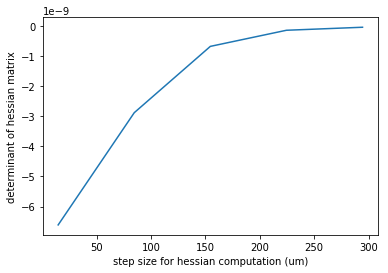

In [56]:
ss = [stepsize_um for stepsize_um, (H, _) in sorted(hessians_all_stepsizes.iteritems())]
hs = [np.linalg.det(H) for stepsize_um, (H, _) in sorted(hessians_all_stepsizes.iteritems())]
plt.plot(ss, hs);
plt.xlabel('step size for hessian computation (um)');
plt.ylabel('determinant of hessian matrix');

In [57]:
# Save hessian

fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                         type_m='score', type_f='score',
                                         classifier_setting_m=classifier_setting, 
                                         classifier_setting_f=classifier_setting,
                                         warp_setting=warp_setting,
                                         what='hessians')

create_parent_dir_if_not_exists(fp)
save_pickle(hessians_all_stepsizes, fp)
upload_to_s3(fp)

rm -rf /shared/CSHL_data_processed/MD590/MD590_thumbnail_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped/MD590-IHC23-2015.08.10-19.34.12_MD590_1_0069_thumbnail_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD590/MD590_thumbnail_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped


Child returned 

aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD590/MD590_thumbnail_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped/MD590-IHC23-2015.08.10-19.34.12_MD590_1_0069_thumbnail_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped.tif /shared/CSHL_data_processed/MD590/MD590_thumbnail_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped/MD590-IHC23-2015.08.10-19.34.12_MD590_1_0069_thumbnail_alignedTo_MD590-N47-2015.09.12-05.32.06_MD590_2_0140_cropped.tif


0
Child returned 0
1.52 seconds.


rm -rf /shared/CSHL_data_processed/MD591/MD591_thumbnail_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_cropped/MD591-IHC69-2015.08.28-07.55.45_MD591_2_0206_thumbnail_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD591/MD591_thumbnail_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_cropped


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD591/MD591_thumbnail_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_cropped/MD591-IHC69-2015.08.28-07.55.45_MD591_2_0206_thumbnail_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_cropped.tif /shared/CSHL_data_processed/MD591/MD591_thumbnail_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_cropped/MD591-IHC69-2015.08.28-07.55.45_MD591_2_0206_thumbnail_alignedTo_MD591-N57-2015.09.21-17.13.29_MD591_1_0169_cropped.tif



Child returned 0
1.51 seconds.


rm -rf /shared/CSHL_data_processed/MD595/MD595_thumbnail_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped/MD595-IHC48-2015.09.15-18.38.44_MD595_2_0143_thumbnail_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD595/MD595_thumbnail_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD595/MD595_thumbnail_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped/MD595-IHC48-2015.09.15-18.38.44_MD595_2_0143_thumbnail_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped.tif /shared/CSHL_data_processed/MD595/MD595_thumbnail_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped/MD595-IHC48-2015.09.15-18.38.44_MD595_2_0143_thumbnail_alignedTo_MD595-IHC48-2015.09.15-18.38.44_MD595_1_0142_cropped.tif


Child returned 0
1.51 seconds.


rm -rf /shared/CSHL_data_processed/MD598/MD598_thumbnail_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped/MD598-N23-2015.09.29-18.02.11_MD598_1_0067_thumbnail_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD598/MD598_thumbnail_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD598/MD598_thumbnail_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped/MD598-N23-2015.09.29-18.02.11_MD598_1_0067_thumbnail_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped.tif /shared/CSHL_data_processed/MD598/MD598_thumbnail_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped/MD598-N23-2015.09.29-18.02.11_MD598_1_0067_thumbnail_alignedTo_MD598-N42-2015.09.29-19.26.12_MD598_2_0125_cropped.tif


Child returned 0
1.55 seconds.


rm -rf /shared/CSHL_data_processed/MD599/MD599_thumbnail_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped/MD599-IHC46-2015.10.03-06.31.30_MD599_1_0136_thumbnail_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD599/MD599_thumbnail_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD599/MD599_thumbnail_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped/MD599-IHC46-2015.10.03-06.31.30_MD599_1_0136_thumbnail_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped.tif /shared/CSHL_data_processed/MD599/MD599_thumbnail_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped/MD599-IHC46-2015.10.03-06.31.30_MD599_1_0136_thumbnail_alignedTo_MD599-IHC40-2015.10.03-06.04.31_MD599_2_0119_cropped.tif



Child returned 0
2.06 seconds.


rm -rf /shared/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped/Rescan_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped/Rescan_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped.tif /shared/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped/Rescan_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped.tif


Child returned 1
1.37 seconds.


rm -rf /shared/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped/MD602-N19-2015.12.01-16.24.09_MD602_3_0057_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped/MD602-N19-2015.12.01-16.24.09_MD602_3_0057_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped.tif /shared/CSHL_data_processed/MD602/MD602_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped/MD602-N19-2015.12.01-16.24.09_MD602_3_0057_thumbnail_alignedTo_MD602-N49-2015.12.01-18.41.46_MD602_2_0146_cropped.tif


Child returned 0
1.48 seconds.


rm -rf /shared/CSHL_data_processed/MD603/MD603_thumbnail_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped/MD603-N70-2015.12.04-00.43.20_MD603_2_0209_thumbnail_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD603/MD603_thumbnail_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped


Child returned 0

aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD603/MD603_thumbnail_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped/MD603-N70-2015.12.04-00.43.20_MD603_2_0209_thumbnail_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped.tif /shared/CSHL_data_processed/MD603/MD603_thumbnail_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped/MD603-N70-2015.12.04-00.43.20_MD603_2_0209_thumbnail_alignedTo_MD603-N60-2015.12.03-23.57.05_MD603_2_0179_cropped.tif



Child returned 0
1.50 seconds.


rm -rf /shared/CSHL_data_processed/MD653/MD653_thumbnail_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N75-2016.12.17-08.09.40_MD653_3_0225_thumbnail_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD653/MD653_thumbnail_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD653/MD653_thumbnail_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N75-2016.12.17-08.09.40_MD653_3_0225_thumbnail_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped.tif /shared/CSHL_data_processed/MD653/MD653_thumbnail_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped/MD653-N75-2016.12.17-08.09.40_MD653_3_0225_thumbnail_alignedTo_MD653-F64-2016.12.21-12.03.55_MD653_2_0191_cropped.tif


Child returned 0
1.49 seconds.


rm -rf /shared/CSHL_data_processed/MD652/MD652_thumbnail_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_thumbnail_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD652/MD652_thumbnail_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped


Child returned 

aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD652/MD652_thumbnail_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_thumbnail_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped.tif /shared/CSHL_data_processed/MD652/MD652_thumbnail_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped/MD652-N45-2016.12.16-08.17.19_MD652_1_0133_thumbnail_alignedTo_MD652-F45-2016.12.17-05.56.31_MD652_2_0134_cropped.tif


0
Child returned 0
1.50 seconds.


rm -rf /shared/CSHL_data_processed/MD642/MD642_thumbnail_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_thumbnail_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD642/MD642_thumbnail_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD642/MD642_thumbnail_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_thumbnail_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped.tif /shared/CSHL_data_processed/MD642/MD642_thumbnail_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped/MD642-F58-2017.01.14-14.06.12_MD642_1_0172_thumbnail_alignedTo_MD642-F53-2017.01.14-12.23.43_MD642_1_0157_cropped.tif


Child returned 0
1.48 seconds.


rm -rf /shared/CSHL_data_processed/MD657/MD657_thumbnail_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropped/MD657-F65-2017.02.18-13.26.50_MD657_1_0193_thumbnail_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropped.tif && mkdir -p /shared/CSHL_data_processed/MD657/MD657_thumbnail_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropped


Child returned 0


aws s3 cp s3://mousebrainatlas-data/CSHL_data_processed/MD657/MD657_thumbnail_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropped/MD657-F65-2017.02.18-13.26.50_MD657_1_0193_thumbnail_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropped.tif /shared/CSHL_data_processed/MD657/MD657_thumbnail_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropped/MD657-F65-2017.02.18-13.26.50_MD657_1_0193_thumbnail_alignedTo_MD657-F44-2017.02.18-06.06.27_MD657_1_0130_cropped.tif


Child returned 0
1.63 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_hessians/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_parameters_hessians.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_hessians/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_parameters_hessians.pkl


Child returned 0
0.88 seconds.


# Compute z-score

In [58]:
"""
zscores (dict): {pooling radius in um: (z, fmax, mean, std)}
"""

zscores = {}

# pool_radius_um_list = np.arange(25, 400, 20)
pool_radius_um_list = np.linspace(25, 400, 5)
for pool_radius_um in pool_radius_um_list:
    
    pool_radius_pixel = pool_radius_um / xy_pixel_distance

    t = time.time()
    
#     grid_size = 3
#     dxs = np.arange(-pooling_radius, pooling_radius, grid_size)
#     dys = np.arange(-pooling_radius, pooling_radius, grid_size)
#     dzs = np.arange(-pooling_radius, pooling_radius, grid_size)
#     neighbor_scores = aligner.compute_scores_neighborhood_grid(tx_params, dxs=dxs, dys=dys, dzs=dzs,
#                                                                indices_m=labels_for_computing_confidence)
    
    neighbor_scores = aligner.compute_scores_neighborhood_random(tx_params, n=3000, 
                    stds=np.array([0,0,0,pool_radius_pixel,0,0,0,pool_radius_pixel,0,0,0,pool_radius_pixel]), 
                    indices_m=labels_for_computing_confidence)
    
    sys.stderr.write('Compute scores: %.2f seconds.\n' % (time.time() - t))
    
    mean = np.mean(neighbor_scores)
    std = np.std(neighbor_scores)
    z = (fmax - mean) / std
    
    zscores[pool_radius_um] = (z, fmax, mean, std)

Compute scores: 140.15 seconds.
Compute scores: 139.31 seconds.
Compute scores: 154.03 seconds.
Compute scores: 146.29 seconds.
Compute scores: 138.56 seconds.


In [59]:
# Save z-scores

fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                    type_m='score', type_f='score',
                                   classifier_setting_m=classifier_setting, 
                                         classifier_setting_f=classifier_setting,
                                   warp_setting=warp_setting,
                                   what='zscores')

create_parent_dir_if_not_exists(fp)
save_pickle(zscores, fp)
upload_to_s3(fp)

aws s3 cp /shared/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_zscores/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_parameters_zscores.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV4/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_zscores/atlasV4_down32_scoreVolume_clf_38_warp_13_MD635_down32_scoreVolume_clf_38_parameters_zscores.pkl


Child returned 0
0.93 seconds.


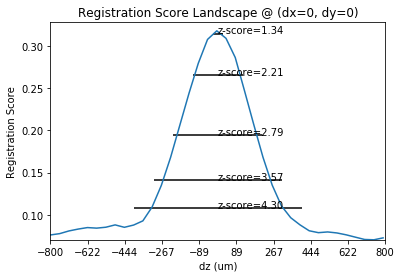

In [60]:
# Visualize a z-slice of the registration score function.

max_pooling_radius_um = 800
max_pooling_radius_pixel = max_pooling_radius_um / xy_pixel_distance

grid_size = 3
dzs = np.arange(-max_pooling_radius_pixel, max_pooling_radius_pixel, grid_size)
neighbor_scores = aligner.compute_scores_neighborhood_grid(tx_params, dxs=[0], dys=[0], dzs=dzs,
                                                           indices_m=labels_for_computing_confidence)
plt.figure();
plt.plot(dzs * xy_pixel_distance, neighbor_scores)
plt.ylim([np.min(neighbor_scores), np.max(neighbor_scores) + .01]);
plt.xlim([-max_pooling_radius_um, max_pooling_radius_um]);
plt.title('Registration Score Landscape @ (dx=0, dy=0)')
plt.ylabel('Registration Score');
plt.xlabel('dz (um)');
plt.xticks(np.linspace(-max_pooling_radius_um, max_pooling_radius_um, 10));

for poolradius_um, (z, fmax, mean, std) in zscores.iteritems():
    plt.hlines(mean, -poolradius_um, poolradius_um);
    plt.text(x=0, y=mean, s='z-score=%.2f'%z, fontsize=10);

plt.show();

- The width of each black bar corresponds to the size of the pooling region.
- The height of each black bar is the mean score in that pooling region.
- The z-score is higher if the pooling region is larger.

# Compute Peak Radius
- Use the pre-computed hessian matrix to approximate a neighborhood around score maxima by a quadratic function. The neighborhood size is controlled by step size $\delta$.
- The hessian matrix also gives the directions of min and max change.
- Peak radius is the distance from the maxima along either the min or max direction that the quadratic approximation drops to the mean of neighborhood N2. This neighborhood is specified by a pooling radius $r$.

In [61]:
stack_moving = 'atlasV4'
stack_fixed = 'MD635'

In [63]:
downscale = 32
xy_pixel_distance = XY_PIXEL_DISTANCE_LOSSLESS * downscale

In [72]:
classifier_setting = 38
warp_setting = 1

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in sqrt


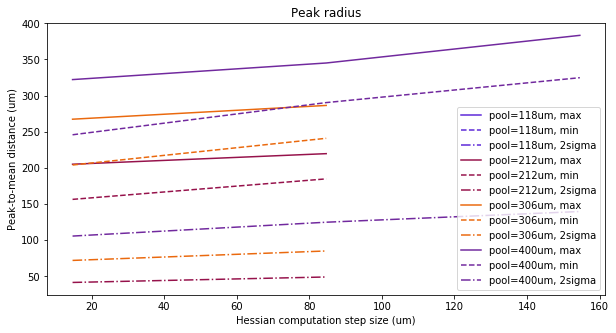

In [66]:
from collections import defaultdict
peak_radius_all_stacks = defaultdict(list)

# for stack_fixed in all_nissl_stacks:
for stack_fixed in ['MD635']:
    
    # Load previously computed confidence measures

    zscores = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                       classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                       warp_setting=warp_setting,
                                       what='zscores')

    hessians_all_stepsizes = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                       classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                       warp_setting=warp_setting,
                                       what='hessians')
    
    peak_radius = defaultdict(dict)
    for poolradius_um, (zscore, fmax, mu, std) in zscores.iteritems():
        for stepsize_um, (H, fmax) in hessians_all_stepsizes.iteritems():
            if poolradius_um > stepsize_um * 2:  # compute only if pooling radius is at least twice the step size
                U, S, UT = np.linalg.svd(H)

                # using the smallest eigenvalues of Hessians (flattest direction), score drops to mean
                peak_radius_pixel_max = np.sqrt(2*(fmax-mu)/S[-1])

                # using the largest eigenvalues of Hessians (steepest direction), score drops to mean
                peak_radius_pixel_min = np.sqrt(2*(fmax-mu)/S[0])

                # using the largest eigenvalues of Hessians, scores drops to the value with 2-sigma significance
                peak_radius_pixel_2sigma = np.sqrt(2*(fmax-(mu+2*std))/S[0])

                peak_radius[poolradius_um][stepsize_um] = (peak_radius_pixel_max * xy_pixel_distance,
                                                          peak_radius_pixel_min * xy_pixel_distance,
                                                          peak_radius_pixel_2sigma * xy_pixel_distance)
    peak_radius.default_factory = None

    # Plot
    plt.figure(figsize=(10,5));
    for poolradius_um, v in sorted(peak_radius.items()):
        xs, ys_max_min_2sigma = zip(*sorted(v.items()))
        ys_max, ys_min, ys_2sigma = zip(*ys_max_min_2sigma)
        c = np.array(random_colors(1)[0])/255.
        plt.plot(xs, ys_max, linestyle='-', color=c, label='pool=%dum, max' % poolradius_um);
        plt.plot(xs, ys_min, linestyle='--', color=c, label='pool=%dum, min' % poolradius_um);
        plt.plot(xs, ys_2sigma, linestyle='-.', color=c, label='pool=%dum, 2sigma' % poolradius_um);
    plt.legend(loc='lower right');
    plt.title('Peak radius');
    plt.xlabel('Hessian computation step size (um)');
    plt.ylabel('Peak-to-mean distance (um)');
    plt.show();

# Compare different registration settings

In [ ]:
stack_moving = 'atlasV4'
stack_fixed = 'MD635'

In [74]:
downscale = 32
xy_pixel_distance = XY_PIXEL_DISTANCE_LOSSLESS * downscale

In [75]:
classifier_setting = 38
warp_settings = [1, 13]

In [84]:
colors_per_poolradius = dict(zip(zscores.keys(), np.array(random_colors(len(zscores.keys() )))/255.))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


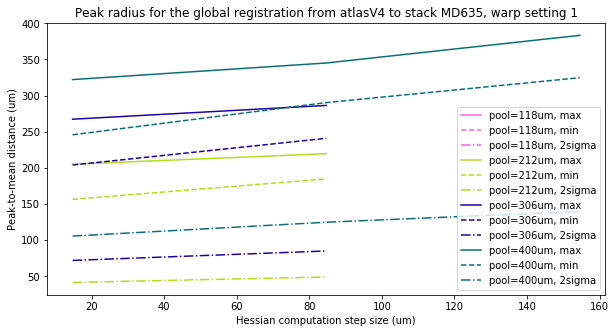

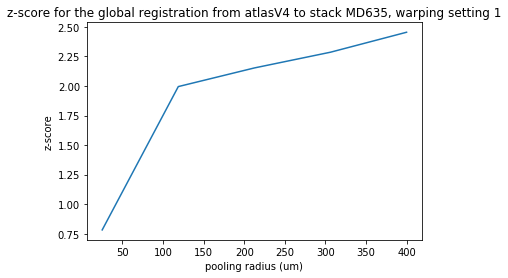

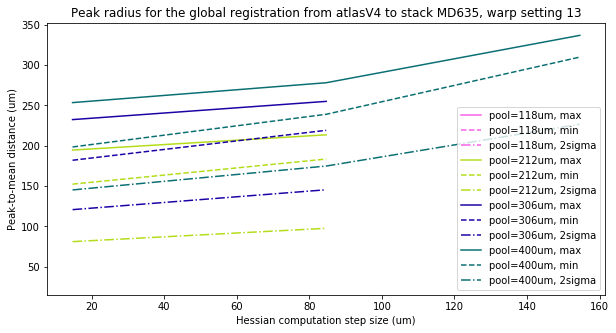

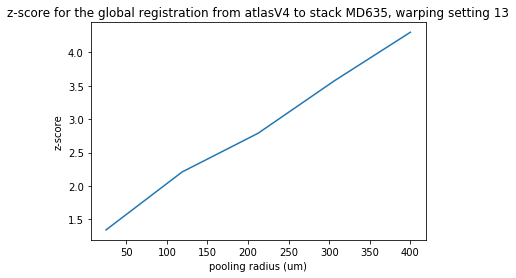

In [120]:
for warp_setting in warp_settings:

    from collections import defaultdict
    peak_radius_all_stacks = defaultdict(list)

    # for stack_fixed in all_nissl_stacks:
    for stack_fixed in ['MD635']:

        # Load previously computed confidence measures
        zscores = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                           classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                           warp_setting=warp_setting,
                                           what='zscores')

        hessians_all_stepsizes = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                           classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                           warp_setting=warp_setting,
                                           what='hessians')

        peak_radius = defaultdict(dict)
        for poolradius_um, (zscore, fmax, mu, std) in zscores.iteritems():
            for stepsize_um, (H, fmax) in hessians_all_stepsizes.iteritems():
                if poolradius_um > stepsize_um * 2:  # compute only if pooling radius is at least twice the step size
                    U, S, UT = np.linalg.svd(H)

                    # using the smallest eigenvalues of Hessians (flattest direction), score drops to mean
                    peak_radius_pixel_max = np.sqrt(2*(fmax-mu)/S[-1])

                    # using the largest eigenvalues of Hessians (steepest direction), score drops to mean
                    peak_radius_pixel_min = np.sqrt(2*(fmax-mu)/S[0])

                    # using the largest eigenvalues of Hessians, scores drops to the value with 2-sigma significance
                    peak_radius_pixel_2sigma = np.sqrt(2*(fmax-(mu+2*std))/S[0])

                    peak_radius[poolradius_um][stepsize_um] = (peak_radius_pixel_max * xy_pixel_distance,
                                                              peak_radius_pixel_min * xy_pixel_distance,
                                                              peak_radius_pixel_2sigma * xy_pixel_distance)
        peak_radius.default_factory = None

        # Plot peak radius of the global registration.
        plt.figure(figsize=(10,5));
        for poolradius_um, v in sorted(peak_radius.items()):
            xs, ys_max_min_2sigma = zip(*sorted(v.items()))
            ys_max, ys_min, ys_2sigma = zip(*ys_max_min_2sigma)
            plt.plot(xs, ys_max, linestyle='-', color=colors_per_poolradius[poolradius_um], label='pool=%dum, max' % poolradius_um);
            plt.plot(xs, ys_min, linestyle='--', color=colors_per_poolradius[poolradius_um], label='pool=%dum, min' % poolradius_um);
            plt.plot(xs, ys_2sigma, linestyle='-.', color=colors_per_poolradius[poolradius_um], label='pool=%dum, 2sigma' % poolradius_um);
        plt.legend(loc='lower right');
        plt.title('Peak radius for the global registration from %s to stack %s, warp setting %d' % (stack_moving, stack_fixed, warp_setting));
        plt.xlabel('Hessian computation step size (um)');
        plt.ylabel('Peak-to-mean distance (um)');
        plt.show();
        
        # Plot z-score of the global registration.
        plt.figure();
        plt.plot(pool_radius_list, [zscores[poolradius_um][0] for poolradius_um in pool_radius_list]);
        plt.xlabel('pooling radius (um)');
        plt.ylabel('z-score');
        plt.title('z-score for the global registration from %s to stack %s, warping setting %d' % (stack_moving, stack_fixed, warp_setting));
        plt.show();

# Plot z-scores and hessians for all stacks

In [88]:
stack_moving = 'atlasV4'

zscores_all_stacks = {}
hessians_all_stacks_all_stepsizes = {}

# for stack_fixed in all_nissl_stacks:
for stack_fixed in ['MD635']:

    zscores = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                       classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                       warp_setting=warp_setting,
                                       what='zscores')

    hessians_all_stepsizes = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                       classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                       warp_setting=warp_setting,
                                       what='hessians')
    
    zscores_all_stacks[stack_fixed] = zscores
    hessians_all_stacks_all_stepsizes[stack_fixed] = hessians_all_stepsizes

## plot z-scores for all stacks

In [89]:
pool_radius_list = sorted(zscores_all_stacks.values()[0].keys())

In [90]:
# choose to use which pooling radius for z-score

pool_radius = pool_radius_list[1]
print pool_radius

118.75


In [91]:
zscore_toplot_all_stacks = {st: zs[pool_radius][0] for st, zs in zscores_all_stacks.iteritems()}

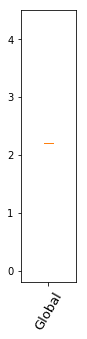

In [92]:
plt.figure(figsize=(1, 5));
D = [zscore_toplot_all_stacks.values()]
plt.boxplot(D);
plt.ylim([-.2,4.5]);
plt.xticks(range(1, 2), ['Global'], rotation='60', fontsize=13);

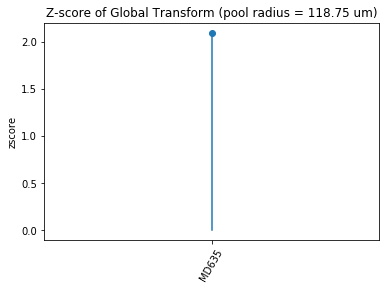

In [181]:
plt.stem(zscore_toplot_all_stacks.values());
plt.xticks(range(len(zscore_toplot_all_stacks)), zscore_toplot_all_stacks.keys(), rotation='60');
plt.title('Z-score of Global Transform (pool radius = %.2f um)' % pool_radius);
plt.ylabel('zscore');

# 2. Compute Confidence for Local Transforms

In [8]:
warp_setting = 17
detector_id = 15

In [9]:
warp_properties = registration_settings.loc[warp_setting]
print warp_properties

upstream_warp_setting = warp_properties['upstream_warp_id']
if upstream_warp_setting == 'None':
    upstream_warp_setting = None
else:
    upstream_warp_setting = int(upstream_warp_setting)
    
transform_type = warp_properties['transform_type']
terminate_thresh = warp_properties['terminate_thresh']
grad_computation_sample_number = int(warp_properties['grad_computation_sample_number'])
if not np.isnan(warp_properties['grid_search_sample_number']):
    grid_search_sample_number = int(warp_properties['grid_search_sample_number'])
if not np.isnan(warp_properties['std_tx_um']):
    std_tx_um = warp_properties['std_tx_um']
    std_tx = std_tx_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_ty_um']):
    std_ty_um = warp_properties['std_ty_um']
    std_ty = std_ty_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_tz_um']):
    std_tz_um = warp_properties['std_tz_um']
    std_tz = std_tz_um/(XY_PIXEL_DISTANCE_LOSSLESS*32)
if not np.isnan(warp_properties['std_theta_xy_degree']):
    std_theta_xy = np.deg2rad(warp_properties['std_theta_xy_degree'])
if not np.isnan(warp_properties['max_iter_num']):
    max_iter_num = int(warp_properties['max_iter_num'])
    
try:
    surround_weight = float(warp_properties['surround_weight'])
    include_surround = surround_weight != 0 and not np.isnan(surround_weight)
except:
    surround_weight = str(warp_properties['surround_weight'])
    include_surround = True

reg_weight = warp_properties['regularization_weight']
if np.isnan(reg_weight):
    reg_weights = np.zeros((3,))
else:
    reg_weights = np.ones((3,))*reg_weight

print
print 'surround', surround_weight
print 'regularization', reg_weights

positive_weight = 'size'

upstream_warp_id                                                  20
transform_type                                                 rigid
terminate_thresh                                                 NaN
grad_computation_sample_number                                 10000
grid_search_sample_number                                        NaN
std_tx_um                                                        NaN
std_ty_um                                                        NaN
std_tz_um                                                        NaN
std_theta_xy_degree                                              NaN
surround_weight                                              inverse
regularization_weight                                              0
comment                           local reg with surr no grid search
max_iter_num                                                    1000
Name: 17, dtype: object

surround inverse
regularization [ 0.  0.  0.]


In [10]:
stack_moving = 'atlasV5'

In [11]:
pool_radius_um_list = np.array([25, 50, 100, 150, 200, 300, 400])
stepsize_um_list = np.array([25, 50, 100, 150, 200, 300, 400])

# Compute z-scores and hessians for all structures for all stacks

In [8]:
# for stack_fixed in all_nissl_stacks:
for stack_fixed in ['MD595']:

    volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
    DataManager.load_original_volume_all_known_structures(stack=stack_fixed, 
                                                          prep_id=2,
                                                          detector_id=detector_id,
                                                         sided=False, volume_type='score')

#     for structure in all_known_structures_sided:
    for structure in ['7N_L']:

        try:
            
            ##############################
            # Initialize aligner object. #
            ##############################
            
            if include_surround:
                volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, 
                                             stack_f=stack_fixed, prep_id_f=2, detector_id_f=detector_id, warp_setting=upstream_warp_setting, 
                                            structures=[structure, convert_to_surround_name(structure, margin='200')])
            else:
                volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, 
                                                                                         stack_f=stack_fixed,
                                                                                         prep_id_f=2, 
                                                                             detector_id_f=detector_id,
                                                                             warp_setting=upstream_warp_setting, 
                                                                             structures=[structure])

            structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
            label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
            volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

            label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                                 for label_m, name_m in label_to_structure_moving.iteritems()}

            ######################

            cutoff = .5 # Structure size is defined as the number of voxels whose value is above this cutoff probability.
            # volume_moving_structure_sizes = {m_ind: np.count_nonzero(volume_moving[m_ind] > cutoff) 
            #                                  for m_ind in label_mapping_m2f.iterkeys()}
            pool = Pool(NUM_CORES)
            volume_moving_structure_sizes = dict(zip(volume_moving.keys(), 
                                                     pool.map(lambda l: np.count_nonzero(volume_moving[l] > cutoff), 
                                                              label_mapping_m2f.iterkeys())))
            pool.close()
            pool.join()

            ########################

            label_weights_m = {}

            for label_m in label_mapping_m2f.iterkeys():
                name_m = label_to_structure_moving[label_m]
                if not is_surround_label(name_m):
                    if positive_weight == 'size':
                        label_weights_m[label_m] = 1.
                    elif positive_weight == 'inverse':
                        p = np.percentile(volume_moving_structure_sizes.values(), 50)
                        label_weights_m[label_m] =  np.minimum(p / volume_moving_structure_sizes[label_m], 1.)
                    else:
                        sys.stderr.write("positive_weight %s is not recognized. Using the default.\n" % positive_weight)

            for label_m in label_mapping_m2f.iterkeys():
                name_m = label_to_structure_moving[label_m]
                if is_surround_label(name_m):
                    label_ns = structure_to_label_moving[convert_to_nonsurround_name(name_m)]
                    if surround_weight == 'inverse':
                        label_weights_m[label_m] = - label_weights_m[label_ns] * volume_moving_structure_sizes[label_ns]/float(volume_moving_structure_sizes[label_m])
                    elif isinstance(surround_weight, int) or isinstance(surround_weight, float):
                        label_weights_m[label_m] = surround_weight
                    else:
                        sys.stderr.write("surround_weight %s is not recognized. Using the default.\n" % surround_weight)


            aligner = Aligner4(volume_fixed, volume_moving, 
                               labelIndexMap_m2f=label_mapping_m2f)

            aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
                                 indices_m=[structure_to_label_moving[structure]])

            aligner.set_regularization_weights(reg_weights)
            aligner.set_label_weights(label_weights_m)

            ########################################
            # Read previous computed best estimate #
            ########################################

            tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
            DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                                  detector_id_f=detector_id,
                                                     prep_id_f=2,
                                                  warp_setting=warp_setting,
                                                  structure_f=structure,
                                                 structure_m=structure)

    #         structures_for_computing_confidence = {'7N_L', '7N_R', '5N_L', '5N_R', '12N'}
    #         labels_for_computing_confidence = [structure_to_label_moving[s] for s in structures_for_computing_confidence]
    #         labels_for_computing_confidence = label_to_structure_moving.keys()

            labels_for_computing_confidence = [structure_to_label_moving[structure]]

            fmax = aligner.compute_score(tx_params, indices_m=labels_for_computing_confidence)

            ###################
            # Compute z-score #
            ###################

            zscores = {}

            for pool_radius_um in pool_radius_um_list:

                pool_radius_pixel = pool_radius_um / XY_PIXEL_DISTANCE_TB

                t = time.time()

            #     grid_size = 3
            #     dxs = np.arange(-pooling_radius, pooling_radius, grid_size)
            #     dys = np.arange(-pooling_radius, pooling_radius, grid_size)
            #     dzs = np.arange(-pooling_radius, pooling_radius, grid_size)
            #     neighbor_scores = aligner.compute_scores_neighborhood_grid(tx_params, dxs=dxs, dys=dys, dzs=dzs,
            #                                                                indices_m=labels_for_computing_confidence)

                neighbor_scores = aligner.compute_scores_neighborhood_random(tx_params, n=3000, 
                                stds=np.array([0,0,0,pool_radius_pixel,0,0,0,pool_radius_pixel,0,0,0,pool_radius_pixel]), 
                                indices_m=labels_for_computing_confidence)

                sys.stderr.write('Compute scores: %.2f seconds.\n' % (time.time() - t))

                mean = np.mean(neighbor_scores)
                std = np.std(neighbor_scores)
                z = (fmax - mean) / std

                zscores[pool_radius_um] = (z, fmax, mean, std)

            #################
            # Save z-scores #
            #################

            fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                                     detector_id_f=detector_id,
                                                     prep_id_f=2,
                                                     warp_setting=warp_setting,
                                                     structure_f=structure,
                                                     structure_m=structure,
                                                     what='zscores')
            create_parent_dir_if_not_exists(fp)
            save_pickle(zscores, fp)
            upload_to_s3(fp)
            
            ####################
            # Compute Hessians #
            ####################
            
            def perturb(tx, ty, tz):
                return aligner.compute_score(tx_params + [0,0,0,tx,0,0,0,ty,0,0,0,tz],
                                             indices_m=labels_for_computing_confidence)

            hessians_all_stepsizes = {}
            for stepsize_um in stepsize_um_list:
                stepsize = stepsize_um / XY_PIXEL_DISTANCE_TB
                h = nd.Hessian(lambda (tx, ty, tz): perturb(tx, ty, tz), step=(stepsize, stepsize, stepsize))
                H = h((0,0,0))
                hessians_all_stepsizes[stepsize_um] = (H, fmax)
#                 U, S, UT = np.linalg.svd(H)
#                 steepest_dir = U[:,0]
#                 flattest_dir = U[:,-1]
#                 stepsize_um = stepsize * xy_pixel_distance
#                 hessians_all_stepsizes[stepsize_um] = (H, fmax, steepest_dir, flattest_dir)

            #################
            # Save hessians #
            #################

            fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                   detector_id_f=detector_id,
                                                     prep_id_f=2,
                                                   warp_setting=warp_setting,
                                                     structure_f=structure,
                                                     structure_m=structure,
                                                     what='hessians')

            create_parent_dir_if_not_exists(fp)
            save_pickle(hessians_all_stepsizes, fp)
            upload_to_s3(fp)           
            
        except Exception as e:
            sys.stderr.write('Error transforming volume %s: %s\n' % (structure, e))

Prior structure/index map not found. Generating a new one.


rm -rf "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_10N.bp" && mkdir -p "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_10N.bp" "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_10N.bp"
rm -rf "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_12N.bp" && mkdir -p "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_12N.bp" "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVol

rm -rf "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_RMC.bp" && mkdir -p "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_RMC.bp" "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_RMC.bp"
rm -rf "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_RtTg.bp" && mkdir -p "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreVolume/score_volumes/MD595_prep2_detector15_down32_scoreVolume_RtTg.bp" "/shared/CSHL_volumes/MD595/MD595_prep2_detector15_down32_scoreV

Volume shape: (414, 574, 360)
Prior structure/index map not found. Generating a new one.


rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume_7N_L.bp" && mkdir -p "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume/score_volumes"
aws s3 cp "s3://mousebrainatlas-data/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume_7N_L.bp" "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume_7N_L.bp"
rm -rf "/shared/CSHL_volumes/atlasV5/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume/score_volumes/atlasV5_down32_scoreVolume_warp20_MD595_prep2_detector15_down32_scoreVolume_7N_L_surround_

Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 288.86744981  315.65428287  100.18931505], centroid_f: [ 288.86744981  315.65428287  100.18931505]


rm -rf "/shared/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_parameters.txt" && mkdir -p "/shared/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_parameters.txt" "/shared/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_parameters.txt"


Compute scores: 4.42 seconds.
Compute scores: 4.32 seconds.
Compute scores: 4.33 seconds.
Compute scores: 4.42 seconds.
Compute scores: 4.33 seconds.
Compute scores: 4.43 seconds.
Compute scores: 4.23 seconds.


aws s3 cp "/shared/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_zscores/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_parameters_zscores.pkl" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_zscores/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_parameters_zscores.pkl"
aws s3 cp "/shared/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_hessians/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_parameters_hessians.pkl" "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_detector15_down32_scoreVolume_7N_L_hessians/atlasV5_down32_scoreVolume_7N_L_warp17_MD595_prep2_

# Compute z-scores and hessians for all structures for all stacks, for rotations

In [17]:
# for stack_fixed in all_nissl_stacks:
for stack_fixed in ['MD635', 'MD642']:
# for stack_fixed in ['MD635']:

    volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
    DataManager.load_original_volume_all_known_structures(stack=stack_fixed, 
                                                          classifier_setting=classifier_setting,
                                                         sided=False, volume_type='score')

    for structure in all_known_structures_sided:
#     for structure in ['7N_L']:

        try:
            
            ##############################
            # Initialize aligner object. #
            ##############################
            
            if include_surround:
                volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                                             classifier_setting_m=classifier_setting,
                                                                             classifier_setting_f=classifier_setting,
                                                                             warp_setting=upstream_warp_setting, 
                                                                             structures=[structure, 
                                                                                         convert_to_surround_name(structure, margin='200')])
            else:
                volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                                             classifier_setting_m=classifier_setting,
                                                                             classifier_setting_f=classifier_setting,
                                                                             warp_setting=upstream_warp_setting, 
                                                                             structures=[structure])

            structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
            label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
            volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

            volume_moving_structure_sizes = {l: np.count_nonzero(vol > 0) for l, vol in volume_moving.iteritems()}

            label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                                 for label_m, name_m in label_to_structure_moving.iteritems()}

            if surround_weight == 'inverse':
                label_weights_m = {label_m: -volume_moving_structure_sizes[structure_to_label_moving[convert_to_nonsurround_name(name_m)]]
                                   /float(volume_moving_structure_sizes[label_m])
                                   if is_surround_label(name_m) else 1. \
                                   for label_m, name_m in label_to_structure_moving.iteritems()}
            elif isinstace(surround_weight, int) or isinstace(surround_weight, float):
                label_weights_m = {label_m: surround_weight if is_surround_label(name_m) else 1. \
                                   for label_m, name_m in label_to_structure_moving.iteritems()}
            else:
                sys.stderr.write("surround_weight %s is not recognized. Using the default.\n" % surround_weight)

            aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=label_mapping_m2f)

            aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
                                 indices_m=[structure_to_label_moving[structure]])                            

            aligner.set_regularization_weights(reg_weights)
            aligner.set_label_weights(label_weights_m)

            ########################################
            # Read previous computed best estimate #
            ########################################

            tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
            DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                                  classifier_setting_m=classifier_setting,
                                                  classifier_setting_f=classifier_setting,
                                                  warp_setting=warp_setting,
                                                  param_suffix=structure)

    #         structures_for_computing_confidence = {'7N_L', '7N_R', '5N_L', '5N_R', '12N'}
    #         labels_for_computing_confidence = [structure_to_label_moving[s] for s in structures_for_computing_confidence]
    #         labels_for_computing_confidence = label_to_structure_moving.keys()

            labels_for_computing_confidence = [structure_to_label_moving[structure]]

            fmax = aligner.compute_score(tx_params, indices_m=labels_for_computing_confidence)
            
            #################################
            # Compute Hessian for rotation ##
            #################################

            def perturb_rotation(theta_xy=0, theta_yz=0, theta_xz=0):
                new_params = rotate_transform_vector(tx_params, theta_xy=theta_xy, theta_yz=theta_yz, theta_xz=theta_xz)
                return aligner.compute_score(new_params,
                                            indices_m=labels_for_computing_confidence)

            hessians_rotation_all_stepsizes = {}
            rotation_stepsizes_degrees = np.linspace(5, 40, 5) # angle = 20 degrees
            rotation_stepsizes_radians = np.deg2rad(rotation_stepsizes_degrees)

            for stepsize_rad in rotation_stepsizes_radians:
                h = nd.Hessian(lambda (theta_xy, theta_yz, theta_xz): perturb_rotation(theta_xy, theta_yz, theta_xz), 
                               step=(stepsize_rad, stepsize_rad, stepsize_rad))
                H = h((0,0,0))
                hessians_rotation_all_stepsizes[stepsize_rad] = (H, fmax)

            ##############################
            # Save hessians for rotation #
            ##############################

            fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                   classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                                   warp_setting=warp_setting,
                                                     param_suffix=structure,
                                                     what='hessians_rotations')

            create_parent_dir_if_not_exists(fp)
            save_pickle(hessians_rotation_all_stepsizes, fp)
            upload_to_s3(fp)
            
            ################################
            # Compute z-score for rotation #
            ################################

            zscores_rotations = {}

            pool_radius_degrees_list = np.linspace(10, 45, 5)
            pool_radius_radian_list = np.deg2rad(pool_radius_degrees_list)
            for pool_radius_rad in pool_radius_radian_list:

                t = time.time()

            #     grid_size = 3
            #     dxs = np.arange(-pooling_radius, pooling_radius, grid_size)
            #     dys = np.arange(-pooling_radius, pooling_radius, grid_size)
            #     dzs = np.arange(-pooling_radius, pooling_radius, grid_size)
            #     neighbor_scores = aligner.compute_scores_neighborhood_grid(tx_params, dxs=dxs, dys=dys, dzs=dzs,
            #                                                                indices_m=labels_for_computing_confidence)

                neighbor_scores = aligner.compute_scores_neighborhood_random_rotation(tx_params, n=3000, 
                                                                                      std_theta_xy=pool_radius_rad,
                                                                                      std_theta_yz=pool_radius_rad,
                                                                                      std_theta_xz=pool_radius_rad, 
                                indices_m=labels_for_computing_confidence)

                sys.stderr.write('Compute scores: %.2f seconds.\n' % (time.time() - t))

                mean = np.mean(neighbor_scores)
                std = np.std(neighbor_scores)
                z = (fmax - mean) / std

                zscores_rotations[pool_radius_rad] = (z, fmax, mean, std)

            ##############################
            # Save z-scores for rotation #
            ##############################

            fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed,
                                                     classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                                     warp_setting=warp_setting,
                                                     param_suffix=structure,
                                                     what='zscores_rotations')
            create_parent_dir_if_not_exists(fp)
            save_pickle(zscores_rotations, fp)
            upload_to_s3(fp)
            
        except Exception as e:
            sys.stderr.write('Error %s: %s.\n' % (structure, str(e)))

File does not exist: /shared/CSHL_volumes/MD635/MD635_down32_annotationVolume/MD635_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.


rm -rf /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_outerContour.bp && mkdir -p /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_outerContour.bp /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_outerContour.bp


Child returned 0
Child returned 1
0.39 seconds.
File does not exist: /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_outerContour.bp
Score volume for outerContour does not exist.
Child returned 0


rm -rf /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_sp5.bp && mkdir -p /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_sp5.bp /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_sp5.bp


Child returned 1
0.39 seconds.
File does not exist: /shared/CSHL_volumes/MD635/MD635_down32_scoreVolume_clf_37/score_volumes/MD635_down32_scoreVolume_clf_37_sp5.bp
Score volume for sp5 does not exist.
Volume shape: (445, 655, 397)
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.10 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.16 seconds.
Compute scores: 1.09 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.08 seconds.
Compute scores: 1.08 seconds.
Compute scores: 1.08 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_5N_R_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.48 seconds.
Compute scores: 0.58 seconds.
Compute scores: 0.48 seconds.
Compute scores: 0.59 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_L_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.49 seconds.
Compute scores: 0.58 seconds.
Compute scores: 0.48 seconds.
Compute scores: 0.58 seconds.
Compute scores: 0.58 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_6N_R_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.79 seconds.
Compute scores: 1.69 seconds.
Compute scores: 1.79 seconds.
Compute scores: 1.79 seconds.
Compute scores: 1.81 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_L_zscoresRotations.pkl


Child returned 0
0.37 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_R_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 1.69 seconds.
Compute scores: 1.69 seconds.
Compute scores: 1.79 seconds.
Compute scores: 1.49 seconds.
Compute scores: 1.69 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7N_R_zscoresRotations.pkl


Child returned 0
0.42 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.99 seconds.
Compute scores: 0.92 seconds.
Compute scores: 0.99 seconds.
Compute scores: 0.99 seconds.
Compute scores: 0.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.99 seconds.
Compute scores: 0.99 seconds.
Compute scores: 0.99 seconds.
Compute scores: 0.99 seconds.
Compute scores: 0.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_7n_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.49 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.48 seconds.
Compute scores: 0.58 seconds.
Compute scores: 0.49 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_L_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.58 seconds.
Compute scores: 0.48 seconds.
Compute scores: 0.49 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Amb_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.29 seconds.
Compute scores: 1.30 seconds.
Compute scores: 1.29 seconds.
Compute scores: 1.29 seconds.
Compute scores: 1.29 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_R_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 1.30 seconds.
Compute scores: 1.29 seconds.
Compute scores: 1.29 seconds.
Compute scores: 1.28 seconds.
Compute scores: 1.28 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LC_R_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 3.20 seconds.
Compute scores: 3.20 seconds.
Compute scores: 3.20 seconds.
Compute scores: 3.19 seconds.
Compute scores: 3.09 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_R_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 3.19 seconds.
Compute scores: 3.19 seconds.
Compute scores: 3.19 seconds.
Compute scores: 3.00 seconds.
Compute scores: 3.19 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_LRt_R_zscoresRotations.pkl


Child returned 0
0.37 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 2.80 seconds.
Compute scores: 2.83 seconds.
Compute scores: 2.89 seconds.
Compute scores: 2.89 seconds.
Compute scores: 2.89 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_L_zscoresRotations.pkl


Child returned 0
0.42 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 2.80 seconds.
Compute scores: 2.89 seconds.
Compute scores: 2.89 seconds.
Compute scores: 2.70 seconds.
Compute scores: 2.90 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Pn_R_zscoresRotations.pkl


Child returned 0
0.37 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_L_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.78 seconds.
Compute scores: 0.78 seconds.
Compute scores: 0.78 seconds.
Compute scores: 0.75 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.80 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.78 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Tz_R_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_L_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 1.80 seconds.
Compute scores: 1.79 seconds.
Compute scores: 1.79 seconds.
Compute scores: 1.81 seconds.
Compute scores: 1.83 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_L_zscoresRotations.pkl


Child returned 0
0.37 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.79 seconds.
Compute scores: 1.89 seconds.
Compute scores: 1.89 seconds.
Compute scores: 1.90 seconds.
Compute scores: 1.89 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VLL_R_zscoresRotations.pkl


Child returned 0
0.42 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.12 seconds.
Compute scores: 1.10 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.12 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.20 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.09 seconds.
Compute scores: 1.09 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RMC_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.81 seconds.
Compute scores: 0.69 seconds.
Compute scores: 0.80 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.79 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_L_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_R_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 0.81 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.79 seconds.
Compute scores: 0.70 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNC_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 4.81 seconds.
Compute scores: 4.80 seconds.
Compute scores: 4.84 seconds.
Compute scores: 4.61 seconds.
Compute scores: 4.31 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_L_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_R_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 4.11 seconds.
Compute scores: 4.64 seconds.
Compute scores: 4.61 seconds.
Compute scores: 4.61 seconds.
Compute scores: 4.70 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SNR_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.60 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.58 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.70 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_3N_R_zscoresRotations.pkl


Child returned 0
0.40 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
Child returned 0


rm -rf /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_L.txt && mkdir -p /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37
aws s3 cp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_L.txt /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_L.txt


Child returned 0
0.44 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.50 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.49 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_L_zscoresRotations.pkl


Child returned 0
0.42 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
Child returned 0


rm -rf /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_R.txt && mkdir -p /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37
aws s3 cp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_R.txt /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_R.txt


Child returned 0
0.44 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.50 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.49 seconds.
Compute scores: 0.63 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_4N_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 2.91 seconds.
Compute scores: 3.01 seconds.
Compute scores: 3.00 seconds.
Compute scores: 3.00 seconds.
Compute scores: 2.90 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 3.11 seconds.
Compute scores: 3.10 seconds.
Compute scores: 2.81 seconds.
Compute scores: 3.10 seconds.
Compute scores: 3.10 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5I_R_zscoresRotations.pkl


Child returned 0
0.73 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_L_hessiansRotations.pkl


Child returned 0
0.53 seconds.
Compute scores: 2.80 seconds.
Compute scores: 2.70 seconds.
Compute scores: 2.80 seconds.
Compute scores: 2.83 seconds.
Compute scores: 2.60 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 2.80 seconds.
Compute scores: 2.80 seconds.
Compute scores: 2.60 seconds.
Compute scores: 2.79 seconds.
Compute scores: 2.79 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5O_R_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 6.12 seconds.
Compute scores: 6.71 seconds.
Compute scores: 6.61 seconds.
Compute scores: 6.51 seconds.
Compute scores: 7.02 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_R_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 6.41 seconds.
Compute scores: 5.91 seconds.
Compute scores: 6.31 seconds.
Compute scores: 5.92 seconds.
Compute scores: 6.61 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_Sp5C_R_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_L_hessiansRotations.pkl


Child returned 0
0.58 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.63 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.60 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.61 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_PBG_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.74 seconds.
Compute scores: 0.60 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_10N_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.90 seconds.
Compute scores: 1.89 seconds.
Compute scores: 1.90 seconds.
Compute scores: 1.89 seconds.
Compute scores: 1.70 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 2.00 seconds.
Compute scores: 1.99 seconds.
Compute scores: 1.99 seconds.
Compute scores: 1.89 seconds.
Compute scores: 1.89 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCA_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.10 seconds.
Compute scores: 1.19 seconds.
Compute scores: 1.19 seconds.
Compute scores: 1.20 seconds.
Compute scores: 1.19 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.20 seconds.
Compute scores: 1.23 seconds.
Compute scores: 1.19 seconds.
Compute scores: 1.20 seconds.
Compute scores: 1.20 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_VCP_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 2.10 seconds.
Compute scores: 2.01 seconds.
Compute scores: 2.13 seconds.
Compute scores: 2.09 seconds.
Compute scores: 2.09 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_R_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 2.00 seconds.
Compute scores: 2.00 seconds.
Compute scores: 2.00 seconds.
Compute scores: 2.00 seconds.
Compute scores: 1.99 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_DC_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_AP_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_AP_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.60 seconds.
Compute scores: 0.60 seconds.
Compute scores: 0.60 seconds.
Compute scores: 0.59 seconds.
Compute scores: 0.59 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_AP_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_AP_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_12N_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_12N_hessiansRotations.pkl


Child returned 0
0.53 seconds.
Compute scores: 1.43 seconds.
Compute scores: 1.49 seconds.
Compute scores: 1.49 seconds.
Compute scores: 1.50 seconds.
Compute scores: 1.50 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_12N_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_12N_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RtTg_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RtTg_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 5.51 seconds.
Compute scores: 5.11 seconds.
Compute scores: 5.51 seconds.
Compute scores: 5.51 seconds.
Compute scores: 5.21 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RtTg_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_RtTg_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5.bp


Child returned 1
0.37 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5.bp'
Score volume for sp5 does not exist.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5_surround_200.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5_surround_200.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5_surround_200.bp


Child returned 1
0.38 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5_surround_200.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_sp5_surround_200.bp'
Score volume for sp5_surround_200 does not exist.
Error sp5: list index out of range.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour.bp


Child returned 1
0.37 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour.bp'
Score volume for outerContour does not exist.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour_surround_200.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour_surround_200.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour_surround_200.bp


Child returned 1
0.37 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour_surround_200.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD635_down32_scoreVolume_clf_37_outerContour_surround_200.bp'
Score volume for outerContour_surround_200 does not exist.
Error outerContour: list index out of range.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SC_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SC_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 49.38 seconds.
Compute scores: 48.85 seconds.
Compute scores: 49.75 seconds.
Compute scores: 49.16 seconds.
Compute scores: 50.15 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SC_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_SC_zscoresRotations.pkl


Child returned 0
0.58 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_IC_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_IC_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 31.31 seconds.
Compute scores: 31.01 seconds.
Compute scores: 30.41 seconds.
Compute scores: 32.71 seconds.
Compute scores: 32.53 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_IC_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD635_down32_scoreVolume_clf_37_parameters_IC_zscoresRotations.pkl


Child returned 0
0.38 seconds.
File does not exist: /shared/CSHL_volumes/MD642/MD642_down32_annotationVolume/MD642_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.


rm -rf /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_outerContour.bp && mkdir -p /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_outerContour.bp /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_outerContour.bp


Child returned 0
Child returned 1
0.38 seconds.
File does not exist: /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_outerContour.bp
Score volume for outerContour does not exist.
Child returned 0


rm -rf /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_sp5.bp && mkdir -p /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_sp5.bp /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_sp5.bp


Child returned 1
0.39 seconds.
File does not exist: /shared/CSHL_volumes/MD642/MD642_down32_scoreVolume_clf_37/score_volumes/MD642_down32_scoreVolume_clf_37_sp5.bp
Score volume for sp5 does not exist.
Volume shape: (487, 897, 388)
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.25 seconds.
Compute scores: 1.34 seconds.
Compute scores: 1.26 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.25 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_L_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_5N_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.54 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.67 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.54 seconds.
Compute scores: 0.64 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_6N_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_L_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 2.05 seconds.
Compute scores: 2.14 seconds.
Compute scores: 2.08 seconds.
Compute scores: 2.14 seconds.
Compute scores: 2.04 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 2.06 seconds.
Compute scores: 2.05 seconds.
Compute scores: 2.05 seconds.
Compute scores: 2.05 seconds.
Compute scores: 2.05 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7N_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 1.05 seconds.
Compute scores: 1.05 seconds.
Compute scores: 1.15 seconds.
Compute scores: 1.04 seconds.
Compute scores: 1.05 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_L_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 1.04 seconds.
Compute scores: 1.04 seconds.
Compute scores: 1.14 seconds.
Compute scores: 1.05 seconds.
Compute scores: 1.15 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_7n_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_L_hessiansRotations.pkl


Child returned 0
0.43 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.54 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.64 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_L_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.54 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Amb_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 1.45 seconds.
Compute scores: 1.44 seconds.
Compute scores: 1.55 seconds.
Compute scores: 1.55 seconds.
Compute scores: 1.44 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_L_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 1.54 seconds.
Compute scores: 1.54 seconds.
Compute scores: 1.54 seconds.
Compute scores: 1.54 seconds.
Compute scores: 1.55 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LC_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 3.85 seconds.
Compute scores: 3.74 seconds.
Compute scores: 3.84 seconds.
Compute scores: 3.76 seconds.
Compute scores: 3.75 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_R_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 3.45 seconds.
Compute scores: 3.65 seconds.
Compute scores: 3.75 seconds.
Compute scores: 3.85 seconds.
Compute scores: 3.85 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_LRt_R_zscoresRotations.pkl


Child returned 0
0.49 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 3.45 seconds.
Compute scores: 3.45 seconds.
Compute scores: 3.15 seconds.
Compute scores: 3.55 seconds.
Compute scores: 3.49 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 3.36 seconds.
Compute scores: 3.05 seconds.
Compute scores: 3.35 seconds.
Compute scores: 3.45 seconds.
Compute scores: 3.55 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Pn_R_zscoresRotations.pkl


Child returned 0
0.49 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_L_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 0.89 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.84 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.88 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.85 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Tz_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 2.26 seconds.
Compute scores: 2.20 seconds.
Compute scores: 2.26 seconds.
Compute scores: 2.25 seconds.
Compute scores: 2.25 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_L_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_R_hessiansRotations.pkl


Child returned 0
0.41 seconds.
Compute scores: 2.25 seconds.
Compute scores: 2.25 seconds.
Compute scores: 2.30 seconds.
Compute scores: 2.25 seconds.
Compute scores: 2.25 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VLL_R_zscoresRotations.pkl


Child returned 0
0.40 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_L_hessiansRotations.pkl


Child returned 0
0.40 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.30 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_R_hessiansRotations.pkl


Child returned 0
0.45 seconds.
Compute scores: 1.25 seconds.
Compute scores: 1.25 seconds.
Compute scores: 1.24 seconds.
Compute scores: 1.25 seconds.
Compute scores: 1.24 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RMC_R_zscoresRotations.pkl


Child returned 0
0.40 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.84 seconds.
Compute scores: 0.84 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.85 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_R_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 0.85 seconds.
Compute scores: 0.84 seconds.
Compute scores: 0.84 seconds.
Compute scores: 0.84 seconds.
Compute scores: 0.84 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNC_R_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 5.26 seconds.
Compute scores: 5.06 seconds.
Compute scores: 5.55 seconds.
Compute scores: 5.56 seconds.
Compute scores: 5.75 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_R_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 5.46 seconds.
Compute scores: 5.25 seconds.
Compute scores: 5.06 seconds.
Compute scores: 5.56 seconds.
Compute scores: 5.46 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SNR_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_L_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.68 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_L_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.67 seconds.
Compute scores: 0.77 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_3N_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.55 seconds.
Compute scores: 0.54 seconds.
Compute scores: 0.54 seconds.
Compute scores: 0.54 seconds.
Compute scores: 0.64 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_R_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 0.54 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.54 seconds.
Compute scores: 0.68 seconds.
Compute scores: 0.67 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_4N_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_L_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 3.46 seconds.
Compute scores: 3.65 seconds.
Compute scores: 3.65 seconds.
Compute scores: 3.65 seconds.
Compute scores: 3.55 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 3.35 seconds.
Compute scores: 3.45 seconds.
Compute scores: 3.65 seconds.
Compute scores: 3.65 seconds.
Compute scores: 3.65 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5I_R_zscoresRotations.pkl


Child returned 0
0.40 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_L_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 3.25 seconds.
Compute scores: 3.25 seconds.
Compute scores: 3.35 seconds.
Compute scores: 3.35 seconds.
Compute scores: 3.35 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_L_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 3.25 seconds.
Compute scores: 3.35 seconds.
Compute scores: 3.35 seconds.
Compute scores: 3.35 seconds.
Compute scores: 3.35 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5O_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 7.07 seconds.
Compute scores: 7.27 seconds.
Compute scores: 7.47 seconds.
Compute scores: 7.47 seconds.
Compute scores: 7.57 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_L_zscoresRotations.pkl


Child returned 0
0.40 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 7.57 seconds.
Compute scores: 7.50 seconds.
Compute scores: 7.17 seconds.
Compute scores: 7.29 seconds.
Compute scores: 7.57 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_Sp5C_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_L_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.65 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_L_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_R_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 0.67 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.80 seconds.
Compute scores: 0.75 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_PBG_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_L_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.65 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_R_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.65 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_10N_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_L_hessiansRotations.pkl


Child returned 0
0.48 seconds.
Compute scores: 2.27 seconds.
Compute scores: 2.15 seconds.
Compute scores: 2.18 seconds.
Compute scores: 2.15 seconds.
Compute scores: 2.26 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_L_zscoresRotations.pkl


Child returned 0
0.44 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_R_hessiansRotations.pkl


Child returned 0
0.54 seconds.
Compute scores: 2.25 seconds.
Compute scores: 2.25 seconds.
Compute scores: 2.29 seconds.
Compute scores: 2.25 seconds.
Compute scores: 2.25 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCA_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_L_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_L_zscoresRotations.pkl


Child returned 0
0.54 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_R_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 1.37 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.35 seconds.
Compute scores: 1.39 seconds.
Compute scores: 1.35 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_VCP_R_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_L_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_L_hessiansRotations.pkl


Child returned 0
0.44 seconds.
Compute scores: 2.46 seconds.
Compute scores: 2.46 seconds.
Compute scores: 2.45 seconds.
Compute scores: 2.55 seconds.
Compute scores: 2.46 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_L_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_L_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_R_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_R_hessiansRotations.pkl


Child returned 0
0.45 seconds.
Compute scores: 2.45 seconds.
Compute scores: 2.45 seconds.
Compute scores: 2.44 seconds.
Compute scores: 2.45 seconds.
Compute scores: 2.45 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_R_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_DC_R_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_AP_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_AP_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.64 seconds.
Compute scores: 0.65 seconds.
Compute scores: 0.74 seconds.
Compute scores: 0.65 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_AP_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_AP_zscoresRotations.pkl


Child returned 0
0.38 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_12N_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_12N_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 1.75 seconds.
Compute scores: 1.74 seconds.
Compute scores: 1.74 seconds.
Compute scores: 1.74 seconds.
Compute scores: 1.76 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_12N_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_12N_zscoresRotations.pkl


Child returned 0
0.43 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RtTg_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RtTg_hessiansRotations.pkl


Child returned 0
0.39 seconds.
Compute scores: 6.46 seconds.
Compute scores: 6.07 seconds.
Compute scores: 6.67 seconds.
Compute scores: 6.66 seconds.
Compute scores: 6.37 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RtTg_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_RtTg_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5.bp


Child returned 1
0.39 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5.bp'
Score volume for sp5 does not exist.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5_surround_200.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5_surround_200.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5_surround_200.bp


Child returned 1
0.39 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5_surround_200.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_sp5_surround_200.bp'
Score volume for sp5_surround_200 does not exist.
Error sp5: list index out of range.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour.bp


Child returned 1
0.36 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour.bp'
Score volume for outerContour does not exist.
Child returned 0


rm -rf /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour_surround_200.bp && mkdir -p /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes
aws s3 cp s3://mousebrainatlas-data/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour_surround_200.bp /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour_surround_200.bp


Child returned 1
0.37 seconds.
File does not exist: /shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour_surround_200.bp
[Errno 2] No such file or directory: '/shared/CSHL_volumes/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37/score_volumes/atlasV3_down32_scoreVolume_clf_37_warp_1_MD642_down32_scoreVolume_clf_37_outerContour_surround_200.bp'
Score volume for outerContour_surround_200 does not exist.
Error outerContour: list index out of range.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SC_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SC_hessiansRotations.pkl


Child returned 0
0.38 seconds.
Compute scores: 57.50 seconds.
Compute scores: 57.30 seconds.
Compute scores: 56.80 seconds.
Compute scores: 58.50 seconds.
Compute scores: 58.71 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SC_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_SC_zscoresRotations.pkl


Child returned 0
0.39 seconds.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_IC_hessiansRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_hessiansRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_IC_hessiansRotations.pkl


Child returned 0
0.54 seconds.
Compute scores: 38.64 seconds.
Compute scores: 36.44 seconds.
Compute scores: 38.23 seconds.
Compute scores: 37.67 seconds.
Compute scores: 38.74 seconds.


aws s3 cp /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_IC_zscoresRotations.pkl s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_zscoresRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_IC_zscoresRotations.pkl


Child returned 0
0.43 seconds.


# Load all pre-computed z-scores and hessians

In [6]:
downscale = 32
xy_pixel_distance = XY_PIXEL_DISTANCE_LOSSLESS * downscale

In [12]:
# Load all pre-computed z-scores.

zscores_all_stacks_all_structures_all_poolradius = defaultdict(dict)

for stack_fixed in all_nissl_stacks:
    for structure in all_known_structures_sided:
        try:
            zscores = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                                  detector_id_f=detector_id,
                                                  prep_id_f=2,
                                               warp_setting=warp_setting,
                                                structure_f=structure,
                                                  structure_m=structure,
                                               what='zscores')
            zscores = {float(i): t for i, t in zscores.iteritems()}
            zscores_all_stacks_all_structures_all_poolradius[stack_fixed][structure] = zscores
            
        except Exception as e:
            sys.stderr.write('Error loading confidence %s: %s.\n' % (structure, e))
                
zscores_all_stacks_all_structures_all_poolradius.default_factory = None

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_zscores/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_zscores/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_zscores/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_zscores/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_zscores/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_zscores/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_zscores/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_zscores/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_zscores/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_zscores/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_zscores/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_zscores/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_zscores/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_zscores/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_registration_para

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_zscores/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_zscores/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_zscores.pkl"
rm -rf "/home/yu

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_zscores"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_zscores/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_parameters_zscores.pkl"
rm -rf "/home/yuncong/CSHL_reg

In [13]:
# Load all pre-computed hessians.

hessians_all_stacks_all_structures_all_stepsizes = defaultdict(dict)

for stack_fixed in all_nissl_stacks:
    for structure in all_known_structures_sided:
        try:
            hessians_all_stepsizes = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                                  detector_id_f=detector_id,
                                                  prep_id_f=2,
                                               warp_setting=warp_setting,
                                                structure_f=structure,
                                                  structure_m=structure,
                                               what='hessians')

            hessians_all_stepsizes = {float(i): t for i, t in hessians_all_stepsizes.iteritems()}
            hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure] = hessians_all_stepsizes
            
        except Exception as e:
            sys.stderr.write('Error loading confidence %s: %s.\n' % (structure, e))
                
hessians_all_stacks_all_structures_all_stepsizes.default_factory = None

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD585_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD585_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD585_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD585_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD585_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD585_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD589_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD589_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD589_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD589_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD589_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD590_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD590_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD590_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD590_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD591_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD591_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD591_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD591_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD591_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD591_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD592_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD592_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD592_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD592_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD592_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD593_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD593_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD593_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD593_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD594_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD594_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD594_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD594_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD594_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD594_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD595_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD595_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD595_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD595_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD595_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD598_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD598_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD598_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD598_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_hessians/atlasV5_down32_scoreVolume_5N_L_warp17_MD599_prep2_detector15_down32_scoreVolume_5N_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_hessians/atlasV5_down32_scoreVolume_Amb_R_warp17_MD599_prep2_detector15_down32_scoreVolume_Amb_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_hessians/atlasV5_down32_scoreVolume_VLL_L_warp17_MD599_prep2_detector15_down32_scoreVolume_VLL_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_hessians/atlasV5_down32_scoreVolume_3N_R_warp17_MD599_prep2_detector15_down32_scoreVolume_3N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_hessians/atlasV5_down32_scoreVolume_PBG_L_warp17_MD599_prep2_detector15_down32_scoreVolume_PBG_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_hessians/atlasV5_down32_scoreVolume_DC_R_warp17_MD599_prep2_detector15_down32_scoreVolume_DC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_hessians/atlasV5_down32_scoreVolume_6N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_6N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_hessians/atlasV5_down32_scoreVolume_LRt_L_warp17_MD602_prep2_detector15_down32_scoreVolume_LRt_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_hessians/atlasV5_down32_scoreVolume_RMC_R_warp17_MD602_prep2_detector15_down32_scoreVolume_RMC_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_hessians/atlasV5_down32_scoreVolume_Sp5I_L_warp17_MD602_prep2_detector15_down32_scoreVolume_Sp5I_L_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_hessians/atlasV5_down32_scoreVolume_10N_R_warp17_MD602_prep2_detector15_down32_scoreVolume_10N_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_hessians/atlasV5_down32_scoreVolume_RtTg_warp17_MD602_prep2_detector15_down32_scoreVolume_RtTg_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_hessians/atlasV5_down32_scoreVolume_7n_L_warp17_MD603_prep2_detector15_down32_scoreVolume_7n_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_hessians/atlasV5_down32_scoreVolume_Pn_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Pn_R_parameters_hessians.pkl"
rm -rf "/home/yuncong/CSHL_registrati

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_hessians/atlasV5_down32_scoreVolume_SNR_L_warp17_MD603_prep2_detector15_down32_scoreVolume_SNR_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_hessians/atlasV5_down32_scoreVolume_Sp5O_R_warp17_MD603_prep2_detector15_down32_scoreVolume_Sp5O_R_parameters_hessians.pkl"
rm -rf "/

rm -rf "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" && mkdir -p "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_hessians"
aws s3 cp "s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl" "/home/yuncong/CSHL_registration_parameters/atlasV5/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_hessians/atlasV5_down32_scoreVolume_VCP_L_warp17_MD603_prep2_detector15_down32_scoreVolume_VCP_L_parameters_hessians.pkl"
rm -rf "/home/yuncong/C

In [13]:
# # Compute z-scores and hessians (based on z-score) for all structures for all stacks
# # Using this to compute peak width is equivalent to using hessians based on raw score.

# hessians_zscoreBased_all_stacks_all_structs_all_steps = defaultdict(lambda: defaultdict(lambda: dict))

# for stack_fixed, hess_all_struct_all_step in hessians_all_stacks_all_structures_all_stepsizes.iteritems():
#     for struct, hess_all_step in hess_all_struct_all_step.iteritems():
        
#         zscores = zscores_all_stacks_all_structures[stack_fixed][struct]

#         hessians_zscoreBased_all_steps = defaultdict(dict)
#         for stepsize_um, (hess, _) in hess_all_step.iteritems():
#             for pool_radius_um, (_, _, _, std) in zscores.iteritems():
#                 hessians_zscoreBased_all_steps[stepsize_um][pool_radius_um] = hess / std
#         hessians_zscoreBased_all_steps.default_factory = None

#         hessians_zscoreBased_all_stacks_all_structs_all_steps[stack_fixed][struct] = hessians_zscoreBased_all_steps
        

#         fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed,
#                                                detector_id_f=detector_id,
#                                                   prep_id_f=2,
#                                                warp_setting=warp_setting,
#                                                  structure_f=structure,
#                                                   structure_m=structure,
#                                                  what='hessiansZscoreBased')
#         create_parent_dir_if_not_exists(fp)
#         save_pickle(hessians_zscoreBased_all_steps, fp)
#         upload_to_s3(fp)

In [16]:
peakradius_max_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_min_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_x_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_y_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))
peakradius_z_um_allstacks_allstructures_allsteps_allpools = defaultdict(lambda: defaultdict(lambda: defaultdict(dict)))

# for stack in ['MD595']:
for stack in all_nissl_stacks:
#     for struct in ['7N_L']:
    for struct in all_known_structures_sided:
        for step_um in stepsize_um_list:
            for pool_um in pool_radius_um_list:
#                 if step_um == pool_um:
                try:
                    H, fmax = hessians_all_stacks_all_structures_all_stepsizes[stack][struct][step_um]
                    z, fmax, mu, std = zscores_all_stacks_all_structures_all_poolradius[stack][struct][pool_um]

                    U, S, VT = np.linalg.svd(H/std)
#                     print step_um, z, fmax, mu, std, S, np.abs(np.linalg.det(H/std)), np.sqrt(2*(z-0)/S[-1]), np.sqrt(2*(z-0)/S[0])
#                     U, S, VT = np.linalg.svd(H)
#                     print step_um, z, fmax, mu, std, S, np.abs(np.linalg.det(H)), np.sqrt(2*(fmax-mu)/S[-1]), np.sqrt(2*(fmax-mu)/S[0])
#                     print 

                    peakradius_max_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/S[-1]) * XY_PIXEL_DISTANCE_TB
                    peakradius_min_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/S[0]) * XY_PIXEL_DISTANCE_TB
                    peakradius_x_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/np.abs(H[0,0]/std)) * XY_PIXEL_DISTANCE_TB
                    peakradius_y_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/np.abs(H[1,1]/std)) * XY_PIXEL_DISTANCE_TB
                    peakradius_z_um_allstacks_allstructures_allsteps_allpools[stack][struct][step_um][pool_um] = np.sqrt(2*(z-0)/np.abs(H[2,2]/std)) * XY_PIXEL_DISTANCE_TB
                except Exception as e:
                    sys.stderr.write("Error computing confidence for %s,%s\n" % (stack, struct))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt


# Plot structure-wise registration score landscape 

In [154]:
stack_fixed = 'MD589'

In [155]:
pool_radius_um_list = np.array([25, 50, 100, 150, 200, 300, 400])
hessian_stepsize_um_list = np.array([25, 50, 100, 150, 200, 300, 400])

In [156]:
# pooling_radius_list = sorted(zscores.keys())
# print 'pooling radius:', pooling_radius_list
# hessian_stepsize_list = sorted(hessians_all_stepsizes.keys())
# print 'hessian stepsize:', hessian_stepsize_list

Prior structure/index map not found. Generating a new one.
Volume shape: (373, 485, 381)
Prior structure/index map not found. Generating a new one.
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.
centroid_m: [ 244.64441796  245.08720699  162.17500993], centroid_f: [ 244.64441796  245.08720699  162.17500993]


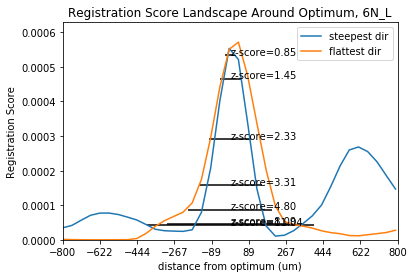

In [157]:
for structure in ['6N_L']:
# for structure in ['AP', '7N_L', '5N_R', 'LRt_R', '12N', '10N_L']:
# for structure in all_known_structures_sided:
    
    try:

        # Initialize Aligner object

        volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
            DataManager.load_original_volume_all_known_structures(stack=stack_fixed, 
                                                                  detector_id=detector_id,
                                                                  prep_id=2,
                                                                 sided=False, volume_type='score',
                                                                 structures=[convert_to_original_name(structure)])

        if include_surround:
            volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, 
                                                                                     stack_f=stack_fixed,
                                                                         detector_id_f=detector_id,
                                                                                     prep_id_f=2,
                                                                         warp_setting=upstream_warp_setting, 
                                                                         structures=[structure, 
                                                                                     convert_to_surround_name(structure, margin='200')])
        else:
            volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
detector_id_f=detector_id,
                                                                                     prep_id_f=2,
                                                                         warp_setting=upstream_warp_setting, 
                                                                         structures=[structure])

        structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
        label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
        volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

        label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                             for label_m, name_m in label_to_structure_moving.iteritems()}
        
        ###############################
        
        cutoff = .5 # Structure size is defined as the number of voxels whose value is above this cutoff probability.
        # volume_moving_structure_sizes = {m_ind: np.count_nonzero(volume_moving[m_ind] > cutoff) 
        #                                  for m_ind in label_mapping_m2f.iterkeys()}
        pool = Pool(NUM_CORES)
        volume_moving_structure_sizes = dict(zip(volume_moving.keys(), 
                                                 pool.map(lambda l: np.count_nonzero(volume_moving[l] > cutoff), 
                                                          label_mapping_m2f.iterkeys())))
        pool.close()
        pool.join()
        
        ###############################
        
        label_weights_m = {}

        for label_m in label_mapping_m2f.iterkeys():
            name_m = label_to_structure_moving[label_m]
            if not is_surround_label(name_m):
                if positive_weight == 'size':
                    label_weights_m[label_m] = 1.
                elif positive_weight == 'inverse':
                    p = np.percentile(volume_moving_structure_sizes.values(), 50)
                    label_weights_m[label_m] =  np.minimum(p / volume_moving_structure_sizes[label_m], 1.)
                else:
                    sys.stderr.write("positive_weight %s is not recognized. Using the default.\n" % positive_weight)

        for label_m in label_mapping_m2f.iterkeys():
            name_m = label_to_structure_moving[label_m]
            if is_surround_label(name_m):
                label_ns = structure_to_label_moving[convert_to_nonsurround_name(name_m)]
                if surround_weight == 'inverse':
                    label_weights_m[label_m] = - label_weights_m[label_ns] * volume_moving_structure_sizes[label_ns]/float(volume_moving_structure_sizes[label_m])
                elif isinstance(surround_weight, int) or isinstance(surround_weight, float):
                    label_weights_m[label_m] = surround_weight
                else:
                    sys.stderr.write("surround_weight %s is not recognized. Using the default.\n" % surround_weight)

        ###################################
                    
        aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=label_mapping_m2f)

        aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
                             indices_m=[structure_to_label_moving[structure]])                            

        aligner.set_regularization_weights(reg_weights)
        aligner.set_label_weights(label_weights_m)


        # Compute steepest and flattest directions based on the Hessian matrix.

        # Specify a step size.
        stepsize = hessian_stepsize_um_list[2]
        H, _ = hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure][stepsize]
        U, S, UT = np.linalg.svd(H)
        steepest_direction = U[:,0]
        flattest_direction = U[:,-1]

        # Specify sample points.
        max_pooling_radius_um = 800
        max_pooling_radius_pixel = max_pooling_radius_um / xy_pixel_distance
        grid_size = 3
        waypoints = np.arange(-max_pooling_radius_pixel, max_pooling_radius_pixel, grid_size)
        dxdydzs_steepest_dir = np.outer(waypoints, steepest_direction)
        dxdydzs_flattest_dir = np.outer(waypoints, flattest_direction)

        # Compute a slice of the score function around the optimal estimate, along both the steepest and flattest directions.

        tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
                    DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                                          detector_id_f=detector_id,
                                                                                     prep_id_f=2,
                                                          warp_setting=warp_setting,
                                                          structure_f=structure,
                                                         structure_m=structure)

        labels_for_computing_confidence = [structure_to_label_moving[structure]]

        neighbor_scores_slice_steepest_dir = aligner.compute_scores_neighborhood_samples(tx_params, dxs=dxdydzs_steepest_dir[:,0], 
                                                                      dys=dxdydzs_steepest_dir[:,1], 
                                                                      dzs=dxdydzs_steepest_dir[:,2],
                                                                   indices_m=labels_for_computing_confidence)

        neighbor_scores_slice_flattest_dir = aligner.compute_scores_neighborhood_samples(tx_params, 
                                                                                         dxs=dxdydzs_flattest_dir[:,0], 
                                                                      dys=dxdydzs_flattest_dir[:,1], 
                                                                      dzs=dxdydzs_flattest_dir[:,2],
                                                                   indices_m=labels_for_computing_confidence)

        # Plot
        plt.figure();

        plt.plot(waypoints * xy_pixel_distance, neighbor_scores_slice_steepest_dir, label='steepest dir')
        plt.plot(waypoints * xy_pixel_distance, neighbor_scores_slice_flattest_dir, label='flattest dir')

        ymin = np.min(np.r_[neighbor_scores_slice_steepest_dir, neighbor_scores_slice_flattest_dir])
        ymax = np.max(np.r_[neighbor_scores_slice_steepest_dir, neighbor_scores_slice_flattest_dir])
        plt.ylim([ymin, ymax+(ymax-ymin)*.1]);
        plt.xlim([-max_pooling_radius_um, max_pooling_radius_um]);
        plt.title('Registration Score Landscape Around Optimum, %s' % structure)
        plt.ylabel('Registration Score');
        plt.xlabel('distance from optimum (um)');
        plt.legend()
        plt.xticks(np.linspace(-max_pooling_radius_um, max_pooling_radius_um, 10));

        for poolradius_um, (z, fmax, mean, std) in zscores_all_stacks_all_structures[stack_fixed][structure].iteritems():
            plt.hlines(mean, -poolradius_um, poolradius_um);
            plt.text(x=0, y=mean, s='z-score=%.2f'%z, fontsize=10);
        
#         landscape_plot_fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
#                                                classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
#                                                warp_setting=warp_setting,
#                                                 param_suffix=structure,
#                                                what='score_landscape')
#         create_parent_dir_if_not_exists(landscape_plot_fp)
#         plt.savefig(landscape_plot_fp, bbox_inches='tight')
#         upload_to_s3(landscape_plot_fp)
        
        plt.show();
        
    except Exception as e:
        sys.stderr.write('Error %s:' % structure + str(e) + '\n')

In [163]:
# # for structure in ['AP']:
# # for structure in ['AP', '7N_L', '5N_R', 'LRt_R', '12N', '10N_L']:
# for structure in all_known_structures_sided:
    
#     try:

#         # Initialize Aligner object

#         volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
#             DataManager.load_original_volume_all_known_structures(stack=stack_fixed, 
#                                                                   classifier_setting=classifier_setting,
#                                                                  sided=False, volume_type='score',
#                                                                  structures=[convert_to_original_name(structure)])

#         if include_surround:
#             volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
#                                                                          classifier_setting_m=classifier_setting,
#                                                                          classifier_setting_f=classifier_setting,
#                                                                          warp_setting=upstream_warp_setting, 
#                                                                          structures=[structure, 
#                                                                                      convert_to_surround_name(structure, margin='200')])
#         else:
#             volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
#                                                                          classifier_setting_m=classifier_setting,
#                                                                          classifier_setting_f=classifier_setting,
#                                                                          warp_setting=upstream_warp_setting, 
#                                                                          structures=[structure])

#         structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
#         label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
#         volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

#         label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
#                              for label_m, name_m in label_to_structure_moving.iteritems()}

#         if surround_weight == 'inverse':
#             volume_moving_structure_sizes = {l: np.count_nonzero(vol > 0) for l, vol in volume_moving.iteritems()}
#             label_weights_m = {label_m: -volume_moving_structure_sizes[structure_to_label_moving[convert_to_nonsurround_name(name_m)]]
#                                /float(volume_moving_structure_sizes[label_m])
#                                if is_surround_label(name_m) else 1. \
#                                for label_m, name_m in label_to_structure_moving.iteritems()}
#         elif isinstace(surround_weight, int) or isinstace(surround_weight, float):
#             label_weights_m = {label_m: surround_weight if is_surround_label(name_m) else 1. \
#                                for label_m, name_m in label_to_structure_moving.iteritems()}
#         else:
#             sys.stderr.write("surround_weight %s is not recognized. Using the default.\n" % surround_weight)

#         aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=label_mapping_m2f)

#         aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
#                              indices_m=[structure_to_label_moving[structure]])                            

#         aligner.set_regularization_weights(reg_weights)
#         aligner.set_label_weights(label_weights_m)


#         # Compute steepest and flattest directions based on the Hessian matrix.

#         # Specify a step size.
#         stepsize = hessian_stepsize_list[2]
#         H, _ = hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure][stepsize]
#         U, S, UT = np.linalg.svd(H)
#         steepest_direction = U[:,0]
#         flattest_direction = U[:,-1]

#         # Specify sample points.
#         max_pooling_radius_um = 800
#         max_pooling_radius_pixel = max_pooling_radius_um / xy_pixel_distance
#         grid_size = 3
#         waypoints = np.arange(-max_pooling_radius_pixel, max_pooling_radius_pixel, grid_size)
#         dxdydzs_steepest_dir = np.outer(waypoints, steepest_direction)
#         dxdydzs_flattest_dir = np.outer(waypoints, flattest_direction)

#         # Compute a slice of the score function around the optimal estimate, along both the steepest and flattest directions.

#         tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
#                     DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
#                                                           classifier_setting_m=classifier_setting,
#                                                           classifier_setting_f=classifier_setting,
#                                                           warp_setting=warp_setting,
#                                                           param_suffix=structure)

#         labels_for_computing_confidence = [structure_to_label_moving[structure]]

#         neighbor_scores_slice_steepest_dir = aligner.compute_scores_neighborhood_samples(tx_params, dxs=dxdydzs_steepest_dir[:,0], 
#                                                                       dys=dxdydzs_steepest_dir[:,1], 
#                                                                       dzs=dxdydzs_steepest_dir[:,2],
#                                                                    indices_m=labels_for_computing_confidence)

#         neighbor_scores_slice_flattest_dir = aligner.compute_scores_neighborhood_samples(tx_params, 
#                                                                                          dxs=dxdydzs_flattest_dir[:,0], 
#                                                                       dys=dxdydzs_flattest_dir[:,1], 
#                                                                       dzs=dxdydzs_flattest_dir[:,2],
#                                                                    indices_m=labels_for_computing_confidence)

#         # Plot
#         plt.figure();

#         plt.plot(waypoints * xy_pixel_distance, neighbor_scores_slice_steepest_dir, label='steepest dir')
#         plt.plot(waypoints * xy_pixel_distance, neighbor_scores_slice_flattest_dir, label='flattest dir')

#         ymin = np.min(np.r_[neighbor_scores_slice_steepest_dir, neighbor_scores_slice_flattest_dir])
#         ymax = np.max(np.r_[neighbor_scores_slice_steepest_dir, neighbor_scores_slice_flattest_dir])
#         plt.ylim([ymin, ymax+(ymax-ymin)*.1]);
#         plt.xlim([-max_pooling_radius_um, max_pooling_radius_um]);
#         plt.title('Registration Score Landscape Around Optimum, %s' % structure)
#         plt.ylabel('Registration Score');
#         plt.xlabel('distance from optimum (um)');
#         plt.legend()
#         plt.xticks(np.linspace(-max_pooling_radius_um, max_pooling_radius_um, 10));

#         for poolradius_um, (z, fmax, mean, std) in zscores_all_stacks_all_structures[stack_fixed][structure].iteritems():
#             plt.hlines(mean, -poolradius_um, poolradius_um);
#             plt.text(x=0, y=mean, s='z-score=%.2f'%z, fontsize=10);

        
#         landscape_plot_fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
#                                                classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
#                                                warp_setting=warp_setting,
#                                                 param_suffix=structure,
#                                                what='score_landscape')
#         create_parent_dir_if_not_exists(landscape_plot_fp)
#         plt.savefig(landscape_plot_fp, bbox_inches='tight')
#         upload_to_s3(landscape_plot_fp)
        
#         plt.show();
        
#     except Exception as e:
#         sys.stderr.write('Error %s:' % structure + str(e) + '\n')

- Some score maxima landscapes show horseback shape.
- Flat landscape may be because
    - atlas structure shape being smaller than actual structure.

# Load all pre-computed z-scores and hessians, for rotations

In [ ]:
# Load all pre-computed z-scores.

zscores_all_stacks_all_structures = defaultdict(dict)

# for stack_fixed in all_nissl_stacks:
for stack_fixed in ['MD635', 'MD642']:

    for structure in all_known_structures_sided:
        try:
            zscores = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                               classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                               warp_setting=warp_setting,
                                                param_suffix=structure,
                                               what='zscores_rotations')
            zscores = {float(i): t for i, t in zscores.iteritems()}
            zscores_all_stacks_all_structures[stack_fixed][structure] = zscores
            
        except Exception as e:
            sys.stderr.write('Error %s: %s.\n' % (structure, str(e)))
                
zscores_all_stacks_all_structures.default_factory = None

In [ ]:
# Load all pre-computed hessians.

hessians_all_stacks_all_structures_all_stepsizes = defaultdict(dict)

# for stack_fixed in all_nissl_stacks:
for stack_fixed in ['MD635', 'MD642']:

    for structure in all_known_structures_sided:
        
        try:
            hessians_all_stepsizes = DataManager.load_confidence(stack_m=stack_moving, stack_f=stack_fixed, 
                                               classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                               warp_setting=warp_setting,
                                                param_suffix=structure,
                                               what='hessians_rotations')

            hessians_all_stepsizes = {float(i): t for i, t in hessians_all_stepsizes.iteritems()}
            hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure] = hessians_all_stepsizes
            
        except Exception as e:
            sys.stderr.write('Error %s: %s.\n' % (structure, str(e)))
                
hessians_all_stacks_all_structures_all_stepsizes.default_factory = None

# Plot structure-wise registration score landscape, changing rotation

In [9]:
stack_fixed = 'MD642'

In [10]:
pool_radius_degrees_list = np.linspace(10, 45, 5)
pool_radius_radian_list = np.deg2rad(pool_radius_degrees_list)

In [11]:
rotation_stepsizes_degrees = np.linspace(5, 40, 5) # angle = 20 degrees
rotation_stepsizes_radians = np.deg2rad(rotation_stepsizes_degrees)

File does not exist: /shared/CSHL_volumes/MD642/MD642_down32_annotationVolume/MD642_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.
Volume shape: (487, 897, 388)
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


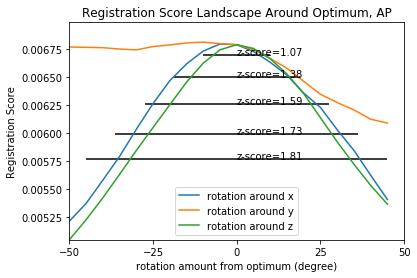

File does not exist: /shared/CSHL_volumes/MD642/MD642_down32_annotationVolume/MD642_down32_annotationVolume_nameToLabel.txt
Prior structure/index map not found. Generating a new one.
Volume shape: (487, 897, 388)
Label weights not set, default to 1 for all structures.
Regularization weights not set, default to 0.


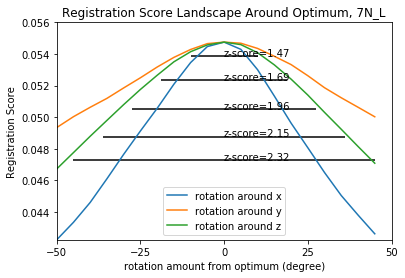

In [39]:
neighbor_scores_slice_rot_around_x_all = {}
neighbor_scores_slice_rot_around_y_all = {}
neighbor_scores_slice_rot_around_z_all = {}

# for structure in ['7N_L']:
for structure in ['AP', '7N_L']:
# for structure in ['AP', '7N_L', '5N_R', 'LRt_R', '12N', '10N_L']:
# for structure in all_known_structures_sided:
    
    try:

        # Initialize Aligner object

        volume_fixed, structure_to_label_fixed, label_to_structure_fixed = \
            DataManager.load_original_volume_all_known_structures(stack=stack_fixed, 
                                                                  classifier_setting=classifier_setting,
                                                                 sided=False, volume_type='score',
                                                                 structures=[convert_to_original_name(structure)])

        if include_surround:
            volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                                         classifier_setting_m=classifier_setting,
                                                                         classifier_setting_f=classifier_setting,
                                                                         warp_setting=upstream_warp_setting, 
                                                                         structures=[structure, 
                                                                                     convert_to_surround_name(structure, margin='200')])
        else:
            volume_moving = DataManager.load_transformed_volume_all_known_structures(stack_m=stack_moving, stack_f=stack_fixed,
                                                                         classifier_setting_m=classifier_setting,
                                                                         classifier_setting_f=classifier_setting,
                                                                         warp_setting=upstream_warp_setting, 
                                                                         structures=[structure])

        structure_to_label_moving = {s: l+1 for l, s in enumerate(sorted(volume_moving.keys()))}
        label_to_structure_moving = {l+1: s for l, s in enumerate(sorted(volume_moving.keys()))}
        volume_moving = {structure_to_label_moving[s]: v for s, v in volume_moving.items()}

        label_mapping_m2f = {label_m: structure_to_label_fixed[convert_to_original_name(name_m)] 
                             for label_m, name_m in label_to_structure_moving.iteritems()}

        if surround_weight == 'inverse':
            volume_moving_structure_sizes = {l: np.count_nonzero(vol > 0) for l, vol in volume_moving.iteritems()}
            label_weights_m = {label_m: -volume_moving_structure_sizes[structure_to_label_moving[convert_to_nonsurround_name(name_m)]]
                               /float(volume_moving_structure_sizes[label_m])
                               if is_surround_label(name_m) else 1. \
                               for label_m, name_m in label_to_structure_moving.iteritems()}
        elif isinstace(surround_weight, int) or isinstace(surround_weight, float):
            label_weights_m = {label_m: surround_weight if is_surround_label(name_m) else 1. \
                               for label_m, name_m in label_to_structure_moving.iteritems()}
        else:
            sys.stderr.write("surround_weight %s is not recognized. Using the default.\n" % surround_weight)

        aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=label_mapping_m2f)

        aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', 
                             indices_m=[structure_to_label_moving[structure]])                            

        aligner.set_regularization_weights(reg_weights)
        aligner.set_label_weights(label_weights_m)

        #######################################################################################
        # Compute steepest and flattest directions based on the Hessian matrix.

        # Specify a step size.
#         stepsize = rotation_stepsizes_radians[2]
#         H, _ = hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure][stepsize]
#         U, S, UT = np.linalg.svd(H)
#         steepest_direction = U[:,0]
#         flattest_direction = U[:,-1]
#         steepest_direction = [1,0,0]
#         flattest_direction = [0,1,0]

        # Specify sample points.
        max_pooling_radius_degree = 50
        max_pooling_radius_rad = np.deg2rad(max_pooling_radius_degree)
        grid_size_degree = 5
        grid_size_rad = np.deg2rad(grid_size_degree)
        waypoints_rad = np.arange(-max_pooling_radius_rad, max_pooling_radius_rad, grid_size_rad)

        # Compute a slice of the score function around the optimal estimate, along both the steepest and flattest directions.

        tx_params, centroid_m, centroid_f, xdim_m, ydim_m, zdim_m, xdim_f, ydim_f, zdim_f = \
                    DataManager.load_alignment_parameters(stack_m=stack_moving, stack_f=stack_fixed,
                                                          classifier_setting_m=classifier_setting,
                                                          classifier_setting_f=classifier_setting,
                                                          warp_setting=warp_setting,
                                                          param_suffix=structure)

        labels_for_computing_confidence = [structure_to_label_moving[structure]]

        neighbor_scores_slice_rot_around_z = aligner.compute_scores_neighborhood_samples_rotation(tx_params, 
                                                                      dtheta_xys=waypoints_rad,
                                                                   indices_m=labels_for_computing_confidence)
        neighbor_scores_slice_rot_around_x = aligner.compute_scores_neighborhood_samples_rotation(tx_params, 
                                                                      dtheta_yzs=waypoints_rad,
                                                                   indices_m=labels_for_computing_confidence)
        neighbor_scores_slice_rot_around_y = aligner.compute_scores_neighborhood_samples_rotation(tx_params, 
                                                                      dtheta_xzs=waypoints_rad,
                                                                   indices_m=labels_for_computing_confidence)

        # Plot
        plt.figure();

        neighbor_scores_slice_rot_around_x_all[structure] = neighbor_scores_slice_rot_around_x
        neighbor_scores_slice_rot_around_y_all[structure] = neighbor_scores_slice_rot_around_y
        neighbor_scores_slice_rot_around_z_all[structure] = neighbor_scores_slice_rot_around_z
        
        plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_x, label='rotation around x')
        plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_y, label='rotation around y')
        plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_z, label='rotation around z')

        ymin = np.min(np.r_[neighbor_scores_slice_rot_around_x, neighbor_scores_slice_rot_around_y, neighbor_scores_slice_rot_around_z])
        ymax = np.max(np.r_[neighbor_scores_slice_rot_around_x, neighbor_scores_slice_rot_around_y, neighbor_scores_slice_rot_around_z])
        plt.ylim([ymin, ymax+(ymax-ymin)*.1]);
        plt.xlim([-max_pooling_radius_degree, max_pooling_radius_degree]);
        plt.title('Registration Score Landscape Around Optimum, %s' % structure)
        plt.ylabel('Registration Score');
        plt.xlabel('rotation amount from optimum (degree)');
        plt.legend()
        plt.xticks(np.linspace(-max_pooling_radius_degree, max_pooling_radius_degree, 5));

        for poolradius_rad, (z, fmax, mean, std) in zscores_all_stacks_all_structures[stack_fixed][structure].iteritems():
            plt.hlines(mean, -np.rad2deg(poolradius_rad), np.rad2deg(poolradius_rad));
            plt.text(x=0, y=mean, s='z-score=%.2f'%z, fontsize=10);

        
#         landscape_plot_fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
#                                                classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
#                                                warp_setting=warp_setting,
#                                                 param_suffix=structure,
#                                                what='score_landscape_rotations')
#         create_parent_dir_if_not_exists(landscape_plot_fp)
#         plt.savefig(landscape_plot_fp, bbox_inches='tight')
#         upload_to_s3(landscape_plot_fp)
        
        plt.show();
        
    except Exception as e:
        sys.stderr.write('Error %s: %s\n' % (structure, str(e)))

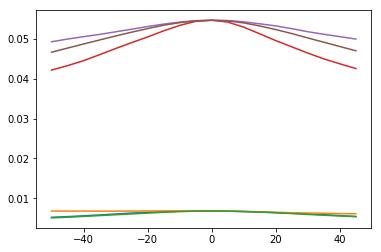

In [43]:
# Test plotting landscape of different structures using the same scale

plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_x_all['AP']);
plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_y_all['AP']);
plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_z_all['AP']);

plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_x_all['7N_L']);
plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_y_all['7N_L']);
plt.plot(np.rad2deg(waypoints_rad), neighbor_scores_slice_rot_around_z_all['7N_L']);

# Show all score landscape visualization in subplots.

In [34]:
score_landscape_rotations_pngs = {}

for structure in all_known_structures_sided:
    try:
        landscape_plot_fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
                                                   classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
                                                   warp_setting=warp_setting,
                                                    param_suffix=structure,
                                                   what='score_landscape_rotations')
        download_from_s3(landscape_plot_fp)
        score_landscape_rotations_pngs[structure] = imread(landscape_plot_fp)
    except:
        pass

rm -rf /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_sp5_scoreLandscapeRotations.png && mkdir -p /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations
aws s3 cp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_sp5_scoreLandscapeRotations.png /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_sp5_scoreLandscapeRotations.png


Child returned 0
Child returned 1
0.43 seconds.
Child returned 0


rm -rf /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_outerContour_scoreLandscapeRotations.png && mkdir -p /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations
aws s3 cp s3://mousebrainatlas-data/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_outerContour_scoreLandscapeRotations.png /shared/CSHL_registration_parameters/atlasV3/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_scoreLandscapeRotations/atlasV3_down32_scoreVolume_clf_37_warp_8_MD642_down32_scoreVolume_clf_37_parameters_outerContour_scoreLandscapeRotations.png


Child returned 1
0.37 seconds.


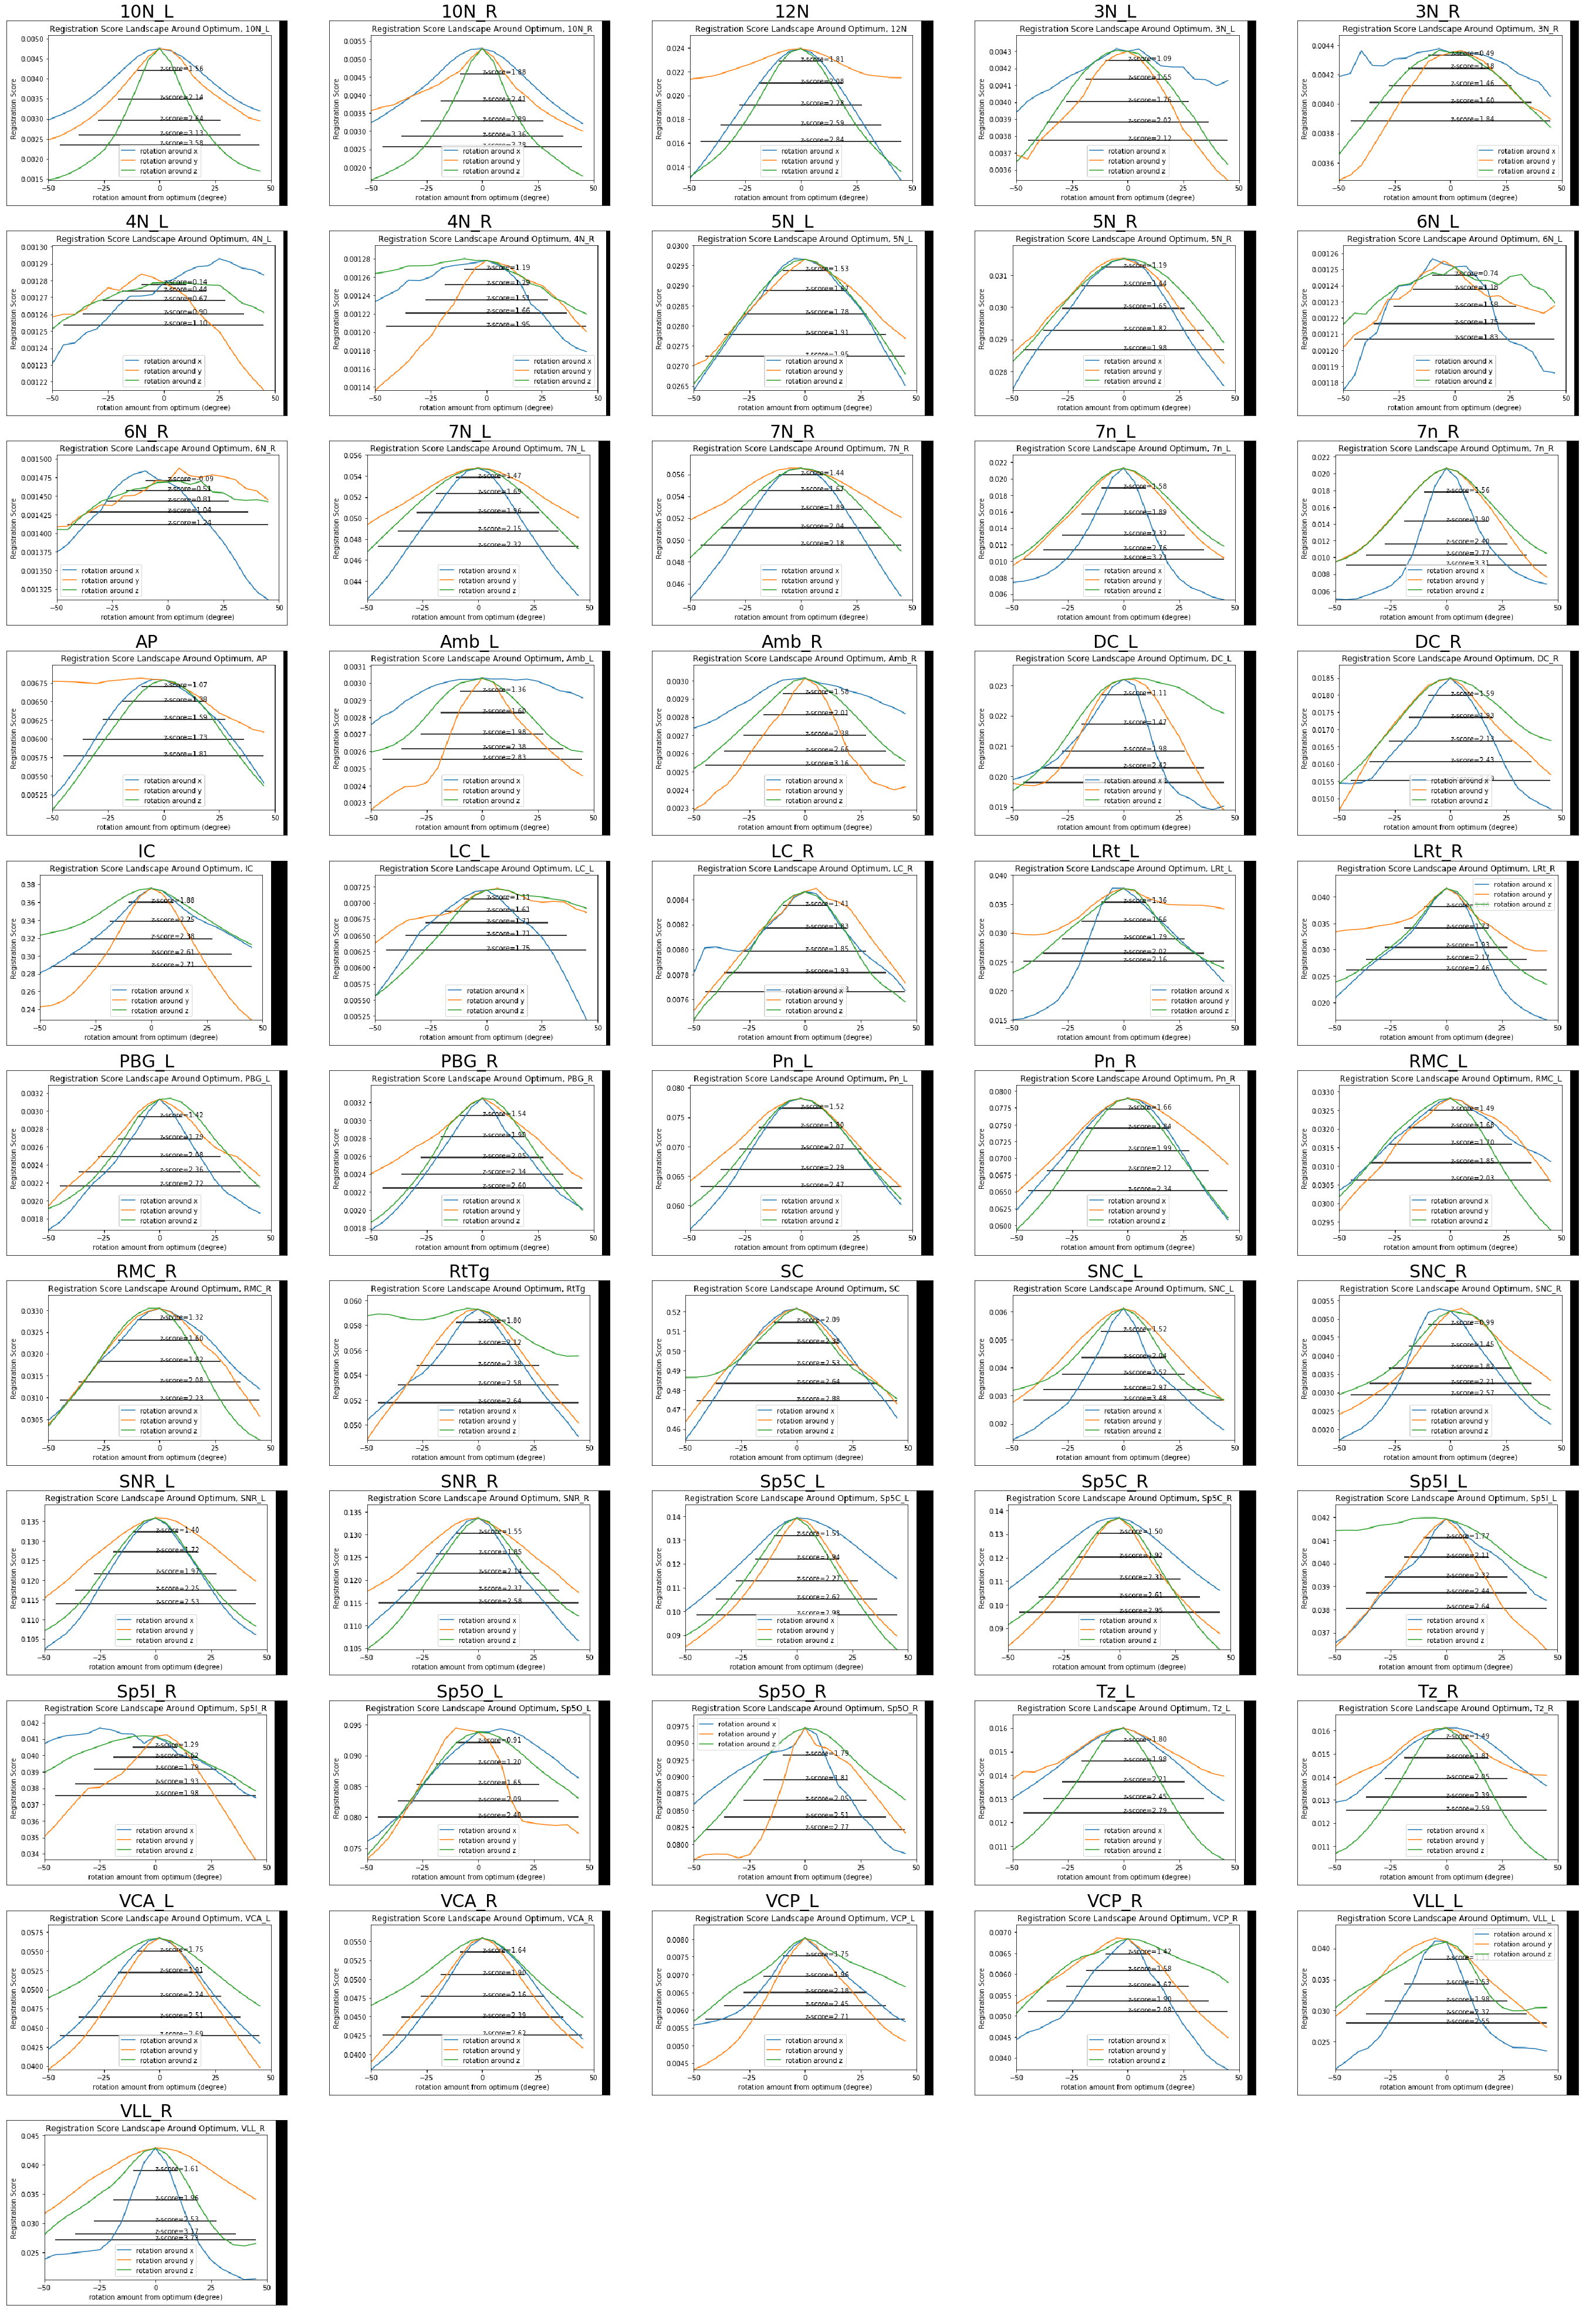

In [35]:
structures_sorted, vizs_sorted = zip(*sorted(score_landscape_rotations_pngs.items()))

display_images_in_grids(map(lambda v: v[..., :3], vizs_sorted), 
                       titles=structures_sorted, 
                       nc=5)

# Compute Peak Radius for all structures in all stacks

In [113]:
# stack_moving = 'atlasV5'
# classifier_setting = 37
# warp_setting = 8
# downscale = 32
# xy_pixel_distance = XY_PIXEL_DISTANCE_LOSSLESS * downscale

In [164]:
# peak_radius_all_stacks_all_structures = defaultdict(dict)

# # for stack_fixed in all_nissl_stacks:
# for stack_fixed in ['MD635', 'MD642']:

#     for structure in all_known_structures_sided:
#         try:
            
#             # Compute peak radius using hessian and z-score.

#             peak_radius = defaultdict(dict)
#             for poolradius_um, (zscore, fmax, mu, std) in zscores_all_stacks_all_structures[stack_fixed][structure].iteritems():
#                 for stepsize_um, (H, fmax) in hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure].iteritems():
#                     if poolradius_um > stepsize_um:
#                         U, S, UT = np.linalg.svd(H)

#                         # using the smallest eigenvalues of Hessians (flattest direction), drop to mean
#                         peak_radius_pixel_max = np.sqrt(2*(fmax-mu)/S[-1])

#                         # using the largest eigenvalues of Hessians (steepest direction), drop to mean
#                         peak_radius_pixel_min = np.sqrt(2*(fmax-mu)/S[0])

#                         # using the largest eigenvalues of Hessians, drop to 2-sigma
#                         peak_radius_pixel_2sigma = np.sqrt(2*(fmax-(mu+2*std))/S[0])

#                         peak_radius[poolradius_um][stepsize_um] = (peak_radius_pixel_max * xy_pixel_distance,
#                                                                   peak_radius_pixel_min * xy_pixel_distance,
#                                                                   peak_radius_pixel_2sigma * xy_pixel_distance)
#             peak_radius.default_factory = None
            
#             peak_radius_fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
#                                                            classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
#                                                            warp_setting=warp_setting,
#                                                             param_suffix=structure,
#                                                            what='peak_radius')
#             create_parent_dir_if_not_exists(peak_radius_fp)
#             save_pickle(peak_radius, peak_radius_fp)
#             upload_to_s3(peak_radius_fp)
            
#             peak_radius_all_stacks_all_structures[stack_fixed][structure] = peak_radius

#         except Exception as e:
#             sys.stderr.write('Error %s:' % structure + str(e) + '\n')
                
# peak_radius_all_stacks_all_structures.default_factory = None

In [166]:
# pooling_radius_list = sorted(zscores.keys())
# print 'pooling radius:', pooling_radius_list
# hessian_stepsize_list = sorted(hessians_all_stepsizes.keys())
# print 'hessian stepsize:', hessian_stepsize_list

# Compute Peak Radius for all structures in all stacks, for rotation

In [165]:
# peak_radius_rad_all_stacks_all_structures = defaultdict(dict)

# # for stack_fixed in all_nissl_stacks:
# for stack_fixed in ['MD635', 'MD642']:
# # for stack_fixed in ['MD635']:

#     for structure in all_known_structures_sided:
# #     for structure in ['7N_R']:
#         try:
            
#             # Compute peak radius using hessian and z-score.
#             peak_radius_rad = defaultdict(dict)
#             for poolradius_rad, (zscore, fmax, mu, std) in zscores_all_stacks_all_structures[stack_fixed][structure].iteritems():
#                 for stepsize_rad, (H, fmax) in hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure].iteritems():
#                     if poolradius_rad > stepsize_rad * 1:  # compute only if pooling radius is at least twice the step size
# #                         U, S, UT = np.linalg.svd(H)
#                         S_theta_xy = -H[2,2]
#                         S_theta_yz = -H[0,0]
#                         S_theta_xz = -H[1,1]

#                         # using the smallest eigenvalues of Hessians (flattest direction), drop to mean
#                         peak_radius_rad_theta_xy = np.sqrt(2*(fmax-mu)/S_theta_xy)
#                         peak_radius_rad_theta_yz = np.sqrt(2*(fmax-mu)/S_theta_yz)
#                         peak_radius_rad_theta_xz = np.sqrt(2*(fmax-mu)/S_theta_xz)

# #                         # using the diagonal elements of Hessians, drop to 2-sigma
# #                         peak_radius_rad_theta_xy_2sigma = np.sqrt(2*(fmax-(mu+2*std))/S_theta_xy)
# #                         peak_radius_rad_theta_yz_2sigma = np.sqrt(2*(fmax-(mu+2*std))/S_theta_yz)
# #                         peak_radius_rad_theta_xz_2sigma = np.sqrt(2*(fmax-(mu+2*std))/S_theta_xz)

#                         peak_radius_rad[poolradius_rad][stepsize_rad] = (peak_radius_rad_theta_xy,
#                                                                       peak_radius_rad_theta_yz,
#                                                                       peak_radius_rad_theta_xz)
# #                                                                       peak_radius_rad_theta_xy_2sigma,
# #                                                                       peak_radius_rad_theta_yz_2sigma,
# #                                                                       peak_radius_rad_theta_xz_2sigma)
#             peak_radius_rad.default_factory = None
            
# #             peak_radius_fp = DataManager.get_confidence_filepath(stack_m=stack_moving, stack_f=stack_fixed, 
# #                                                            classifier_setting_m=classifier_setting, classifier_setting_f=classifier_setting,
# #                                                            warp_setting=warp_setting,
# #                                                             param_suffix=structure,
# #                                                            what='peak_radius_rotations')
# #             create_parent_dir_if_not_exists(peak_radius_fp)
# #             save_pickle(peak_radius_rad, peak_radius_fp)
# #             upload_to_s3(peak_radius_fp)
            
#             peak_radius_rad_all_stacks_all_structures[stack_fixed][structure] = peak_radius_rad

#         except Exception as e:
#             sys.stderr.write('Error %s: %s.\n' % (structure, str(e)))
                
# peak_radius_rad_all_stacks_all_structures.default_factory = None

# Rank structures by confidence

In [125]:
stack_fixed = 'MD635'

In [128]:
# zscores_all_stacks_all_structures[stack_fixed][structure]
# hessians_all_stacks_all_structures_all_stepsizes[stack_fixed][structure]
prmax_all_structures = {structure: x[118.75][84.64][0] for structure, x in peak_radius_all_stacks_all_structures[stack_fixed].iteritems()}

structures_sorted_by_prmax, prmax_sorted = zip(*sorted(prmax_all_structures.items(), key=lambda x: x[1]))

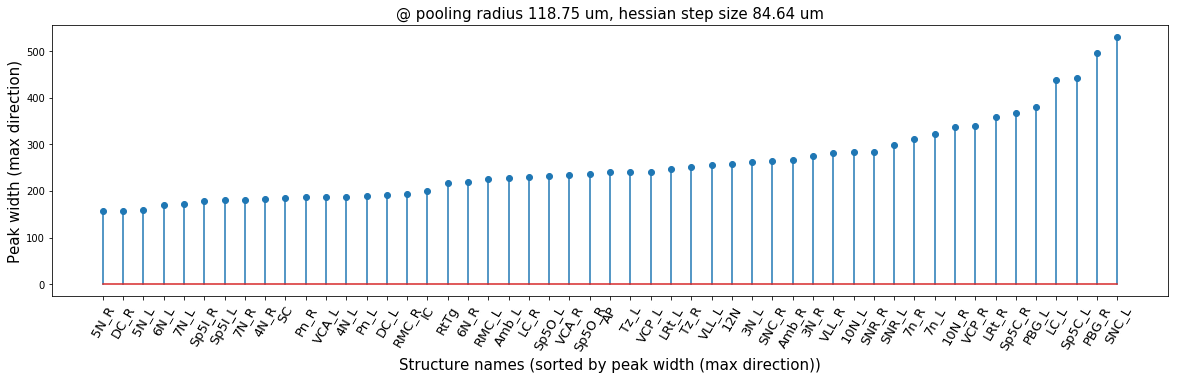

In [129]:
plt.figure(figsize=(20,5));
plt.stem(range(len(prmax_sorted)), prmax_sorted);
plt.xticks(range(len(structures_sorted_by_prmax)), structures_sorted_by_prmax, rotation='60', fontsize=13);
plt.xlabel('Structure names (sorted by peak width (max direction))', fontsize=15);
plt.ylabel('Peak width (max direction)', fontsize=15);
plt.title('@ pooling radius 118.75 um, hessian step size 84.64 um', fontsize=15);

In [130]:
zscores_all_structures = {structure: x[118.75][0] for structure, x in zscores_all_stacks_all_structures[stack_fixed].iteritems()}
structures_sorted_by_zscore, zscores_sorted = zip(*sorted(zscores_all_structures.items(), key=lambda x: x[1], reverse=True))

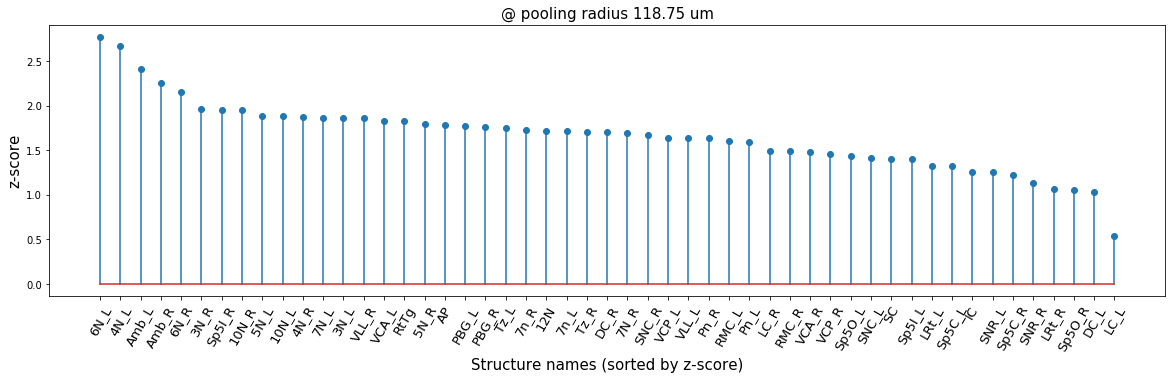

In [134]:
plt.figure(figsize=(20,5));
plt.stem(range(len(zscores_sorted)), zscores_sorted);
plt.xticks(range(len(structures_sorted_by_zscore)), structures_sorted_by_zscore, rotation='60', fontsize=13);
plt.xlabel('Structure names (sorted by z-score)', fontsize=15);
plt.ylabel('z-score', fontsize=15);
plt.title('@ pooling radius 118.75 um', fontsize=15);

In [164]:
structures_ranked = [structures_sided_sorted_by_size[i] for i in \
                                  np.argsort(\
                                             np.argsort(np.argsort([zscores_all_structures[s] for s in structures_sided_sorted_by_size])[::-1]) + \
                                             np.argsort(np.argsort([prmax_all_structures[s] for s in structures_sided_sorted_by_size])))]

In [169]:
print structures_ranked[-10:]

['LRt_L', 'Sp5O_R', 'VCP_R', 'SNR_L', 'SNR_R', 'SNC_L', 'Sp5C_L', 'Sp5C_R', 'LRt_R', 'LC_L']


In [136]:
print 'Unconfident structures:', set(structures_sorted_by_prmax[-15:]) & set(structures_sorted_by_zscore[-15:])

Unconfident structures: set(['LRt_R', 'VCP_R', 'Sp5C_L', 'SNR_L', 'SNC_L', 'LC_L', 'Sp5C_R', 'SNR_R'])


# Rank structures by confidence, for rotations

In [53]:
stack = 'MD642'

In [54]:
prAroundZ_all_structures = {structure: x[np.deg2rad(pool_radius_degrees_list[2])][np.deg2rad(rotation_stepsizes_degrees[2])][0] for structure, x in peak_radius_rad_all_stacks_all_structures[stack].iteritems()}
structures_sorted_by_prAroundZ, prAroundZ_sorted = zip(*sorted(prAroundZ_all_structures.items(), key=lambda (s, pr): pr))

prAroundX_all_structures = {structure: x[np.deg2rad(pool_radius_degrees_list[2])][np.deg2rad(rotation_stepsizes_degrees[2])][2] for structure, x in peak_radius_rad_all_stacks_all_structures[stack].iteritems()}
structures_sorted_by_prAroundX, prAroundX_sorted = zip(*sorted(prAroundX_all_structures.items(), key=lambda (s, pr): pr))

prAroundY_all_structures = {structure: x[np.deg2rad(pool_radius_degrees_list[2])][np.deg2rad(rotation_stepsizes_degrees[2])][1] for structure, x in peak_radius_rad_all_stacks_all_structures[stack].iteritems()}
structures_sorted_by_prAroundY, prAroundY_sorted = zip(*sorted(prAroundY_all_structures.items(), key=lambda (s, pr): pr))

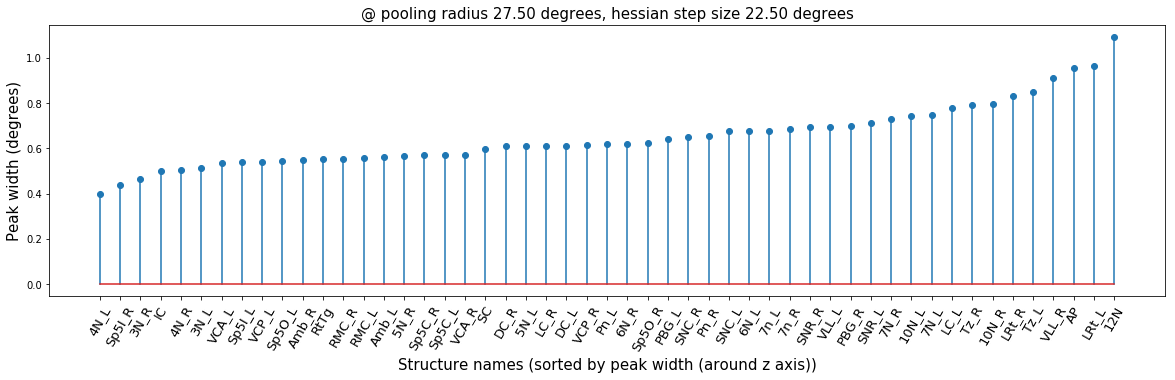

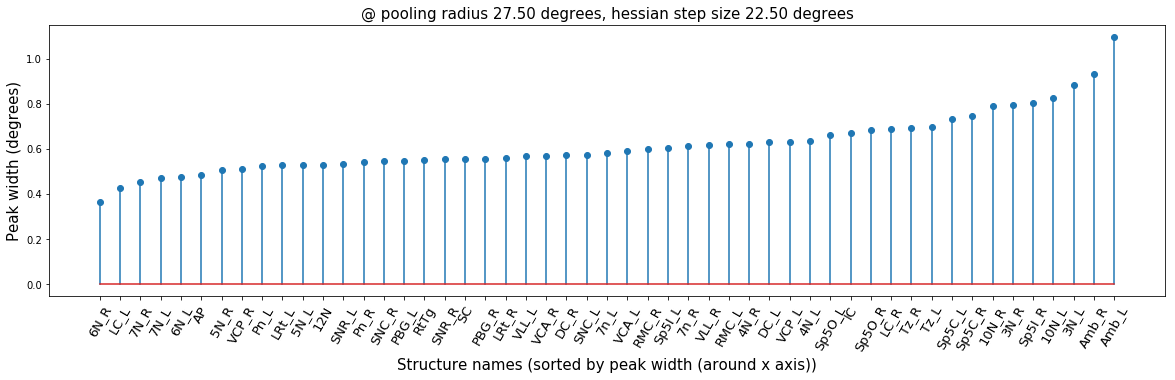

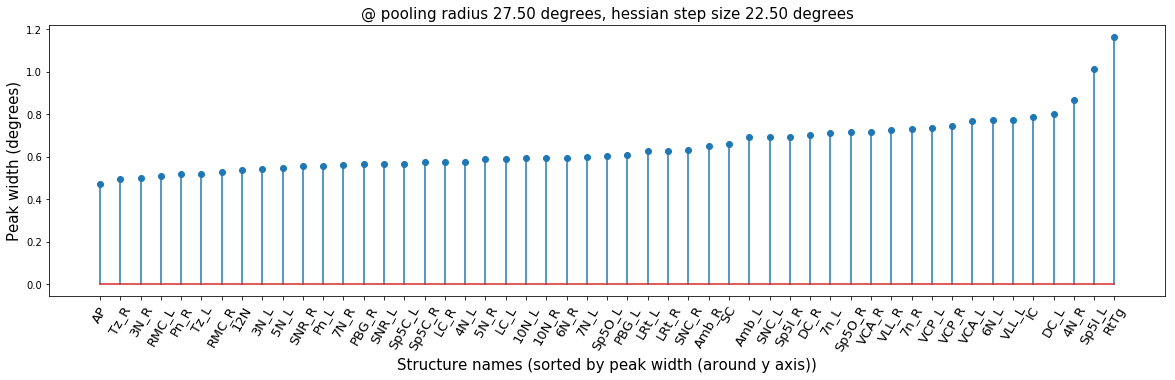

In [55]:
plt.figure(figsize=(20,5));
plt.stem(range(len(prAroundZ_sorted)), prAroundZ_sorted);
plt.xticks(range(len(structures_sorted_by_prAroundZ)), structures_sorted_by_prAroundZ, rotation='60', fontsize=13);
plt.xlabel('Structure names (sorted by peak width (around z axis))', fontsize=15);
plt.ylabel('Peak width (degrees)', fontsize=15);
plt.title('@ pooling radius %.2f degrees, hessian step size %.2f degrees' % (pool_radius_degrees_list[2], rotation_stepsizes_degrees[2]), 
          fontsize=15);
plt.show();

plt.figure(figsize=(20,5));
plt.stem(range(len(prAroundX_sorted)), prAroundX_sorted);
plt.xticks(range(len(structures_sorted_by_prAroundX)), structures_sorted_by_prAroundX, rotation='60', fontsize=13);
plt.xlabel('Structure names (sorted by peak width (around x axis))', fontsize=15);
plt.ylabel('Peak width (degrees)', fontsize=15);
plt.title('@ pooling radius %.2f degrees, hessian step size %.2f degrees' % (pool_radius_degrees_list[2], rotation_stepsizes_degrees[2]), 
          fontsize=15);
plt.show();

plt.figure(figsize=(20,5));
plt.stem(range(len(prAroundY_sorted)), prAroundY_sorted);
plt.xticks(range(len(structures_sorted_by_prAroundY)), structures_sorted_by_prAroundY, rotation='60', fontsize=13);
plt.xlabel('Structure names (sorted by peak width (around y axis))', fontsize=15);
plt.ylabel('Peak width (degrees)', fontsize=15);
plt.title('@ pooling radius %.2f degrees, hessian step size %.2f degrees' % (pool_radius_degrees_list[2], rotation_stepsizes_degrees[2]), 
          fontsize=15);
plt.show();

# Plot peak radius of different structures in one stack

In [17]:
pool_radius = 100
hessian_stepsize = 25

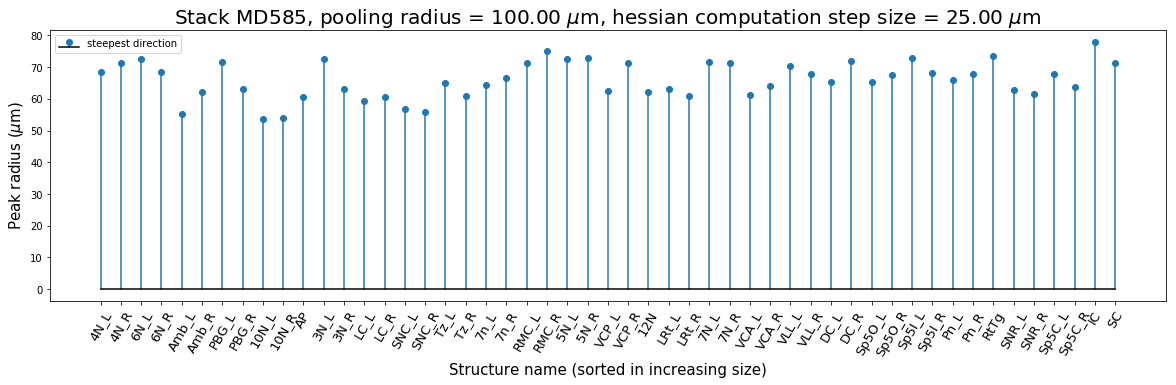

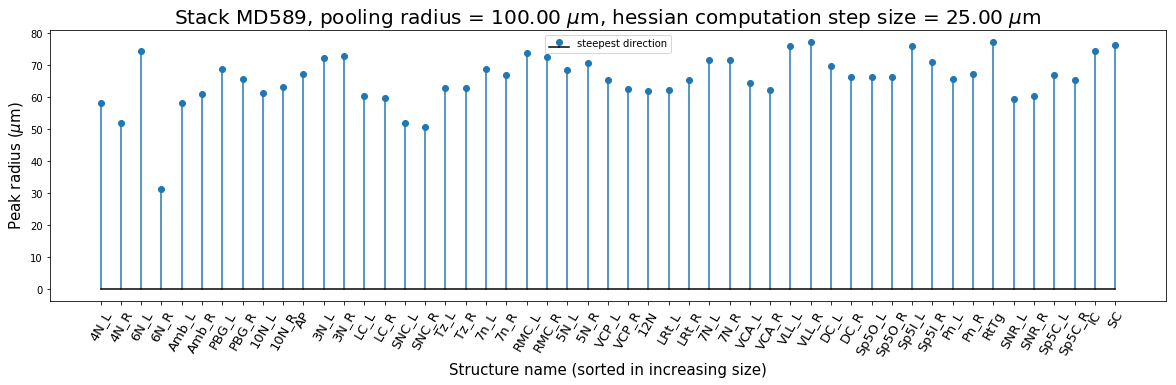

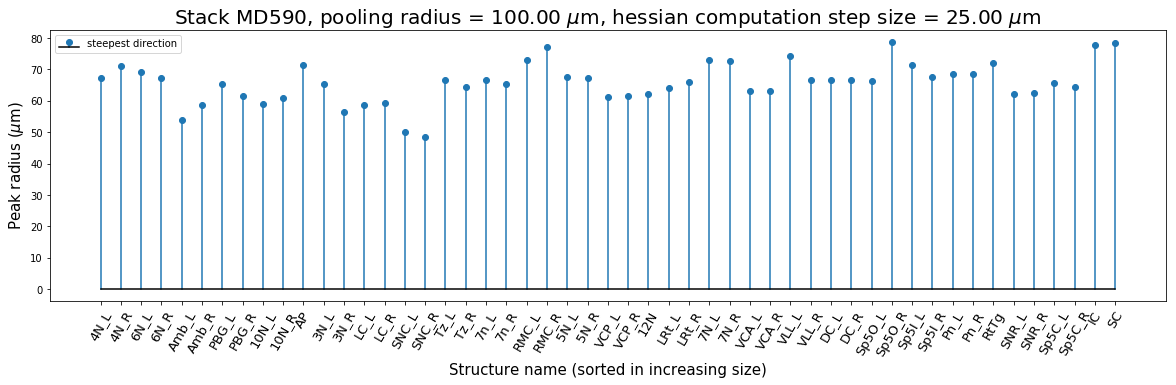

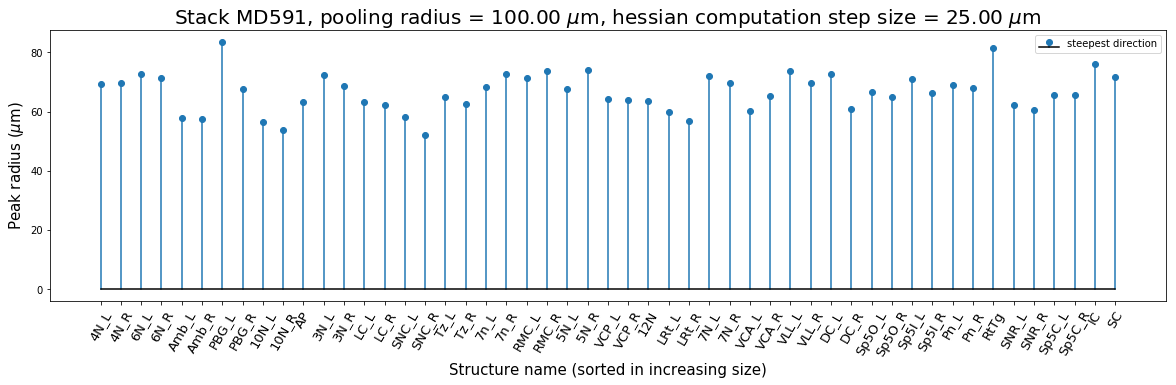

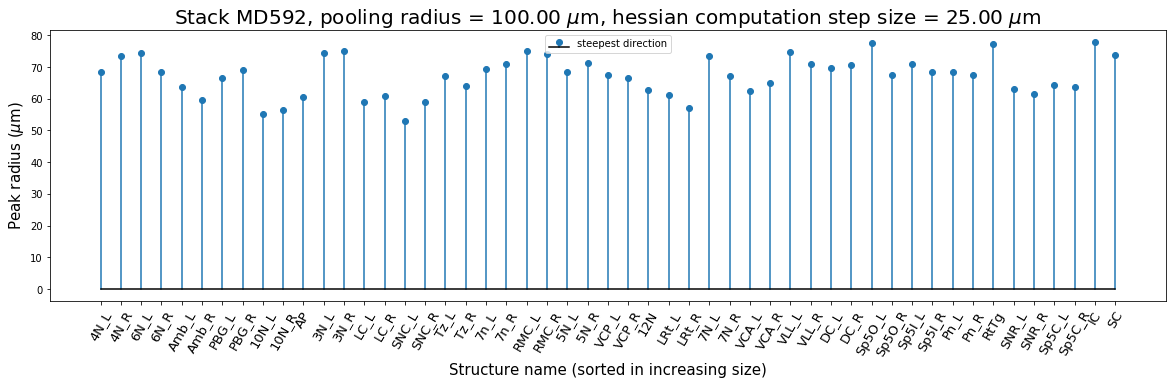

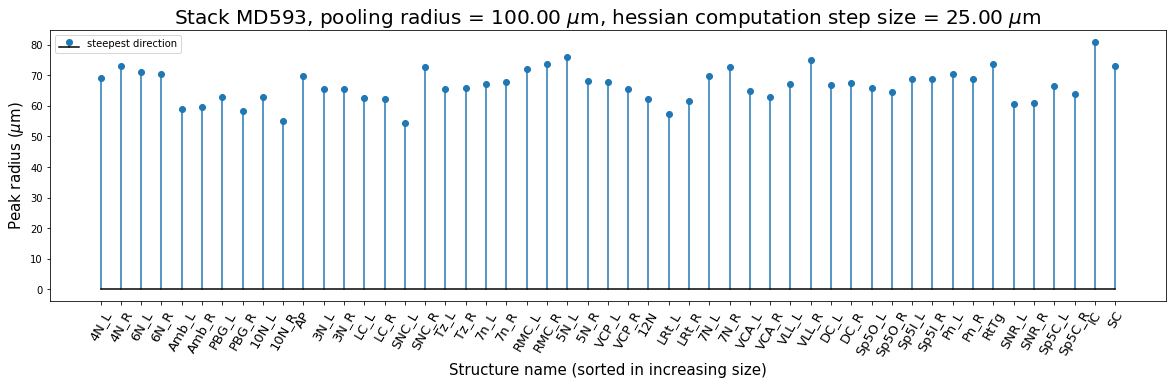

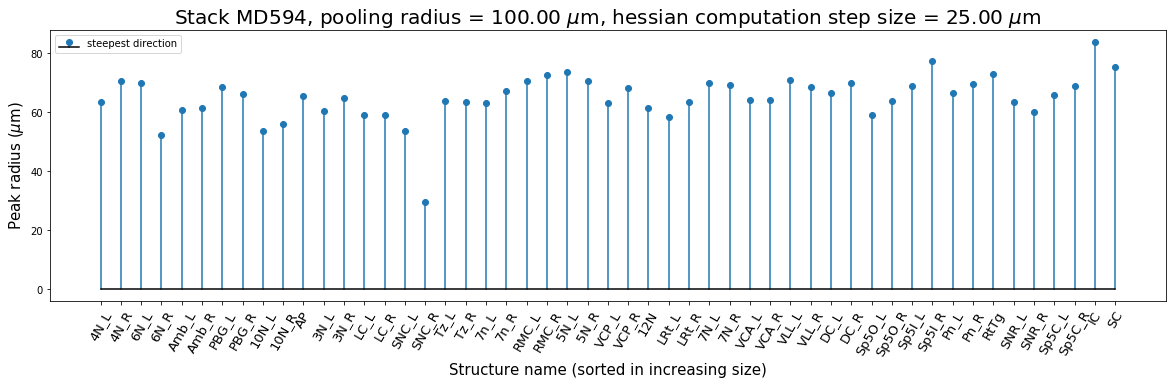

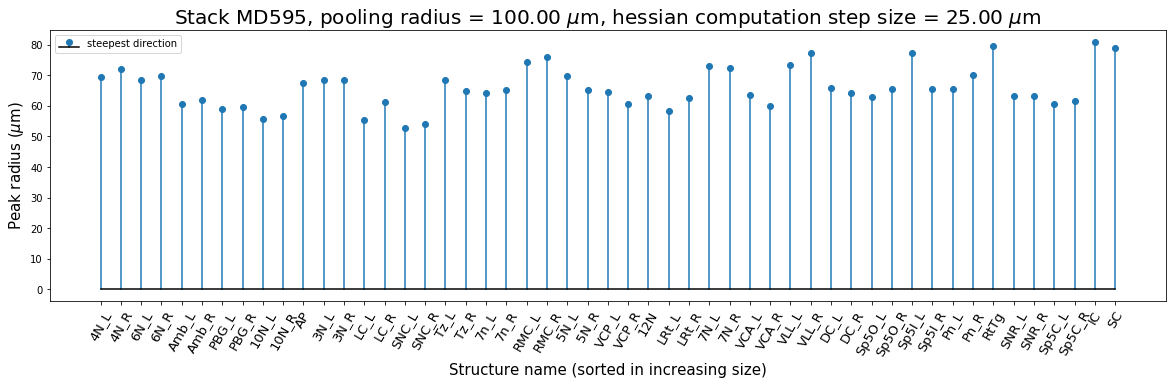

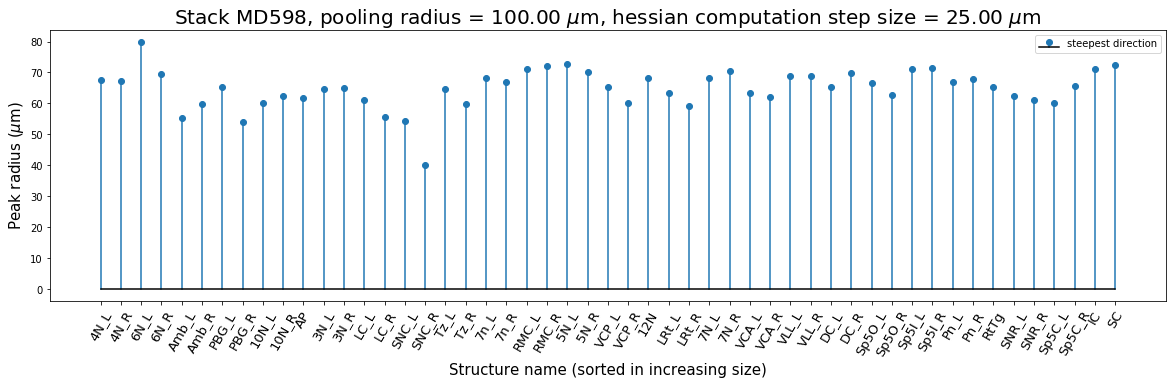

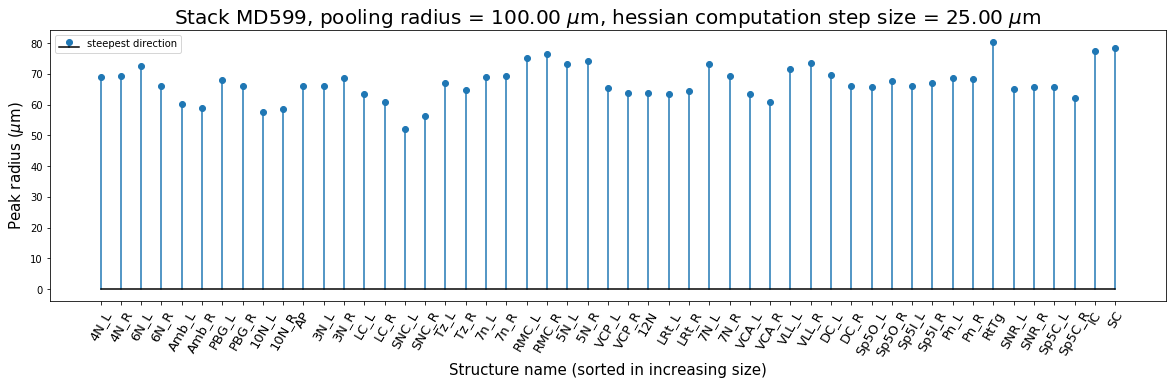

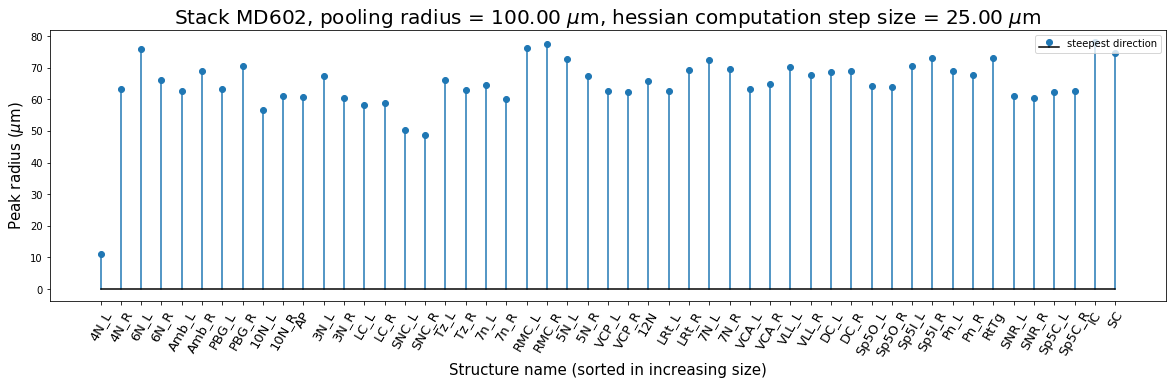

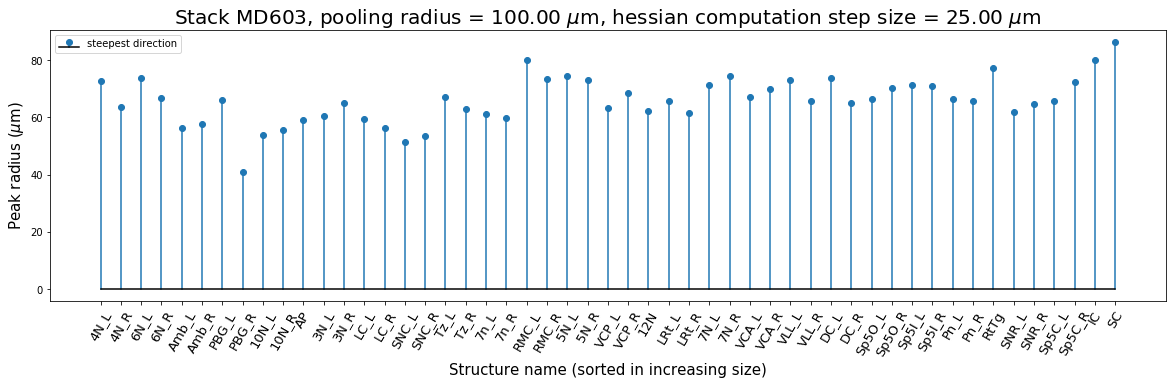

In [22]:
for stack in all_nissl_stacks:

    plt.figure(figsize=(20, 5));

#     D = np.array([peakradius_x_um_allstacks_allstructures_allsteps_allpools[stack][s][hessian_stepsize][pool_radius]
#          for s in structures_sided_sorted_by_size])
#     plt.stem(range(1, len(structures_sided_sorted_by_size)+1), D, label='x', markerfmt='o', basefmt='k');
    
#     D = np.array([peakradius_y_um_allstacks_allstructures_allsteps_allpools[stack][s][hessian_stepsize][pool_radius]
#          for s in structures_sided_sorted_by_size])
#     plt.stem(range(1, len(structures_sided_sorted_by_size)+1), D, label='y', markerfmt='o', basefmt='k');
    
#     D = np.array([peakradius_z_um_allstacks_allstructures_allsteps_allpools[stack][s][hessian_stepsize][pool_radius]
#          for s in structures_sided_sorted_by_size])
#     plt.stem(range(1, len(structures_sided_sorted_by_size)+1), D, label='z', markerfmt='o', basefmt='k');
    
    D = np.array([peakradius_min_um_allstacks_allstructures_allsteps_allpools[stack][s][hessian_stepsize][pool_radius]
         for s in structures_sided_sorted_by_size])
    plt.stem(range(1, len(structures_sided_sorted_by_size)+1), D, label='steepest direction', markerfmt='o', basefmt='k');

#     D = np.array([peakradius_max_um_allstacks_allstructures_allsteps_allpools[stack][s][hessian_stepsize][pool_radius]
#          for s in structures_sided_sorted_by_size])
#     plt.stem(range(1, len(structures_sided_sorted_by_size)+1), D, label='flattest direction', markerfmt='o', basefmt='k');

    plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, 
               rotation='60', fontsize=13);
#     plt.ylim([40,150]);
    plt.xlabel('Structure name (sorted in increasing size)', fontsize=15);
    plt.ylabel('Peak radius ($\mu$m)', fontsize=15);
    plt.title('Stack %s, pooling radius = %.2f $\mu$m, hessian computation step size = %.2f $\mu$m' % (stack, pool_radius, hessian_stepsize), fontsize=20);
    plt.legend();
    plt.show();

# Plot peak radius of different structures in one stack, for rotation

In [56]:
# Choose one set of meta parameters.

pool_radius_rad = np.deg2rad(pool_radius_degrees_list[2])
hessian_stepsize_rad = np.deg2rad(rotation_stepsizes_degrees[2])

In [57]:
structures_sided_sorted_by_size = ['4N_L', '4N_R', '6N_L', '6N_R', 'Amb_L', 'Amb_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'AP', '3N_L', '3N_R', 'LC_L', 'LC_R', 'SNC_L', 'SNC_R', 'Tz_L', 'Tz_R', '7n_L', '7n_R', 'RMC_L', 'RMC_R', '5N_L', '5N_R', 'VCP_L', 'VCP_R', '12N', 'LRt_L', 'LRt_R', '7N_L', '7N_R', 'VCA_L', 'VCA_R', 'VLL_L', 'VLL_R', 'DC_L', 'DC_R', 'Sp5O_L', 'Sp5O_R', 'Sp5I_L', 'Sp5I_R', 'Pn_L', 'Pn_R', 'RtTg', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'IC', 'SC']

In [58]:
stack = 'MD642'

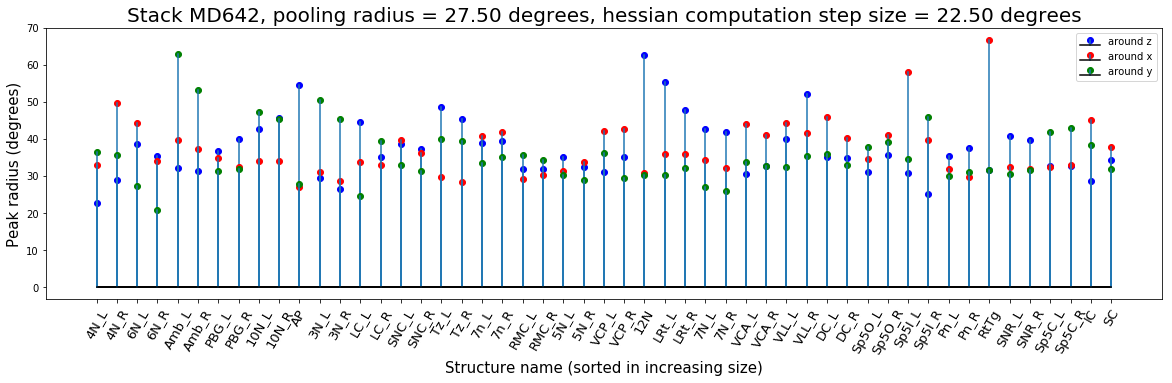

In [65]:
D = np.array([np.rad2deg(peak_radius_rad_all_stacks_all_structures[stack][s][pool_radius_rad][hessian_stepsize_rad])
              for s in structures_sided_sorted_by_size])

xticks = range(1, len(structures_sided_sorted_by_size)+1)

plt.figure(figsize=(20, 5));
plt.stem(xticks, D[:,0], label='around z', markerfmt='bo', basefmt='k');
plt.stem(xticks, D[:,1], label='around x', markerfmt='ro', basefmt='k');
plt.stem(xticks, D[:,2], label='around y', markerfmt='go', basefmt='k');
plt.xticks(xticks, structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted in increasing size)', fontsize=15);
plt.ylabel('Peak radius (degrees)', fontsize=15);
plt.title('Stack %s, pooling radius = %.2f degrees, hessian computation step size = %.2f degrees' % \
          (stack, np.rad2deg(pool_radius_rad), np.rad2deg(hessian_stepsize_rad)), fontsize=20);
plt.legend();

# ALL STACKS

# Plot z-scores of different structures for all stacks

In [17]:
pool_radius = 100

In [21]:
# zsocres_all_structures_all_stacks_one_poolingRadius = defaultdict(dict)
# for st, zs_all_structs in zscores_all_stacks_all_structures_all_poolradius.iteritems():
#     for struct, zs in zs_all_structs.iteritems():
#         zsocres_all_structures_all_stacks_one_poolingRadius[struct][st] = zs[pool_radius][0]
        
# zsocres_all_structures_all_stacks_one_poolingRadius.default_factory = None

In [64]:
stack_to_color['MD592'] = (0, 200, 200)

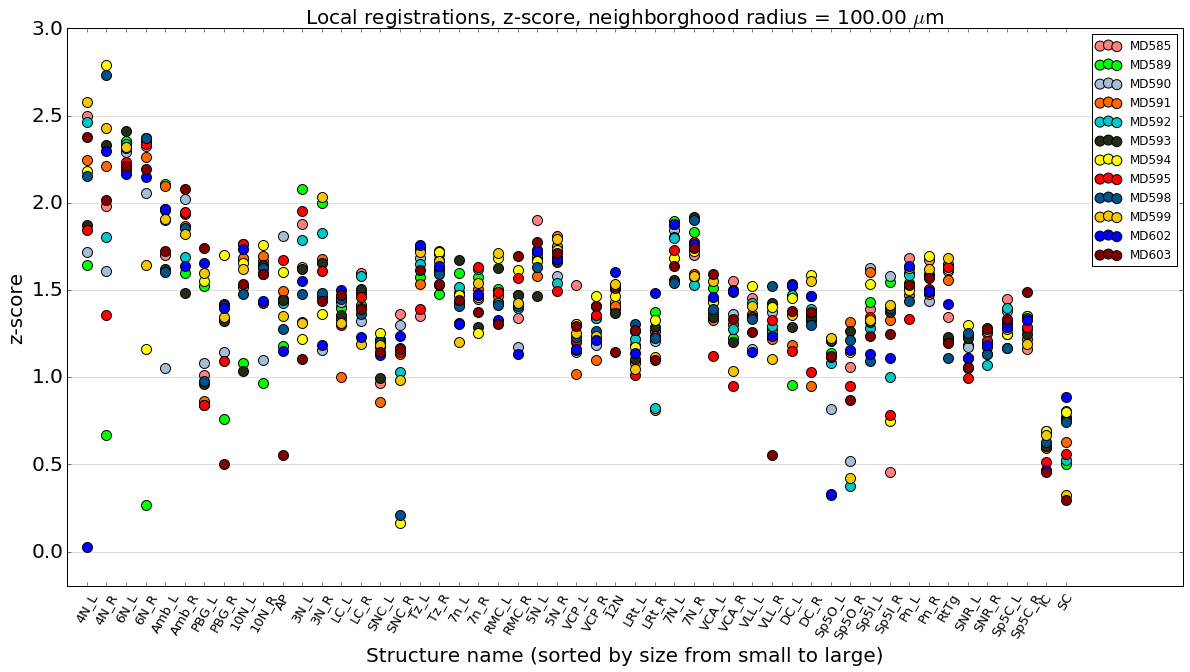

In [68]:
# plt.figure(figsize=(20, 5));
plt.figure(figsize=(20, 10));

for stack in all_nissl_stacks:
    plt.scatter(range(len(structures_sided_sorted_by_size)),
                np.array([zscores_all_stacks_all_structures_all_poolradius[stack][struct][pool_radius][0]
     for struct in structures_sided_sorted_by_size]),
               label=stack, c=np.array(stack_to_color[stack])/255., s=100)

plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
          rotation='60', fontsize=13)
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.xlim([-1,56]);
plt.yticks(np.arange(0, 4.5, .5), map(str, np.arange(0, 4.5, .5)), fontsize=20);
plt.ylim([-.2, 3.0]);
plt.ylabel('z-score', fontsize=20);
plt.title('Local registrations, z-score, neighborghood radius = %.2f $\mu$m' % (pool_radius), fontsize=20);
plt.legend();

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

In [74]:
# Print all registrations whose z-score is less than 1.

for struct in structures_sided_sorted_by_size:
    print struct, 
    print [stack for stack in all_nissl_stacks
           if zscores_all_stacks_all_structures_all_poolradius[stack][struct][pool_radius][0] < 1.]

4N_L ['MD602']
4N_R ['MD589']
6N_L []
6N_R ['MD589']
Amb_L []
Amb_R []
PBG_L ['MD591', 'MD592', 'MD593', 'MD595', 'MD598']
PBG_R ['MD589', 'MD603']
10N_L []
10N_R ['MD589']
AP ['MD603']
3N_L []
3N_R []
LC_L []
LC_R []
SNC_L ['MD585', 'MD591', 'MD593']
SNC_R ['MD594', 'MD598', 'MD599']
Tz_L []
Tz_R []
7n_L []
7n_R []
RMC_L []
RMC_R []
5N_L []
5N_R []
VCP_L []
VCP_R []
12N []
LRt_L []
LRt_R ['MD591', 'MD592']
7N_L []
7N_R []
VCA_L []
VCA_R ['MD595']
VLL_L []
VLL_R ['MD603']
DC_L ['MD589']
DC_R ['MD591']
Sp5O_L ['MD590', 'MD594', 'MD602']
Sp5O_R ['MD590', 'MD592', 'MD595', 'MD599', 'MD603']
Sp5I_L []
Sp5I_R ['MD585', 'MD592', 'MD594', 'MD595']
Pn_L []
Pn_R []
RtTg []
SNR_L ['MD595']
SNR_R []
Sp5C_L []
Sp5C_R []
IC ['MD585', 'MD589', 'MD590', 'MD591', 'MD592', 'MD593', 'MD594', 'MD595', 'MD598', 'MD599', 'MD602', 'MD603']
SC ['MD585', 'MD589', 'MD590', 'MD591', 'MD592', 'MD593', 'MD594', 'MD595', 'MD598', 'MD599', 'MD602', 'MD603']


In [56]:
D = [zsocres_all_structures_all_stacks_one_poolingRadius[s].values() 
     for s in structures_sided_sorted_by_size]

In [34]:
# plt.figure(figsize=(20, 5));

# plt.boxplot(D);
# plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, 
#            rotation='60', fontsize=13);
# plt.yticks(np.arange(0, 4.5, .5), map(str, np.arange(0, 4.5, .5)), fontsize=20);
# plt.ylim([-.2,4.5]);
# plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# plt.ylabel('z-score', fontsize=20);
# plt.title('Local registrations, z-score, neighborghood radius = %.2f $\mu$m' % (pool_radius), fontsize=20);

# plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# # Hide these grid behind plot objects
# plt.gca().set_axisbelow(True)

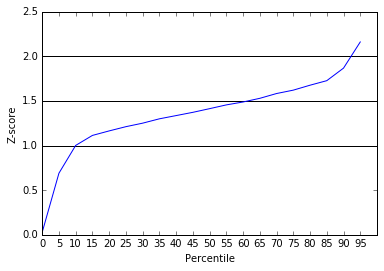

In [57]:
plt.plot(np.arange(0,100,5), [np.percentile(D, q) for q in np.arange(0,100,5)]);
plt.xticks(np.arange(0,100,5));
plt.xlabel('Percentile');
plt.ylabel('Z-score');
plt.hlines(1., xmin=0, xmax=100);
plt.hlines(1.5, xmin=0, xmax=100);
plt.hlines(2, xmin=0, xmax=100);
    
# This means 90% of all tasks has z-score > 1

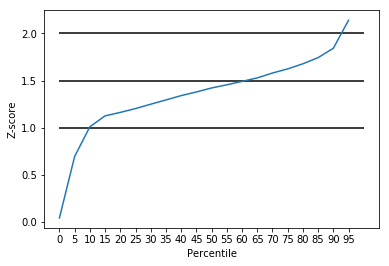

In [77]:
plt.plot(np.arange(0,100,5), [np.percentile(D, q) for q in np.arange(0,100,5)]);
plt.xticks(np.arange(0,100,5));
plt.xlabel('Percentile');
plt.ylabel('Z-score');
plt.hlines(1., xmin=0, xmax=100);
plt.hlines(1.5, xmin=0, xmax=100);
plt.hlines(2, xmin=0, xmax=100);
    
# This means 90% of all tasks has z-score > 1

In [58]:
np.mean(D)

1.4169021507966513

# Plot z-scores of different structures for all stacks, for rotation

In [112]:
# Choose one set of meta parameters.

pool_radius_rad = np.deg2rad(pool_radius_degrees_list[2])
hessian_stepsize_rad = np.deg2rad(rotation_stepsizes_degrees[2])

In [114]:
zscores_all_structures_all_stacks_one_poolingRadius = defaultdict(dict)
for st, zs_all_structs in zscores_all_stacks_all_structures.iteritems():
    for struct, zs in zs_all_structs.iteritems():
        zscores_all_structures_all_stacks_one_poolingRadius[struct][st] = zs[pool_radius_rad][0]
        
zscores_all_structures_all_stacks_one_poolingRadius.default_factory = None

In [115]:
structures_sided_sorted_by_size = ['4N_L', '4N_R', '6N_L', '6N_R', 'Amb_L', 'Amb_R', 'PBG_L', 'PBG_R', '10N_L', '10N_R', 'AP', '3N_L', '3N_R', 'LC_L', 'LC_R', 'SNC_L', 'SNC_R', 'Tz_L', 'Tz_R', '7n_L', '7n_R', 'RMC_L', 'RMC_R', '5N_L', '5N_R', 'VCP_L', 'VCP_R', '12N', 'LRt_L', 'LRt_R', '7N_L', '7N_R', 'VCA_L', 'VCA_R', 'VLL_L', 'VLL_R', 'DC_L', 'DC_R', 'Sp5O_L', 'Sp5O_R', 'Sp5I_L', 'Sp5I_R', 'Pn_L', 'Pn_R', 'RtTg', 'SNR_L', 'SNR_R', 'Sp5C_L', 'Sp5C_R', 'IC', 'SC']

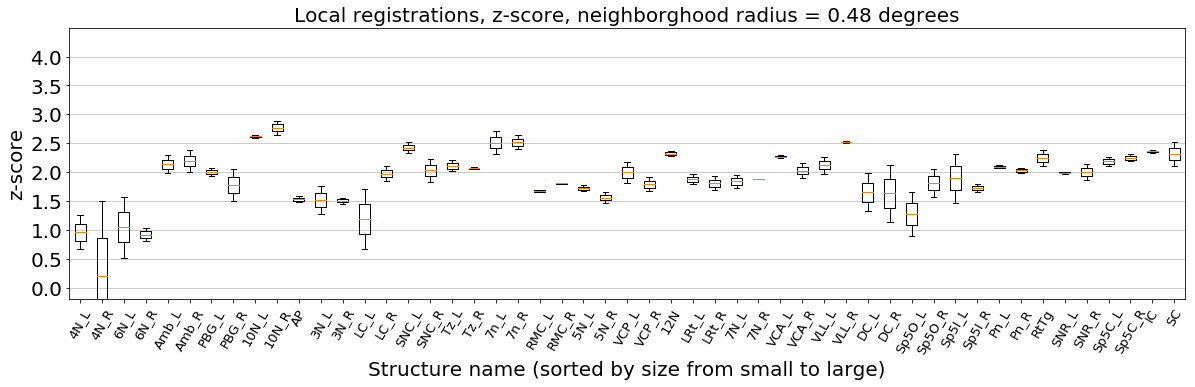

In [116]:
plt.figure(figsize=(20, 5));

D = [zscores_all_structures_all_stacks_one_poolingRadius[s].values() 
     for s in structures_sided_sorted_by_size]

plt.boxplot(D);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, 
           rotation='60', fontsize=13);
plt.yticks(np.arange(0, 4.5, .5), map(str, np.arange(0, 4.5, .5)), fontsize=20);
plt.ylim([-.2,4.5]);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.ylabel('z-score', fontsize=20);
# plt.title('z-score', fontsize=20);
plt.title('Local registrations, z-score, neighborghood radius = %.2f degrees' % (pool_radius_rad), fontsize=20);

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

# Plot peak radius of different structures for all stacks

In [82]:
pool_radius = 100
hessian_stepsize = 25

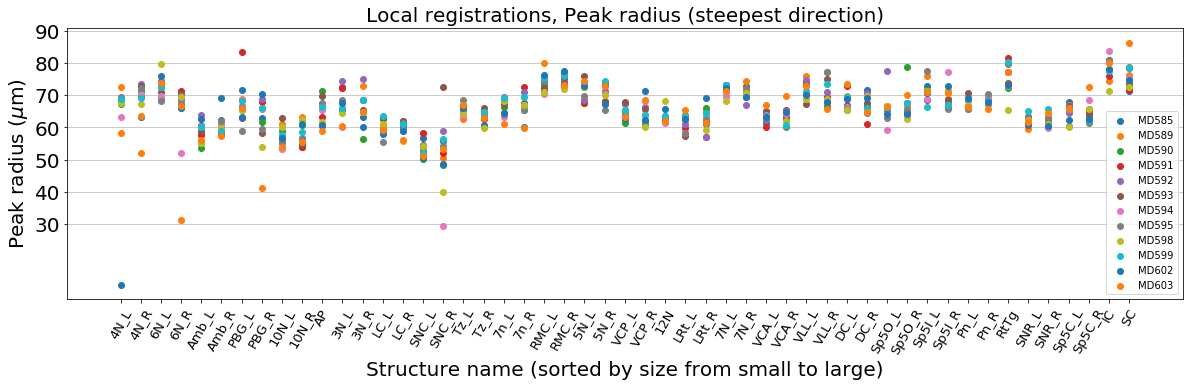

In [45]:
plt.figure(figsize=(20, 5));

for stack in all_nissl_stacks:
    plt.scatter(range(len(structures_sided_sorted_by_size)),
                np.array([peakradius_min_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size]),
               label=stack)

plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
          rotation='60', fontsize=13)

plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.yticks(np.arange(30, 100, 10), fontsize=20);
plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
plt.title('Local registrations, Peak radius (steepest direction)', fontsize=20);
plt.legend();

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

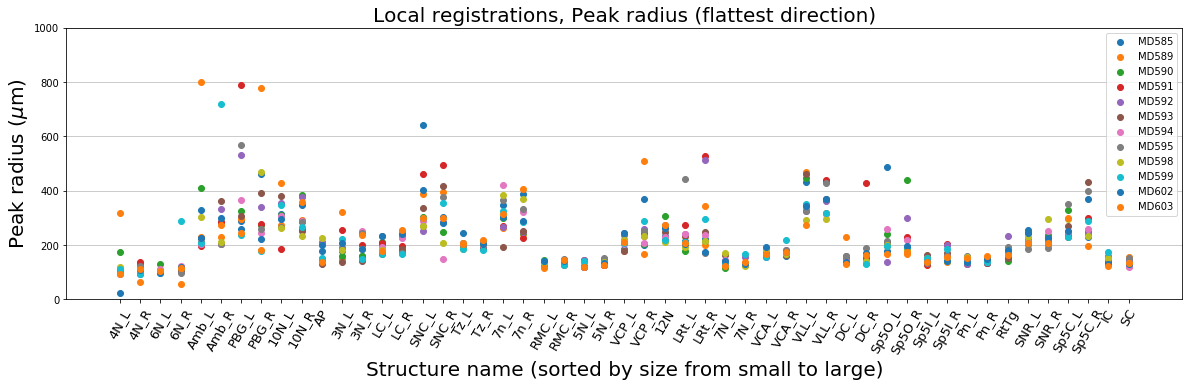

In [57]:
plt.figure(figsize=(20, 5));

for stack in all_nissl_stacks:
    plt.scatter(range(len(structures_sided_sorted_by_size)),
                np.array([peakradius_max_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size]),
               label=stack)

plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
          rotation='60', fontsize=13)

plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.ylim([0,1000]);
# plt.yticks(np.arange(30, 100, 10), fontsize=20);
plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
plt.title('Local registrations, Peak radius (flattest direction)', fontsize=20);
plt.legend();

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

193.008497831


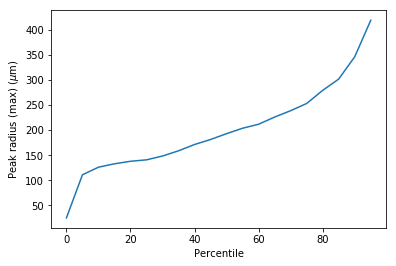

In [73]:
x = np.array([peakradius_max_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size
         for stack in all_nissl_stacks])
plt.plot(np.arange(0,100,5), [np.percentile(x, i) for i in np.arange(0,100,5)]);
plt.xlabel('Percentile');
plt.ylabel('Peak radius (max) ($\mu$m)');

print np.percentile(x, 50)

66.0483543626


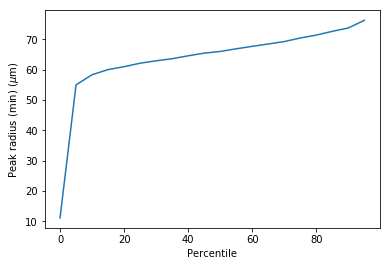

In [74]:
x = np.array([peakradius_min_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size
         for stack in all_nissl_stacks])
plt.plot(np.arange(0,100,5), [np.percentile(x, i) for i in np.arange(0,100,5)]);
plt.xlabel('Percentile');
plt.ylabel('Peak radius (min) ($\mu$m)');

print np.percentile(x, 50)

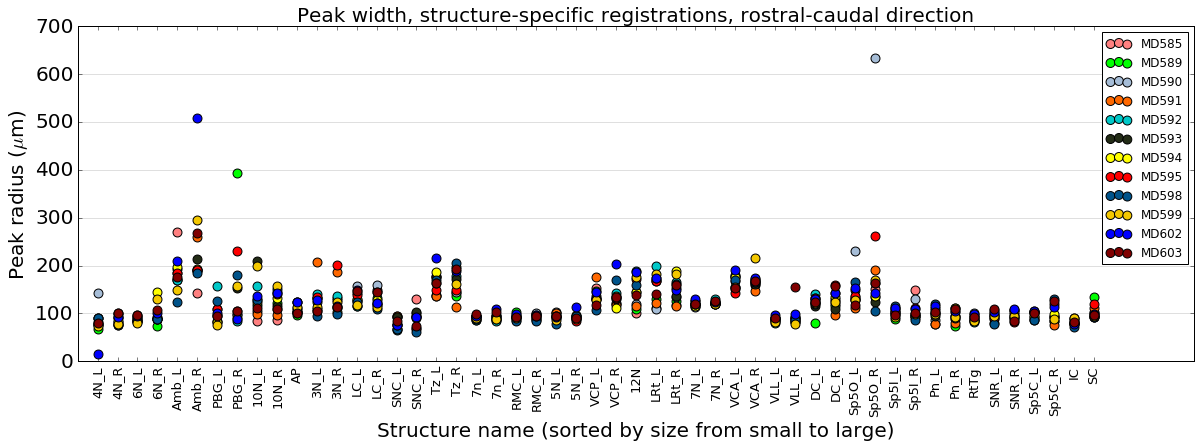

In [109]:
plt.figure(figsize=(20, 6));
# plt.figure(figsize=(20, 20));

for stack in all_nissl_stacks:
    plt.scatter(range(len(structures_sided_sorted_by_size)),
                np.array([peakradius_x_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size]),
               label=stack, c=np.array(stack_to_color[stack])/255., s=80)

plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
          rotation='90', fontsize=13)

plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.yticks(np.arange(0, 800, 100), fontsize=20);
plt.ylim([0,700]);
plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
plt.xlim([-1,len(all_known_structures_sided)+4]);
plt.title('Peak width, structure-specific registrations, rostral-caudal direction', fontsize=20);
plt.legend();

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

In [93]:
# Print all registrations whose x peak radius is larger than 250 um.

for struct in structures_sided_sorted_by_size:
    print struct, 
    print [stack for stack in all_nissl_stacks
           if peakradius_x_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius] > 250]

4N_L []
4N_R []
6N_L []
6N_R []
Amb_L ['MD585']
Amb_R ['MD591', 'MD599', 'MD602', 'MD603']
PBG_L []
PBG_R ['MD589']
10N_L []
10N_R []
AP []
3N_L []
3N_R []
LC_L []
LC_R []
SNC_L []
SNC_R []
Tz_L []
Tz_R []
7n_L []
7n_R []
RMC_L []
RMC_R []
5N_L []
5N_R []
VCP_L []
VCP_R []
12N []
LRt_L []
LRt_R []
7N_L []
7N_R []
VCA_L []
VCA_R []
VLL_L []
VLL_R []
DC_L []
DC_R []
Sp5O_L []
Sp5O_R ['MD590', 'MD595']
Sp5I_L []
Sp5I_R []
Pn_L []
Pn_R []
RtTg []
SNR_L []
SNR_R []
Sp5C_L []
Sp5C_R []
IC []
SC []


In [87]:
# plt.figure(figsize=(20, 5));

# for stack in all_nissl_stacks:
#     plt.scatter(range(len(structures_sided_sorted_by_size)),
#                 np.array([peakradius_x_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
#      for struct in structures_sided_sorted_by_size]),
#                label=stack)

# plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
#           rotation='60', fontsize=13)

# plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# # plt.yticks(np.arange(30, 100, 10), fontsize=20);
# plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
# plt.title('Local registrations, Peak radius (x direction)', fontsize=20);
# plt.legend();

# plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# # Hide these grid behind plot objects
# plt.gca().set_axisbelow(True)

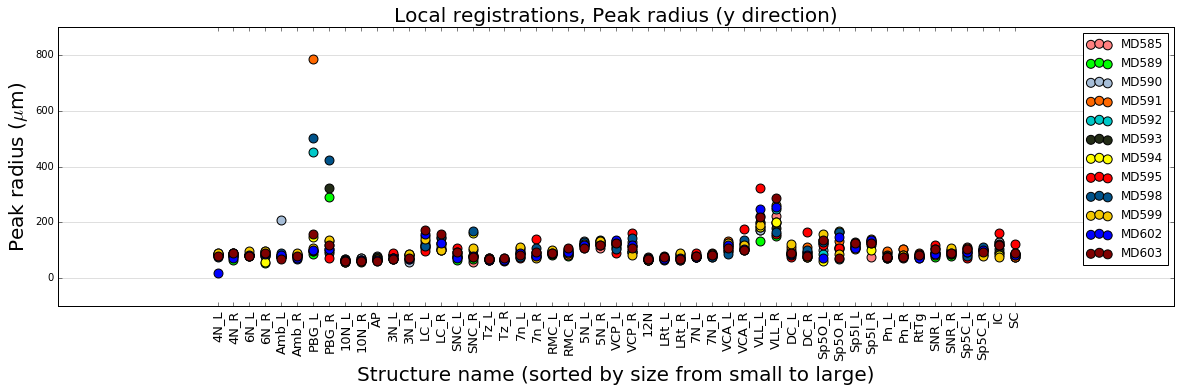

In [94]:
plt.figure(figsize=(20, 5));
# plt.figure(figsize=(20, 20));

for stack in all_nissl_stacks:
    plt.scatter(range(len(structures_sided_sorted_by_size)),
                np.array([peakradius_y_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size]),
               label=stack, c=np.array(stack_to_color[stack])/255., s=80)

plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
          rotation='90', fontsize=13)

plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# plt.yticks(np.arange(30, 100, 10), fontsize=20);
plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
plt.title('Local registrations, Peak radius (y direction)', fontsize=20);
plt.legend();

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

In [96]:
# Print all registrations whose y peak radius is larger than 250 um.

for struct in structures_sided_sorted_by_size:
    print struct, 
    print [stack for stack in all_nissl_stacks
           if peakradius_y_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius] > 250]

4N_L []
4N_R []
6N_L []
6N_R []
Amb_L []
Amb_R []
PBG_L ['MD591', 'MD592', 'MD598']
PBG_R ['MD589', 'MD593', 'MD598']
10N_L []
10N_R []
AP []
3N_L []
3N_R []
LC_L []
LC_R []
SNC_L []
SNC_R []
Tz_L []
Tz_R []
7n_L []
7n_R []
RMC_L []
RMC_R []
5N_L []
5N_R []
VCP_L []
VCP_R []
12N []
LRt_L []
LRt_R []
7N_L []
7N_R []
VCA_L []
VCA_R []
VLL_L ['MD595']
VLL_R ['MD599', 'MD602', 'MD603']
DC_L []
DC_R []
Sp5O_L []
Sp5O_R []
Sp5I_L []
Sp5I_R []
Pn_L []
Pn_R []
RtTg []
SNR_L []
SNR_R []
Sp5C_L []
Sp5C_R []
IC []
SC []


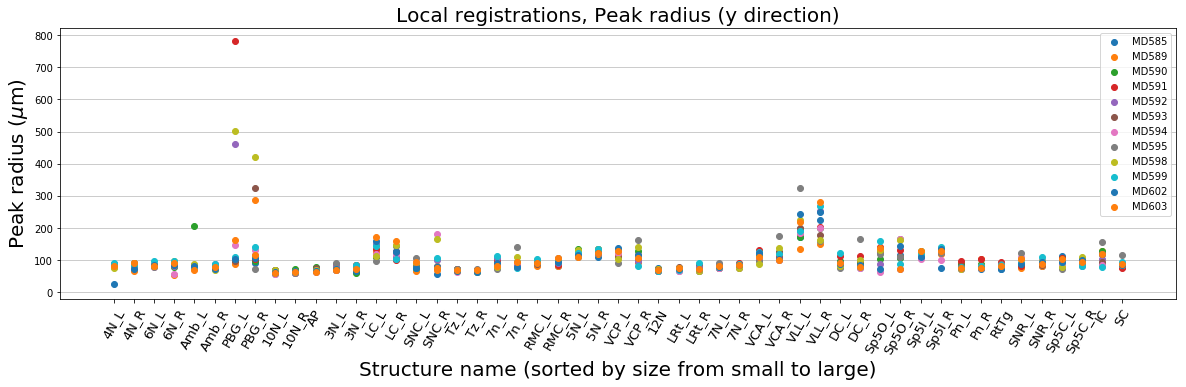

In [49]:
# plt.figure(figsize=(20, 5));

# for stack in all_nissl_stacks:
#     plt.scatter(range(len(structures_sided_sorted_by_size)),
#                 np.array([peakradius_y_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
#      for struct in structures_sided_sorted_by_size]),
#                label=stack)

# plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
#           rotation='60', fontsize=13)

# plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# # plt.yticks(np.arange(30, 100, 10), fontsize=20);
# plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
# plt.title('Local registrations, Peak radius (y direction)', fontsize=20);
# plt.legend();

# plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# # Hide these grid behind plot objects
# plt.gca().set_axisbelow(True)

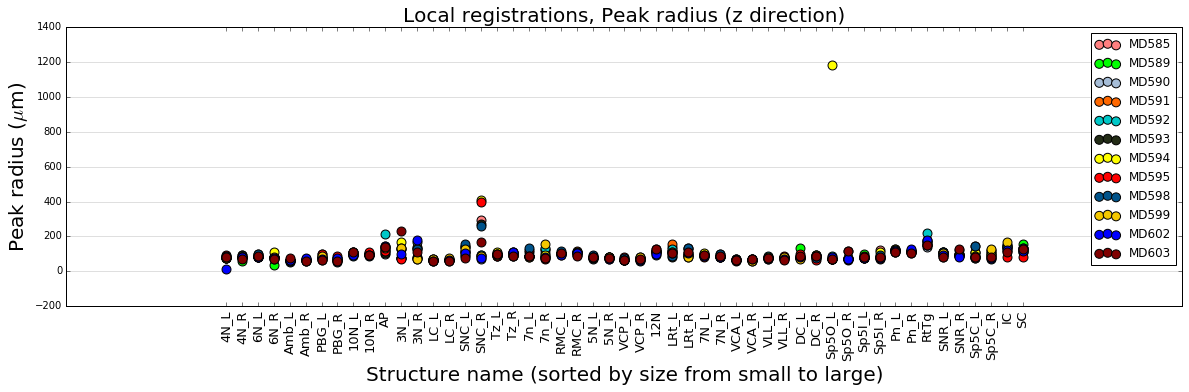

In [99]:
plt.figure(figsize=(20, 5));
# plt.figure(figsize=(20, 20));

for stack in all_nissl_stacks:
    plt.scatter(range(len(structures_sided_sorted_by_size)),
                np.array([peakradius_z_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size]),
               label=stack, c=np.array(stack_to_color[stack])/255., s=80)

plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
          rotation='90', fontsize=13)

plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# plt.yticks(np.arange(30, 100, 10), fontsize=20);
plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
plt.title('Local registrations, Peak radius (z direction)', fontsize=20);
plt.legend();

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

In [98]:
# Print all registrations whose z peak radius is larger than 250 um.

for struct in structures_sided_sorted_by_size:
    print struct, 
    print [stack for stack in all_nissl_stacks
           if peakradius_z_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius] > 250]

4N_L []
4N_R []
6N_L []
6N_R []
Amb_L []
Amb_R []
PBG_L []
PBG_R []
10N_L []
10N_R []
AP []
3N_L []
3N_R []
LC_L []
LC_R []
SNC_L []
SNC_R ['MD585', 'MD593', 'MD594', 'MD595', 'MD598']
Tz_L []
Tz_R []
7n_L []
7n_R []
RMC_L []
RMC_R []
5N_L []
5N_R []
VCP_L []
VCP_R []
12N []
LRt_L []
LRt_R []
7N_L []
7N_R []
VCA_L []
VCA_R []
VLL_L []
VLL_R []
DC_L []
DC_R []
Sp5O_L ['MD594']
Sp5O_R []
Sp5I_L []
Sp5I_R []
Pn_L []
Pn_R []
RtTg []
SNR_L []
SNR_R []
Sp5C_L []
Sp5C_R []
IC []
SC []


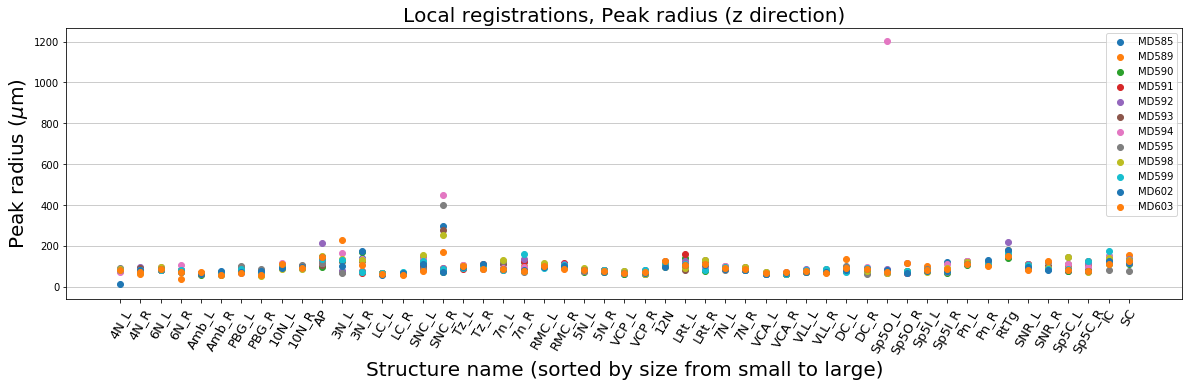

In [50]:
# plt.figure(figsize=(20, 5));

# for stack in all_nissl_stacks:
#     plt.scatter(range(len(structures_sided_sorted_by_size)),
#                 np.array([peakradius_z_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
#      for struct in structures_sided_sorted_by_size]),
#                label=stack)

# plt.xticks(range(len(structures_sided_sorted_by_size)), structures_sided_sorted_by_size,
#           rotation='60', fontsize=13)

# plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# # plt.yticks(np.arange(30, 100, 10), fontsize=20);
# plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
# plt.title('Local registrations, Peak radius (z direction)', fontsize=20);
# plt.legend();

# plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# # Hide these grid behind plot objects
# plt.gca().set_axisbelow(True)

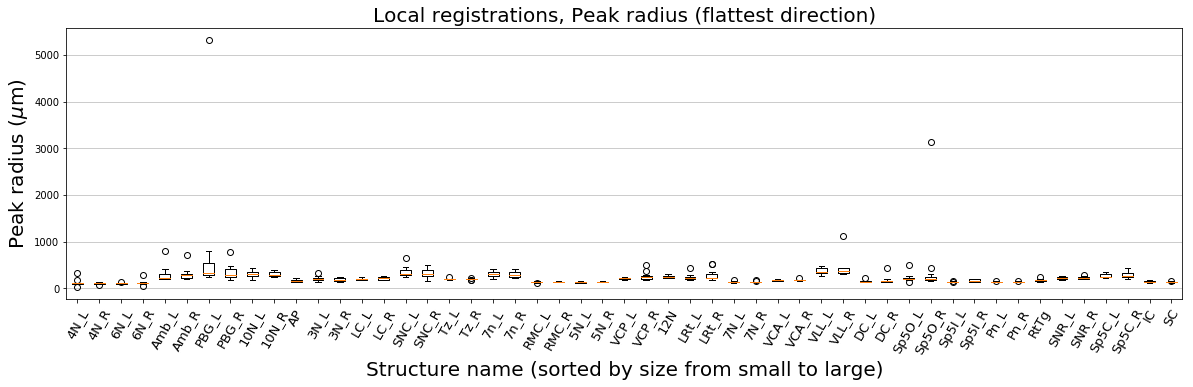

In [52]:
plt.figure(figsize=(20, 5));

D = np.array([[peakradius_max_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size]
    for stack in all_nissl_stacks])
plt.boxplot(D);
# plt.ylim([30, 90]);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# plt.yticks(np.arange(30, 100, 10), fontsize=20);
plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
plt.title('Local registrations, Peak radius (flattest direction)', fontsize=20);

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

In [33]:
# plt.figure(figsize=(20, 5));

# D = [peak_radius_min_oneCombination[struct].values() for struct in structures_sided_sorted_by_size]
# plt.boxplot(D);
# plt.ylim([40, 110]);
# plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
# plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# plt.yticks(np.arange(40, 110, 10), map(str, np.arange(40, 110, 10)), fontsize=20);
# plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
# plt.title('Local registrations, Peak radius (steepest direction)', fontsize=20);

# plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# # Hide these grid behind plot objects
# plt.gca().set_axisbelow(True)

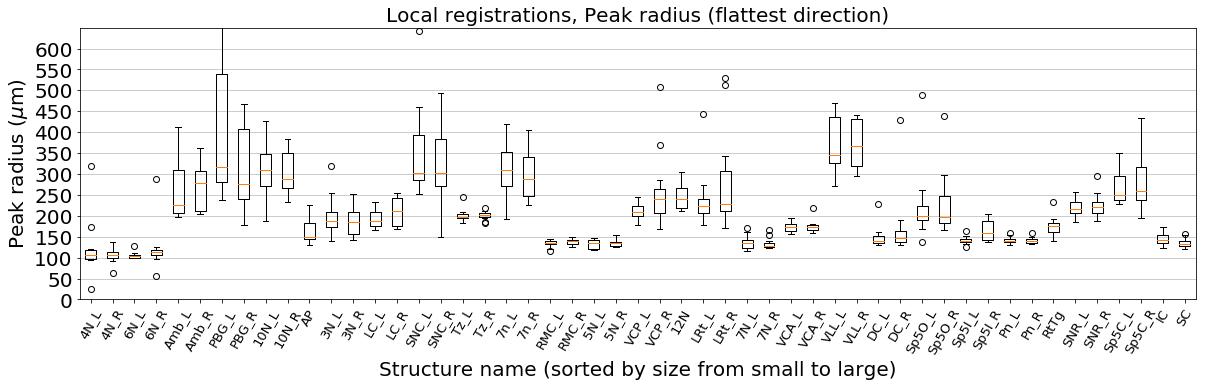

In [37]:
plt.figure(figsize=(20, 5));

D = np.array([[peakradius_max_um_allstacks_allstructures_allsteps_allpools[stack][struct][hessian_stepsize][pool_radius]
     for struct in structures_sided_sorted_by_size]
    for stack in all_nissl_stacks])
plt.boxplot(D);
plt.ylim([0, 650]);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.yticks(np.arange(0, 650, 50), fontsize=20);
plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
plt.title('Local registrations, Peak radius (flattest direction)', fontsize=20);

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

In [38]:
# plt.figure(figsize=(20, 5));

# D = [peak_radius_max_oneCombination[struct].values() for struct in structures_sided_sorted_by_size]
# plt.boxplot(D);
# plt.ylim([0, 650]);
# plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
# plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
# plt.yticks(np.arange(0, 650, 50), map(str, np.arange(0, 650, 50)), fontsize=20);
# plt.ylabel('Peak radius ($\mu$m)', fontsize=20);
# plt.title('Local registrations, Peak radius (flattest direction)', fontsize=20);

# plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# # Hide these grid behind plot objects
# plt.gca().set_axisbelow(True)

# Plot peak radius of different structures for all stacks, for rotation

In [121]:
# Choose one set of meta parameters.

pool_radius_rad = np.deg2rad(pool_radius_degrees_list[2])
hessian_stepsize_rad = np.deg2rad(rotation_stepsizes_degrees[2])

In [138]:
peak_radius_rad_around_x_oneCombination = defaultdict(dict)
peak_radius_rad_around_y_oneCombination = defaultdict(dict)
peak_radius_rad_around_z_oneCombination = defaultdict(dict)
for stack, x_per_stack in peak_radius_rad_all_stacks_all_structures.iteritems():
    for struct, x in x_per_stack.iteritems():
        prAroundZ, prAroundX, prAroundY = x[pool_radius_rad][hessian_stepsize_rad]
        peak_radius_rad_around_x_oneCombination[struct][stack] = prAroundX
        peak_radius_rad_around_y_oneCombination[struct][stack] = prAroundY
        peak_radius_rad_around_z_oneCombination[struct][stack] = prAroundZ

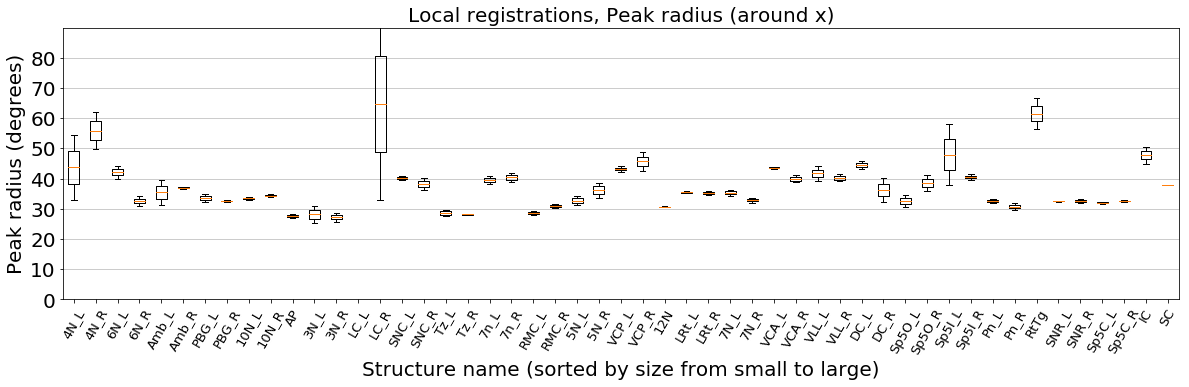

In [150]:
plt.figure(figsize=(20, 5));

D = [np.rad2deg(peak_radius_rad_around_x_oneCombination[struct].values()) 
     for struct in structures_sided_sorted_by_size]
plt.boxplot(D);
plt.ylim([0, 90]);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.yticks(np.arange(0, 90, 10), map(str, np.arange(0, 90, 10)), fontsize=20);
plt.ylabel('Peak radius (degrees)', fontsize=20);
plt.title('Local registrations, Peak radius (around x)', fontsize=20);

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

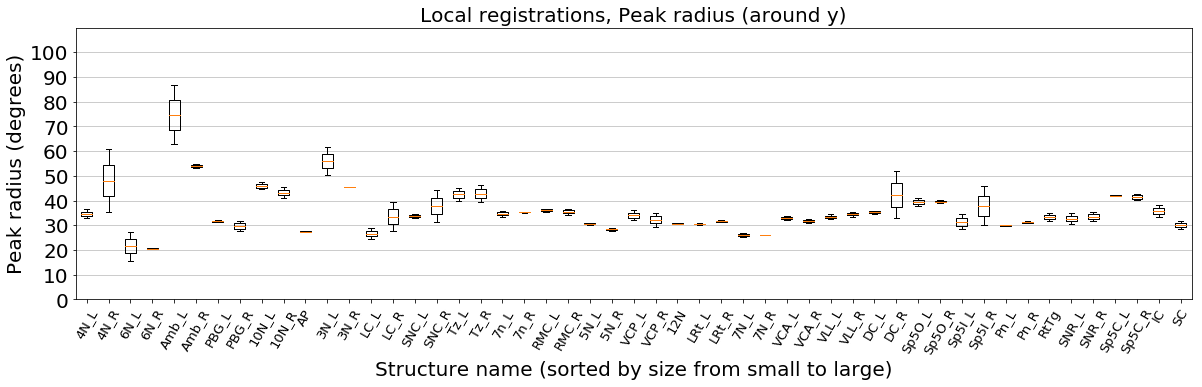

In [147]:
plt.figure(figsize=(20, 5));

D = [np.rad2deg(peak_radius_rad_around_y_oneCombination[struct].values()) 
     for struct in structures_sided_sorted_by_size]
plt.boxplot(D);
plt.ylim([0, 90]);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.yticks(np.arange(0, 90, 10), map(str, np.arange(0, 90, 10)), fontsize=20);
plt.ylabel('Peak radius (degrees)', fontsize=20);
plt.title('Local registrations, Peak radius (around y)', fontsize=20);

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

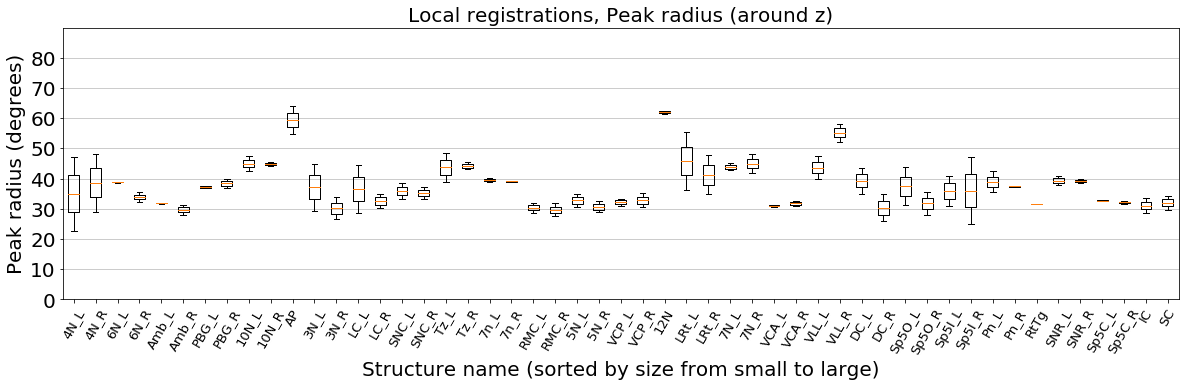

In [149]:
plt.figure(figsize=(20, 5));

D = [np.rad2deg(peak_radius_rad_around_z_oneCombination[struct].values()) 
     for struct in structures_sided_sorted_by_size]
plt.boxplot(D);
plt.ylim([0, 90]);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);
plt.yticks(np.arange(0, 90, 10), map(str, np.arange(0, 90, 10)), fontsize=20);
plt.ylabel('Peak radius (degrees)', fontsize=20);
plt.title('Local registrations, Peak radius (around z)', fontsize=20);

plt.gca().yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
plt.gca().set_axisbelow(True)

# Put both flattest / steepest directions in one figure

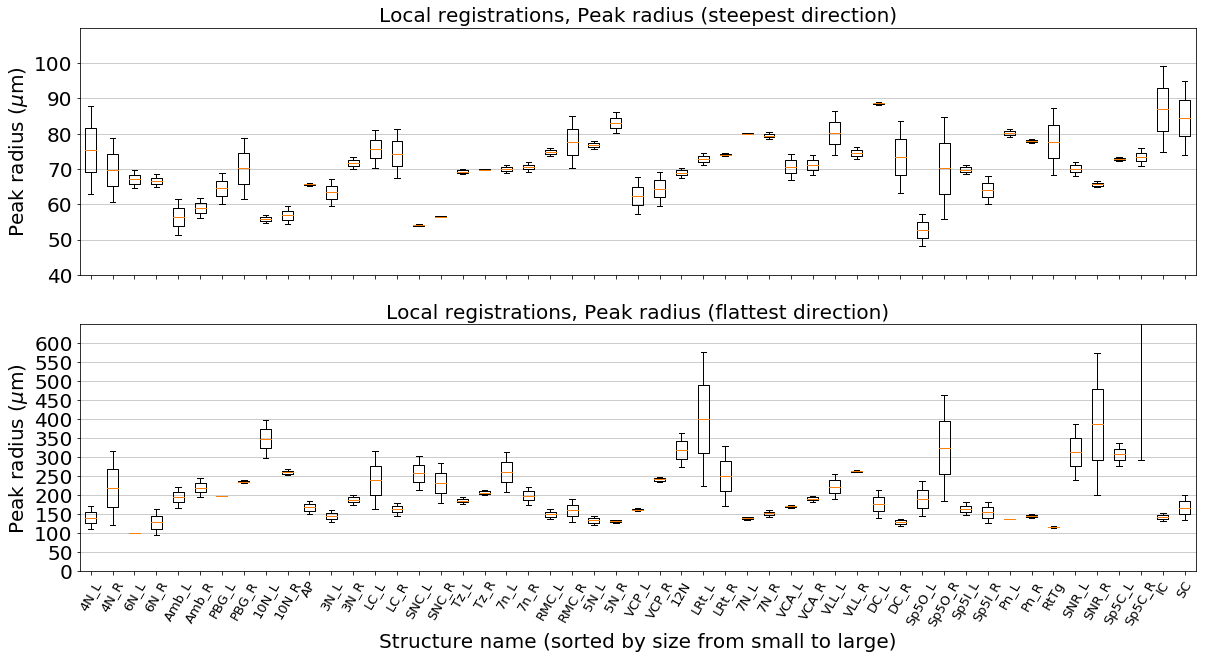

In [41]:
# Version 1: Two subplots

fig, axes = plt.subplots(2, 1, figsize=(20,10), sharex=True);

D = [peak_radius_min_oneCombination[struct].values() for struct in structures_sided_sorted_by_size]
axes[0].boxplot(D);
axes[0].set_ylim([40, 110]);

axes[0].set_yticks(np.arange(40, 110, 10));
axes[0].set_yticklabels(map(str, np.arange(40, 110, 10)), fontsize=20);
axes[0].set_ylabel('Peak radius ($\mu$m)', fontsize=20);
axes[0].set_title('Local registrations, Peak radius (steepest direction)', fontsize=20);

axes[0].yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
axes[0].set_axisbelow(True)

D = [peak_radius_max_oneCombination[struct].values() for struct in structures_sided_sorted_by_size]
axes[1].boxplot(D);
axes[1].set_ylim([0, 650]);
axes[1].set_yticks(np.arange(0, 650, 50));
axes[1].set_yticklabels(map(str, np.arange(0, 650, 50)), fontsize=20);
axes[1].set_ylabel('Peak radius ($\mu$m)', fontsize=20);
axes[1].set_title('Local registrations, Peak radius (flattest direction)', fontsize=20);

axes[1].yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
# Hide these grid behind plot objects
axes[1].set_axisbelow(True)

plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=20);

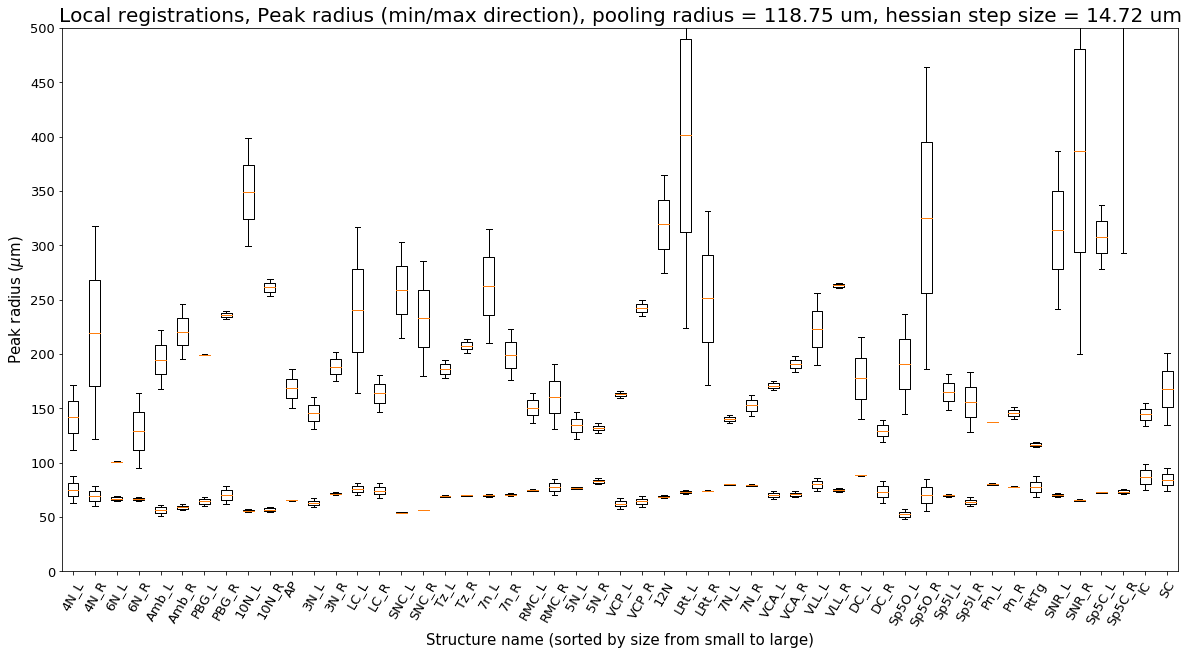

In [42]:
# Version 2: in one plot

plt.figure(figsize=(20, 10));

D = [peak_radius_min_oneCombination[struct].values() for struct in structures_sided_sorted_by_size]

# plt.figure(figsize=(20, 15));
# # plt.stem(range(1, len(boxplot_labels)+1), D);
plt.boxplot(D);
# # plt.ylim([26, 42]);
# plt.xticks(range(1, len(boxplot_labels)+1), boxplot_labels, rotation='60', fontsize=13);
# plt.xlabel('Structure name', fontsize=15);
# plt.ylabel('Peak radius (um)', fontsize=15);
# plt.title('Peak radius min, pooling radius = %.2f um, hessian step size = %.2f um' % (pool_radius, hessian_stepsize), fontsize=20);

###########################        

D = [peak_radius_max_oneCombination[struct].values() for struct in structures_sided_sorted_by_size]

# plt.figure(figsize=(20, 15));
# plt.stem(range(1, len(boxplot_labels)+1), D);
plt.boxplot(D);
plt.ylim([0, 500]);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=15);
plt.yticks(np.arange(0, 550, 50), map(str, np.arange(0, 550, 50)), fontsize=13);
plt.ylabel('Peak radius ($\mu$m)', fontsize=15);
plt.title('Local registrations, Peak radius (min/max direction), pooling radius = %.2f $\mu$m, hessian step size = %.2f $\mu$m' % (pool_radius, hessian_stepsize), fontsize=20);

In [33]:
[peakradius_max_um_allstacks_allstructures_allsteps[stack][struct]
     for struct in all_known_structures_sided 
    for stack in all_nissl_stacks]

[{25: 34.642134246777879,
  50: 69.331877855261737,
  100: 145.97899177092984,
  150: 232.38458651665829,
  200: 334.65719570351007,
  300: 598.60817465348043,
  400: 863.74927098814328},
 {25: 39.468945512399458,
  50: 78.390529999471269,
  100: 163.1980936970744,
  150: 248.61056777670396,
  200: 340.84814639216825,
  300: 549.16433050775515,
  400: 796.20503950083253},
 {25: 36.391119914755322,
  50: 76.393972238919815,
  100: 158.7450839154846,
  150: 242.14536529378171,
  200: 332.99209946994102,
  300: 543.51649864119747,
  400: 771.36471864881969},
 {25: 40.131907294670235,
  50: 78.739802856132968,
  100: 161.10323061172494,
  150: 248.5142691675469,
  200: 337.94499823812271,
  300: 544.09894229604276,
  400: 812.53459116742454},
 {25: 40.081720560149002,
  50: 79.98902133138148,
  100: 161.88062784612811,
  150: 247.10762502971144,
  200: 346.28351384417999,
  300: 545.35013748879794,
  400: 794.44940580635409},
 {25: 33.259425845731023,
  50: 64.667359848220727,
  100: 137.6

In [ ]:
# Version 2: in one plot

plt.figure(figsize=(20, 10));

D = [peakradius_max_um_allstacks_allstructures_allsteps[stack][struct].values() 
     for struct in structures_sided_sorted_by_size 
    for stack in all_nissl_stacks] 

# plt.figure(figsize=(20, 15));
# # plt.stem(range(1, len(boxplot_labels)+1), D);
plt.boxplot(D);
# # plt.ylim([26, 42]);
# plt.xticks(range(1, len(boxplot_labels)+1), boxplot_labels, rotation='60', fontsize=13);
# plt.xlabel('Structure name', fontsize=15);
# plt.ylabel('Peak radius (um)', fontsize=15);
# plt.title('Peak radius min, pooling radius = %.2f um, hessian step size = %.2f um' % (pool_radius, hessian_stepsize), fontsize=20);

###########################        

D = [peak_radius_max_oneCombination[struct].values() for struct in structures_sided_sorted_by_size]

# plt.figure(figsize=(20, 15));
# plt.stem(range(1, len(boxplot_labels)+1), D);
plt.boxplot(D);
plt.ylim([0, 500]);
plt.xticks(range(1, len(structures_sided_sorted_by_size)+1), structures_sided_sorted_by_size, rotation='60', fontsize=13);
plt.xlabel('Structure name (sorted by size from small to large)', fontsize=15);
plt.yticks(np.arange(0, 550, 50), map(str, np.arange(0, 550, 50)), fontsize=13);
plt.ylabel('Peak radius ($\mu$m)', fontsize=15);
plt.title('Local registrations, Peak radius (min/max direction), pooling radius = %.2f $\mu$m, hessian step size = %.2f $\mu$m' % (pool_radius, hessian_stepsize), fontsize=20);

In [29]:
def plot_peak_radius(peak_radius):
    for poolradius_um, v in peak_radius.iteritems():
        xs, ys_max_min = zip(*sorted(v.items()))
        ys_max, ys_min = zip(*ys_max_min)
        c = np.array(random_colors(1)[0])/255.
        plt.plot(xs, ys_max, linestyle='-', color=c, label='pool=%dum, max' % poolradius_um);
        plt.plot(xs, ys_min, linestyle='--', color=c, label='pool=%dum, min' % poolradius_um);
    plt.legend(loc='lower right');
    plt.xlabel('Hessian step size (um)');
    plt.ylabel('Peak radius (um)');
    plt.show();